#### <font color='teal'>Dervla Scully 18329511
#### <font color='teal'>Chosen Countries: Ireland, the United States, New Zealand

In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib
import matplotlib.pylab as plt
from matplotlib.dates import DateFormatter
%matplotlib inline 
import numpy as np
import seaborn as seab
import numpy as np
import scipy
import itertools

<h3 align="center"> <font color='cadetblue'> COMP30760 Data Science in Python</font> </h3>
<h3 align="center"> <font color='teal'> Assignment 2 </font> </h3>

In 2020 __Google__ released a set of __Community Mobility Reports__ (GCMR). These reports are based on the company’s location-tracking capabilities and measure changes in mobility with respect to a baseline for __Retail & Recreation, Grocery & Pharmacy, Workplaces, Transit Stations, Residential and Parks__. The dataset provides data on visitor numbers (or duration for the residential category) to for these categories of location each day with respect to the baseline. This provide insight into how peoples’ movements have changed throughout the Covid-19 pandemic. 

For this project I have chosen 3 countries, and will start by analysing each of the categories, and comparing various different categories, for each of the countries individually. I will then analyse and compare each of the categories for the 3 different countries. I will look at the distributions, trends, means, standard deviations, maxima and minima.

The 3 countries which I have chosen for my analysis are __Ireland, New Zealand and the United States__. 

I chose Ireland as I lived through the pandemic in Ireland and know a lot about the lockdown measures we implemented, and so thought that it would be interesting to see how these measures affcted people's mobility for the variois categories. I chose New Zealand as New Zealand and its prime minister Jacinda Ardern have been praised for their remarkable response to the Covid-19 pandemic. Finally, I chose the United States as there has been a lot of cover in the media over the past few months about the Unites States' and Trump's response to the pandemic, with huge amount of daily cases and death rates, so i thoight that it would be interesting to see how the mobility of the people of the US has changed during the pandemic.

For Ireland and New Zealand it is easy to compare trends with the exact lockdown measures in place at the time, as for the most part the whole country was in the same level of lockdown (other than the Laois, Offaly, Kildare, Dublin lockdowns in Ireland and the Auckland lockdown in New Zealand). For the US this is not so easy as the lockdown measures implemented by each state can differ.

The way in which I have decided to structure my notebook is by displaying all of my detailed analysis and graphs together, as opposed to displaying each of my graphs with brief analysis and then having all of my detailed analyses in a summary for each country. 

For Task 1 I will start by analysing each of the categories and comparing some of the categories for each of the countries individually:

# <font color='teal'>Task 1. Within Country Analysis</font>

__Task:__ 
- For each of the three selected countries separately, construct a set of time series that represent the mobility patterns for the different location categories for the country.
- Characterise and visualise each of these time series. You may choose to apply resampling and/or smoothing in order to provide a clearer picture of the trends in the series.
- Compare and contrast how the series for the different location categories have changed over time for the country. To what extent are these series correlated with one another?
- Suggest explanations for any differences that you have observed between the time series for the location categories.

## <font color='cadetblue'>Function Definitions</font>

### Functions for data preperation & cleaning

For this task I will prepare 3 seperate dataframes for the three countries that I have chosen. To clean and prepare the dataframes I will define a set of functions, and pass each of my dataframes in seperately as arguments.

In [2]:
pd.options.display.max_columns = None  # display all columns when printing
pd.options.display.min_rows = 6 # display all rows when printing

#### Missing Values
I will check for missing data

In [3]:
def printNullSum(df):
    print("Number of missing Values per column:\n")
    print(df.isnull().sum(), "\n")

#### Missing Rows
I will check if there are any rows missing. There should be a row for each date. To check if there are any rows missing I will calculate the number of days between the start and end dates, and compare this to the number of rows.

In [4]:
def printMissingRowSum(df):
    startDate = df.index[0]
    endDate = df.index[df.shape[0]-1]
    delta = endDate - startDate
    missing = delta.days-(df.shape[0]-1)
    print("Number of missing rows: ", missing, "\n")


#### Combine Functions

In [5]:
def prepareData(csv, country):
    print("\n\n", country, " Mobility Dataset: \n")
    
    # read CSV to pandas dataframe
    # parse dates so that they are of type datetime, and set date as index
    df = pd.read_csv(csv, parse_dates=True, index_col = "date") 
    
    print("Date Range: ", df.index[0].date(), " - ", df.index[df.shape[0]-1].date(), "\n")
    printNullSum(df)
    print("Number of rows: ", df.shape[0], "\n")
    printMissingRowSum(df)
    print("Cleaned Data Frame: ")
    display(df)
    
    return df # retrun the pandas dataframe

### Variables & Functions for Country & Column String Representation

__Variables for column names__

Variables to hold the names of each column for easier use. 
This way, one can call 

    df[retail] 
    
as opposed to 

    df["retail_and_recreation_percent_change_from_baseline"]
    
which is significantly easier and faster

In [6]:
retail = "retail_and_recreation_percent_change_from_baseline"
grocery = "grocery_and_pharmacy_percent_change_from_baseline"
parks = "parks_percent_change_from_baseline"
transit = "transit_stations_percent_change_from_baseline"
workplace = "workplaces_percent_change_from_baseline"
residential = "residential_percent_change_from_baseline"

__Method for String Representation of a Country__

This method returns a string representing the country of a given dataframe. Using this saves having to pass a string value into functions for displaying the title on graphs, etc, which is again easier and quicker.

In [7]:
def countryString(df):
    if(df.equals(ireland)):return "Ireland"
    if(df.equals(US)):return "United States"
    if(df.equals(NZ)):return "New Zealand"
    return "Error"

__Method for String Representation of an Attribute__

This method returns a string representing the attribute name of a given attribute. Using this saves having to pass a string value into functions for displaying the axes labels on graphs, etc

In [8]:
def attributeString(attribute):
    if(attribute==retail): return "Retail and Recreation % Change from Baseline"
    if(attribute==grocery): return "Grocery and Pharmacy % Change from Baseline"
    if(attribute==parks):return "Parks % Change from Baseline"
    if(attribute==transit): return "Transit Stations  % Change from Baseline"
    if(attribute==workplace): return "Workplaces  % Change from Baseline"
    if(attribute==residential): return  "Residential % Change from Baseline"
    return "Error"

### Functions for Graphing

#### Add Baseline, Grid Lines

For many of my graphs I want to add a horizontal line for the baseline and add grid lines. To avoid having the repeat this code for each of my graphing functions I can call this function each time.

In [9]:
# baseline = True if I want to add a label to my horizontal baseline line
# for smaller graphs I sometimes don't want the label

def baselineGridLines(baseline):
    
    
    # Horizontal line at 0% for baseline
    plt.hlines(
            0,
            xmin=datetime(2020, 3, 7),
            xmax= datetime(2020, 10, 31),
            colors='k', 
            linestyles='solid')
    
    if(baseline):
        plt.text(
            datetime(2020, 10, 22),0, 
            "Baseline\n", 
            size=7, 
            color="black", 
            fontweight="bold", 
            label='Baseline')


        
    # Add grid lines
    plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

#### 7 Day Rolling Mean for 1 Series

Lineplot of the 7 day rolling mean for a given category and country.


e.g. Line Plot of 7 Day Rolling Mean for Retail & Recreation for Ireland

In [10]:
# country = data frame of country
# attribute = string containing attribute name
# min = true/false depending on if min % change from baseline is to be displayed
# max = true/false depending on if max % change from baseline is to be displayed

def linePlot7DayRolling(country, attribute, min, max):
    

    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(14, 8.5))
    ax.set_facecolor('ghostwhite')
    
    plot = country.rolling(7).mean()
    
    # plot 7 day rolling mean
    ax.plot(
        plot[attribute], 
        color="seagreen")
    
    ax.fill_between(
        plot.index, 
        plot[attribute], 
        0, 
        facecolor='green', 
        alpha=0.1, 
        interpolate=True)
    
    # Title and labels for axes
    
    # attributeString returns string of attribute name
    ylabel = attributeString(attribute) + "\n"
    
    # countryString returns a string of country name 
    title = "\n\n"+countryString(country)+": 7 Day Rolling Mean of " + ylabel
    
    # Set title and labels
    plt.xlabel(
        xlabel="\nDate (2020)", 
        weight='bold', 
        size = 10)
    
    plt.ylabel(
        ylabel=ylabel, 
        weight='bold', 
        size = 10)
    
    plt.title(
        title, 
        weight='bold', 
        size = 14)
    
    # Vertical line & label for the maxiumum % below the baseline for 7 day rolling mean
    if(min):

        minIndex = country.rolling(7).mean().idxmin()[attribute]
        minValue = country.rolling(7).mean().loc[minIndex][attribute].round(2)
        label = "  Minimum: " + str(minValue) + " %" + ", " + str(minIndex.day) + "-" + str(minIndex.month_name())
        
        plt.axvline(
            minIndex, 
            c="dimgrey", 
            linestyle = "--")
        
        plt.text(
            minIndex,
            minValue-1,
            label,
            fontweight='bold', 
            fontsize=8)
        
    # Vertical line & label for the maxiumum % above the baseline for 7 day rolling mean
    if(max):

        maxIndex = country.rolling(7).mean().idxmax()[attribute]
        maxValue = country.rolling(7).mean().loc[maxIndex][attribute].round(2)
        label = "  Maximum: " + str(maxValue) + " %" + ", " + str(maxIndex.day) + "-" + str(maxIndex.month_name())
        
        plt.axvline(
            maxIndex, 
            c="dimgrey", 
            linestyle = "--")
        
        plt.text(
            maxIndex,
            maxValue+0.4,
            label,
            fontweight='bold', 
            fontsize=8)
        
    date_form = DateFormatter("%b")
    ax.xaxis.set_major_formatter(date_form)

        
    baselineGridLines(True)

    plt.show()
    

#### Describe

Usually when I want the summary stats for a series I am only interested in mean, standard deviation, max and min. This function prints these as well as the date max and min occured for a given category and country.

In [11]:
def describe(country, attribute):
    print("Summary Statistics: ")
    print(countryString(country), "; ", attributeString(attribute), "\n")
    print(country[attribute].describe()[["mean", "std", "min", "max"]])
    print("Date of Min: " , country[[attribute]].idxmin()[attribute].date())
    print("Date of Max: " , country[[attribute]].idxmax()[attribute].date(), "\n")    

#### Compare Daily Values and 7 Day Rolling Mean Values

This function prints a lineplot showing the daily and 7 day rolling mean lines for a given series. Often if the max or min value is an outlier it will be greatly decreased by the 7 day rolling mean. This will be visible in this graph.

In [12]:
def compareDailyAndRolling(country, attribute):
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.set_facecolor('ghostwhite')
    label = attributeString(attribute).split('%')[0]
    colors = ["lightseagreen", "cornflowerblue"]
    
    # lineplot of daily values
    ax.plot(
            country[attribute], 
            color=colors[1],
            label = label)
    
    # line plot of 7 day rolling mean
    ax.plot(
            country.rolling(7).mean()[attribute], 
            color=colors[0],
            label = str(label+" 7 day rolling mean"))

    # Title and labels for axes
    ylabel = "% Change from Baseline\n"
    title = "\n\n Comparison of 7 Day Rolling Mean % Change from Basline for " + label + ", " + countryString(country)
    
    plt.xlabel(
    xlabel="\nDate (2020)", 
    weight='bold', 
    size = 7)
    
    plt.ylabel(
        ylabel=ylabel, 
        weight='bold', 
        size = 7)
    
    plt.title(
        title, 
        weight='bold', 
        size = 9)
    
    # legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(labels)
    
    # format date to display month
    date_form = DateFormatter("%b")
    ax.xaxis.set_major_formatter(date_form)
    
    baselineGridLines(False)
    
    plt.show()

#### Line Plot of Category

This is a line plot of the daily values (ie not rolling mean) for a given category.

In [13]:
def plotCategory(country, attribute):
    

    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_facecolor('ghostwhite')

    ax.plot(country[attribute], color="seagreen")
    
    ax.fill_between(
        country.index, 
        country[attribute], 
        0, 
        facecolor='green', 
        alpha=0.1, 
        interpolate=True)
    
    # Title and labels for axes
    ylabel = attributeString(attribute) + "\n"
    title = "\n\n"+countryString(country)+": " + ylabel
    plt.xlabel(xlabel="\nDate (2020)", weight='bold', size = 8)
    plt.ylabel(ylabel=ylabel, weight='bold', size = 8)
    plt.title(title, weight='bold', size = 9)
        
    baselineGridLines(False)

    plt.show()
    

#### Line Plot of Multiple Categories using Rolling Mean

This function is used within the next function. It takes in the number of days for the rolling mean, a country, a list of categories and an axis as arguments, and plots a line plot of the rolling mean for the given categories on the given axis

In [14]:
# country = data frame of country
# attribute = list of attribute names
# daysRolling = number of days in rolling mean, e.g. 7 Day Rolling Mean
# number = number for labelling axis, if number <= 0 then no label
# ax = axis 

# if axis is displayed then I want a smaller graphs with smaller font, as this will more than 
# likely be for plotting multiple
# if no axis is displayed then I want a larger plot and larger font

def linePlotMultipleRolling(daysRolling, country, attributes, number,  ax=None):
    
    # line colours
    colors = ["lightseagreen", "cornflowerblue"]
    Font = [7, 8]
    axis = True
    
    # no axis provided
    if ax is None:
        axis = False
        Font = [10, 12]
        fig, ax = plt.subplots(figsize=(10, 6)) 
        
    ax.set_facecolor('ghostwhite')
    
    # plot for each attribute
    i=0
    for attribute in attributes:
        # plot 7 day rolling mean
        ax.plot(
            country.rolling(daysRolling).mean()[attribute], 
            color=colors[i],
            label = attributeString(attribute).split("%")[0])
        # fill between line and baseline
        ax.fill_between(country.rolling(daysRolling).mean().index, 
                        country.rolling(daysRolling).mean()[attribute],
                        0,
                        facecolor=colors[i], 
                        alpha=0.1, 
                        interpolate=True)
        
        i+=1

    
    # Title and labels for axes
    ylabel = "% Change from Baseline"
    title = attributeString(attributes[0]).split("%")[0] + "& "+ attributeString(attributes[1]).split("%")[0]
    if(not axis): title = countryString(country) + ": " + title
    if(number>0): title = "\n" + str(number) + ". " + title
    else: title = "\n" + title
        
    ax.set_xlabel("\nDate (2020)", weight='bold', size = Font[0])
    ax.set_ylabel(ylabel, size = Font[0])
    ax.set_title(title, weight='bold', size = Font[1])
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels, fontsize = Font[1])
    
    # Format Date to display month name
    date_form = DateFormatter("%b")
    ax.xaxis.set_major_formatter(date_form)
    
    # Horizontal line at 0% for baseline
    ax.axhline(y=0, xmin=0, xmax= 1,color='k', linestyle='solid')
    
    # Add grid lines
    ax.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
    
    if axis:
        return(ax)
    
    plt.show()
    

#### Line Plot Matrix

This function plots a matrix of line plots for each pair of categories for a given country. This will be used when comparing categories as an overview of the plots for each pair of categories to get a generla idea of their similarities / difference. This will then give me a good indication of which categories I should compare in more detail.

In [15]:
def linePlotMatrix(country, daysRolling):
    categories = [retail,grocery,parks,transit,workplace,residential]
    # a list of all possible pairs (order doesnt matter) for the numbers 0 to 5
    combinations = list(itertools.combinations(range(0, 6), 2)) 

    # 5 rows and 3 columns
    fig, axes = plt.subplots(5, 3, figsize=(20, 27))
    
    # figure title
    title = "\n"+ countryString(country) + ' Line Plot Matrix for Each Pair of Categories\n'
    if(daysRolling>1): title += str(daysRolling) + " Day Rolling Mean"
    fig.suptitle(title, fontsize=16, fontweight="bold")
    
    # flatten axes
    ax = axes.flatten()

    i=0             # iterate through axes and combinations
    for a in ax:
        
        # plot a pair combination on each axis
        linePlotMultipleRolling(daysRolling, country,[categories[combinations[i][0]], categories[combinations[i][1]]], i+1,  ax=a)
        i+=1

#### Histogram of 2 Categories

The functions below construct histograms for 2 categories for a given country on the one graph. The histogram can display the bars overlapping for the two categories, the bars side by side, or the bars overlapping with a distribution curve for each category fitted. The type(s) of histogram to be displayed is specified as an argument to the functions.

In [16]:
# country = dataframe for country
# attributes = list of categories, eg [retail, transit]
# list of arguments for plt.xticks()
# type = int for type of histogram
#   1 = histogram of two categories with the bars overlapping
#   2 = histogram of two categories with the bars overlapping fitted with a distribution curve
#   other = histogram of two categories with the bars side by side

def histogram(country, attributes, ticks, type):

    # labels and title
    
        # attribute string for a given attribute, e.g. transit, returns Transit Stations % Change from Baseline
        # I just want the Transit Stations part for the label so I split by "%"
    label = [attributeString(attributes[0]).split("%")[0], attributeString(attributes[1]).split("%")[0]]
    title = title = "\n\nHistogram of " + label[0] + "and " + attributeString(attributes[1]) + "\n"
    colors = ["lightseagreen", "cornflowerblue"]
    
    # set figure
    plt.figure(figsize=(10, 5))
    
    # plot
    if type==1: # overlap bars
        plt.hist(country[attributes[0]], 
                 bins=32, 
                 alpha=0.5, 
                 label=label[0], 
                 color=colors[0])
        
        plt.hist(country[attributes[1]], 
                 bins=32, 
                 alpha=0.5, 
                 label=label[1], 
                 color=colors[1])
        
        
    elif type==2: # overlap bars & distribution line
        for i in range(0, 2):
            
            # create histogram
            _, bins, _ = plt.hist(country[attributes[i]], 
                                  bins=32, 
                                  alpha=0.5, 
                                  label=label[i], 
                                  color=colors[i], 
                                  density=2)
            # mean and standard deviation
            mu, sigma = scipy.stats.norm.fit(country[attributes[i]])
            best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)   # scipy.stats.norm.pdf(x, mu, sigma) with x as 
                                                                    # bins, mu as the mean, and sigma as the 
                                                                    # standard deviation to get a line of best 
                                                                    # fit for the data
            plt.plot(bins, 
                     best_fit_line, 
                     label=str(label[i]+"Fit Distribution"), 
                     color=colors[i]) # display the line and histogram
        title += "With Distribution Line\n"
            
    
    else: # bars side by side
        plt.hist([country[attributes[0]], 
                  country[attributes[1]]], 
                 bins=32, 
                 label=label, # list of labels
                 alpha=0.5, 
                 color=colors) # list of colours
    
    # Grid lines
    plt.grid(b=True, 
             which='major', 
             color='#666666', 
             linestyle='-',
             alpha=0.1)
    
    plt.minorticks_on()
    plt.grid(b=True, 
             which='minor', 
             color='#999999', 
             linestyle='-', 
             alpha=0.07)
    
    # ticks
    plt.xticks(np.arange(ticks[0], ticks[1], ticks[2])) # ticks is a list passed in as argument
    
    # add labels and title
    plt.ylabel("Count",size=9, fontweight="bold")
    plt.xlabel("% Change from Baseline",size=9, fontweight="bold")
    plt.title(title,size=12, fontweight="bold")
    
    # add legend
    plt.legend(loc='upper right')
    
    # show
    plt.show()
    
# displayHistogram takes in all of the same arguments as histogram function, except with a list of
# integers 'types' as opposed to the single integer 'type' for histogram function
# it calls the  histogram function for each specified type. 
# This way multiple histograms can be displayed in one function call

def displayHistograms(country, attributes, ticks, types):
    for type in types:
        histogram(country, attributes, ticks, type)

#### Scatter Plot

Scatter plot of 2 categories from a given country, fit with a regression line, which also displays correlation coefficient 

In [17]:
def scatter(country, attributes):
    # labels & title
    attribute0 = attributeString(attributes[0]).split("%")[0] # label 1
    attribute1 = attributeString(attributes[1]).split("%")[0] # label 2
    correlation = country[attributes[0]].corr(country[attributes[1]]) # callculate correlation 
    title = "Scatter plot of " + attribute0 + "and " + attributeString(attributes[1]) + "\nCorrelation: " + str(correlation.round(3)) + "\n"
    
    fig = seab.lmplot(
                    x=attributes[0],
                    y=attributes[1],
                    data=country,
                    fit_reg=True,  # fit regression line
                    scatter_kws={"s": 20, "color": "c"}, # size and colour of markers
                    height=5, # size 
                    line_kws={'color': "c"} # regression line colour
                   )
    # set labels & title
    plt.xlabel(attribute1, fontweight = "bold")
    plt.ylabel(attribute0, fontweight = "bold")
    plt.title(title, fontweight = "bold")
    # Add grid lines
    plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
    
    plt.show(fig)

# <font color='teal'>Task 1: Ireland</font>

The first country that I will look at is Ireland. I will collect and prepare my data, and then analyse each of the catgories for Ireland and compare some of these categories.

### <font color='cadetblue'>Ireland: Data Collection & Preperation</font>

I will use the functions which I constructed above to prepare and clean my dataset for Ireland. I will call the prepareData function for the ireland csv file.

In [18]:
ireland = prepareData("ireland.csv", "Ireland")



 Ireland  Mobility Dataset: 

Date Range:  2020-03-01  -  2020-10-31 

Number of missing Values per column:

id                                                    0
country                                               0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64 

Number of rows:  245 

Number of missing rows:  0 

Cleaned Data Frame: 


id  country  \
date                           
2020-03-01  1265158  Ireland   
2020-03-02  1265159  Ireland   
2020-03-03  1265160  Ireland   
...             ...      ...   
2020-10-29  1265400  Ireland   
2020-10-30  1265401  Ireland   
2020-10-31  1265402  Ireland   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-03-01                                                3.0    
2020-03-02                                                4.0    
2020-03-03                                                8.0    
...                                                       ...    
2020-10-29                                              -51.0    
2020-10-30                                              -48.0    
2020-10-31                                              -58.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-03-01                                                3.0   
2020-03-02                                                4.0   
2020-03-03                                                5.0   
...                                                       ...   
2020-10-29                                               -6.0   
2020-10-30                                                1.0   
2020-10-31                                               -2.0   

            parks_percent_change_from_baseline  \
date                                             
2020-03-01                                -5.0   
2020-03-02                                12.0   
2020-03-03                                29.0   
...                                        ...   
2020-10-29                               -25.0   
2020-10-30                                24.0   
2020-10-31                               -17.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-03-01                                            2.0   
2020-03-02                                            1.0   
2020-03-03                                            2.0   
...                                                   ...   
2020-10-29                                          -61.0   
2020-10-30                                          -56.0   
2020-10-31                                          -58.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-03-01                                      2.0   
2020-03-02                                      1.0   
2020-03-03                                      3.0   
...                                             ...   
2020-10-29                                    -50.0   
2020-10-30                                    -48.0   
2020-10-31                                    -27.0   

            residential_percent_change_from_baseline  
date                                                  
2020-03-01                                       0.0  
2020-03-02                                       0.0  
2020-03-03                                      -1.0  
...                                              ...  
2020-10-29                                      21.0  
2020-10-30                                      19.0  
2020-10-31                                      13.0  

[245 rows x 8 columns]

## <font color='teal'>Ireland: Visualisation & Analysis</font>

Now that my data is prepared, cleaned and ready for use I will start by plotting a line plot for each of the columns for Ireland. This will give a good visualisation of the trends, showing the peaks, troughs and maximum and minimum values reached.

### <font color='teal'>Ireland: Retail & Recreation</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Retail & Recreation % Change from Baseline</font>__

Summary Statistics: 
Ireland ;  Retail and Recreation % Change from Baseline 

mean   -40.502041
std     24.049918
min    -90.000000
max      8.000000
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-12
Date of Max:  2020-03-03 



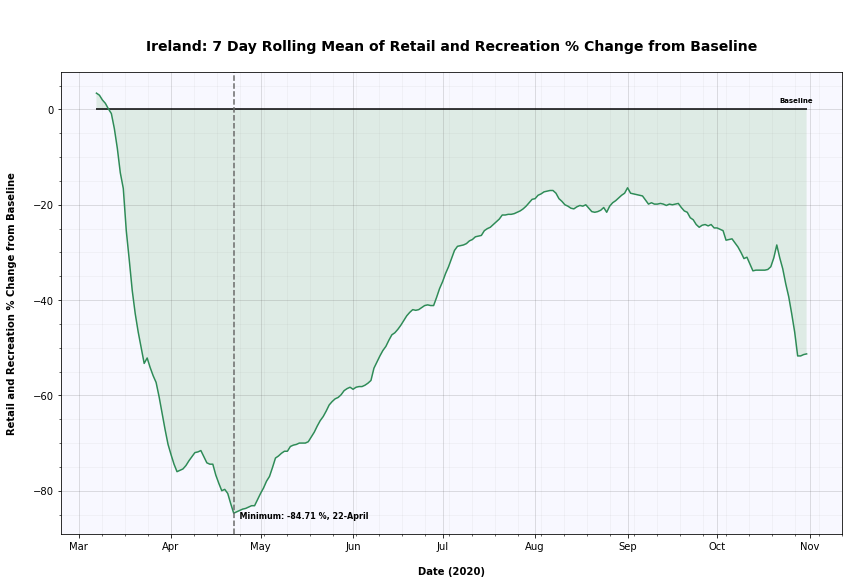

In [19]:
describe(ireland,retail)
linePlot7DayRolling(ireland, retail, True, False)

#### Ireland Retail & Recreation: 
#### Analysis

The line plot above shows the 7 day rolling mean for retail and recreation percentage change from the baseline for Ireland. From this we can see the trends throughout the year 2020. The baseline is from January 2020. The date range of the data is from March to November 2020. We can see from the summary statistics above that at the start of March the retail and recreation percentage is 8% above the baseline.

From the beginning of March a drastic drop in the percentage can be seen, which continues to fall steeply until the start of April where it reaches about -75%. This is followed by a small peak at the begining of april April, and then a drop to a global minimum of -84.71% on April 22nd. The begining of this drop at the start of March is in line with the first Covid-19 lockdown in Ireland, in which retial shops were ordered to close, so this drop is expected. 

From April 22nd a gradual increase can be seen until August, where it reaches about -20%. This increase is expected as the lockdown measures were slowly lifted and more retail shops and recreational facilities were gradually allowed to reopen. 

From August to mid September the figure stays close to about -20%. We can see that although poeple were visiting retail and recerational facilities at a higher rate, it was still significantly less than before Covid-19 (20% below baseline). 

From mid September to the end of October a drop can be seen which reaches approximately -50% by the end of October. This drop is not unexpected, as at this time Ireland was facing a second wave of Covid-19, where retail and recreational facilities were once again asked to close.

__Summary Statistics__

We can see that the average value for Retail & Recreation % Change from Baseline was approx -41% with a standard deviation of 24%. The minimum value reached was -90% on April 12, which we can see is below the minimum value for the 7 day rolling mean which was -84.71% on April 22. The maximum value reached was 8% on March 3rd.

### <font color='teal'>Ireland: Parks</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Parks % Change from Baseline</font>__

Summary Statistics: 
Ireland ;  Parks % Change from Baseline 

mean     18.587755
std      43.762556
min     -69.000000
max     193.000000
Name: parks_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-12
Date of Max:  2020-08-03 



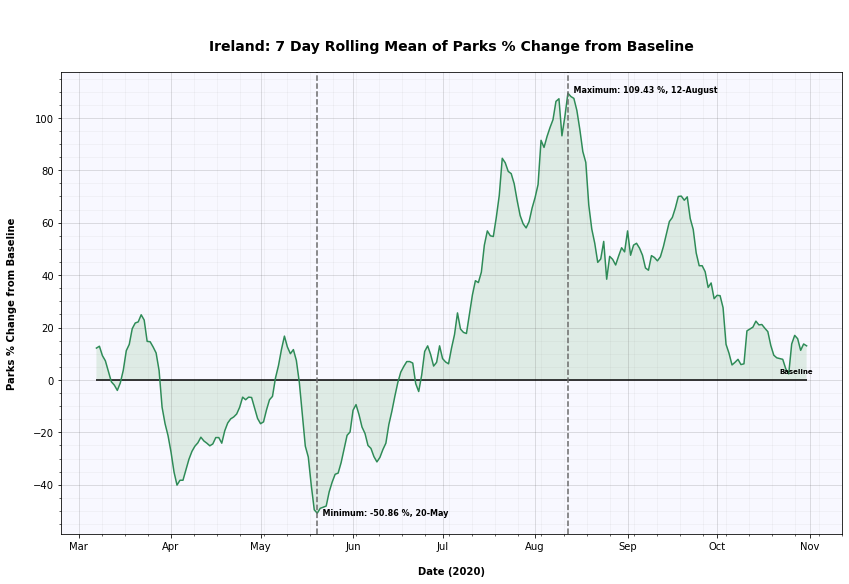

In [20]:
describe(ireland,parks)
linePlot7DayRolling(ireland, parks, True, True)

#### Ireland Parks: 
#### Analysis

The line plot above shows the 7 day rolling mean for parks % change from the baseline for Ireland. At the start of March parks % change from the baseline is 10%. In March we can see a drop to just below the baseline, followed by a rise to over 20%, followed by a drop to -40% by the end of the month. 

Throghout April and into May we can see peaks and troughs but a general upward trend, which peaks just below 20% around the first week of May. From there to the middle of the month a steep drop from almost 20% to a global minimum of -50.68% on May 20 can be seen. 

From mid May until mid August an upward trend with many peaks and troughs can be seen, from -50.68% on May 22 to a global max of 109.43% on August 12. From here to the the start of September a steep drop to 40% can be seen, followed by a peak to 70% mid September. We can then see a downward trend to the end of October, with peaks and troughs that reach a minimum of about 5%, with the figure at the end of the month being about 15%.

The spike at the beginning of March to above 20% followed by the drop to -40% is perhaps a consequence of indoor facilities such as retail shops, restaurants, gyms, etc being forced to close, which may have contributed to more people visiting outdoor parks for exercise, socialising etc. At the end of the month, the government ordered the people of Ireland not to travel further thsan 5km from their homes. A large number of poeple who were visiting parks may not live within 5km, which might explain the drop. 

I find the spike from April to the start of May surprising. A possible factor that contributed to this may be the weather. If the weather was very good during this time then more people may have decided to visit parks compared to earlier in the year (the baseline) when the weather was likely colder. Out of interest I decided to research the weather during this period. It seems that in general temperatures were higher during April than March, and rainfall was lower. This is a possible factor that may have contributed to the spike in park visits at this time. This does not however explain the drop from the beginning to the middle of May. I am unsure about what may have caused this.

I expect that the upward trend that is visible from mid May to August is a consequence of the easing of lockdown restrictions. People were still not able to visit restaurants, retail shops, gyms etc at this time, but could travel further than 5km, which may have caused a lot more people to visit parks. The peaks and troughs that are visible within this general upward trend are possibly sa consequence of weather fluctuations. 

The drop from mid August is again unexpected. Full lockdown measures were reintroduced in 3 counties, which may cause a slight drop in the parks %, but would not explain a drop of almost 70%. A drop towards the end of the year in September and October is expected as the weather became colder, students were back in school and college, meaning they would have less time to visit parks, and lockdown measures were increased for the country. 

__Summary Stats__

We can see that the average value for Parks % Change from Baseline was approx 19% with a standard deviation of 44%. The minimum value reached was -69% on April 12, which we can see is below the minimum value for the 7 day rolling mean which was -50.86 on May 20. 

The maximum value reached was 193% on August 3rd. This is 83.57% higher than the maximum value for the 7 day rolling mean. I plotted the daily values for parks and the 7 day rolling mean values, and we can clearly see a major spike on August 3rd. Because this is clearly a spike over a very short time span, only a few days, it is greatly decreased when calculating the 7 day rolling mean. Therefore, as we can see from the graph the value for the rolling mean at that time is much lower. Because calculating the 7 day rolling mean carries each value forward by a week we can see the max for the rolling mean occurs about a week after this spike.

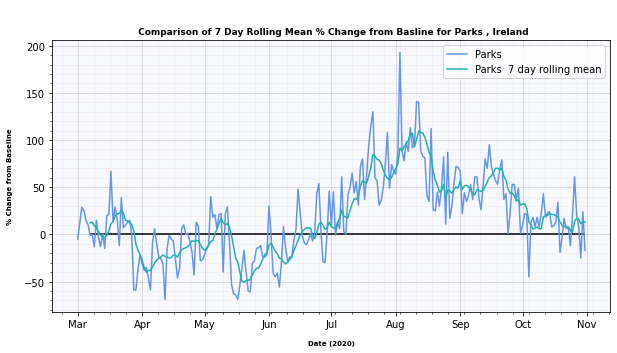

In [21]:
compareDailyAndRolling(ireland, parks)

### <font color='teal'>Ireland: Grocery & Pharmacy</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Grocery & Pharmacy % Change from Baseline</font>__

Summary Statistics: 
Ireland ;  Grocery and Pharmacy % Change from Baseline 

mean    -4.795918
std     10.046163
min    -58.000000
max     33.000000
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-12
Date of Max:  2020-03-12 



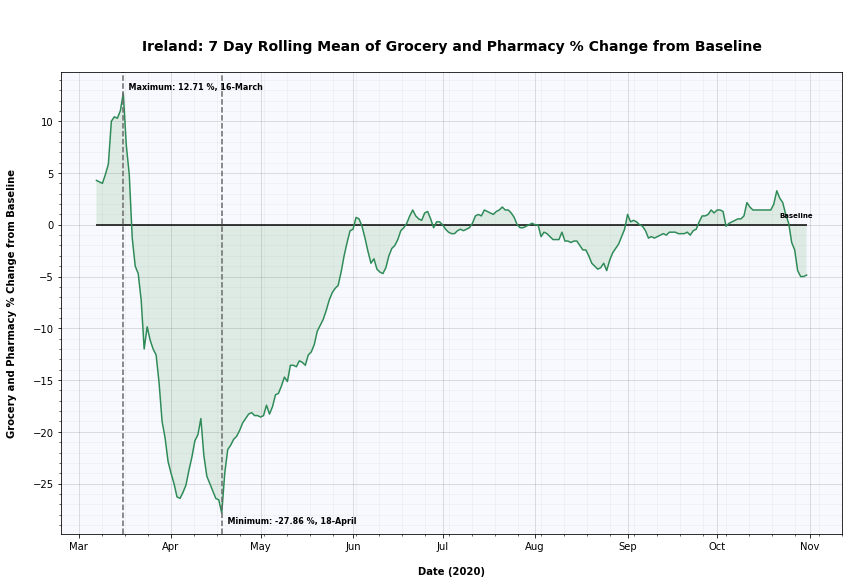

In [22]:
describe(ireland,grocery)
linePlot7DayRolling(ireland, grocery, True, True)

#### Ireland Grocery & Pharmacy: 
#### Analysis

The line plot above shows the 7 day rolling mean for grocery and pharmacy % change from baseline for Ireland. A spike can be seen at the start of March which peaked at 12.71% above the baseline on March 16. We can then see a general downward trend which reached a minimum of -27.86% on April 18. From here we can see an incline until June, which reached the baseline at the beginning of June. From June to the end of October the figure remained within about +3% and -5%, and at the end of October was just under 5%.

A likely cause of the spike to 12.71% on March 16 was the panic at the begining of the covid-19 lockdown in Ireland. It is likely that people may have been worried that supermarkets and pharmacies may sell out or close, and so decided to stock up on food and medicine. This would cause a spike in the %. 

The decline to -27.86 in April is possibly a consequence of people leaving their houses less frequently at this time, when the covid-19 lockdown restrictions were first introduced, and people were going to supermarkets and pharmacies less frequently. For example, people who may have gone to the shops most days were perhaps now just doing their shopping once a week to avoid having to leave the house as frequently. As well as this it is possible that more people were having their groceries delivered at this time to avoid leaving the house. 

From the end of April to July we can see an increase, which stayed close to the baseline from July to the end of November. We can see from this that people were visiting supermarkets and pharmacies as normal during this time. 

__Summary Stats__


We can see that the average value for Grocery & Pharmacy % Change from Baseline was approx -5% with a standard deviation of 10%. The minimum value reached was -58% on April 4, which we can see is much lower than the minimum value for the 7 day rolling mean which was -27.86 on April 18. 

The maximum value reached was 33% on March 12, which is again much higher than the maximum value for the 7 day rolling mean of -28% on April 18. I once again plotted the daily values for grocery & pharmacy and the 7 day rolling mean values below, and we can clearly see the short spikes in March and April, which are greatly decreased and carried forward about a week by the 7 day rolling mean.

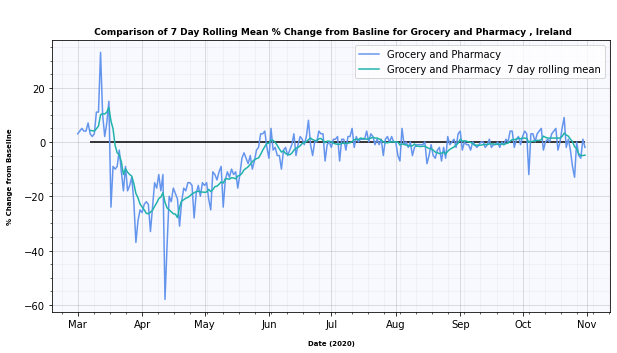

In [23]:
compareDailyAndRolling(ireland, grocery)

### <font color='teal'>Ireland: Transit Stations</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Transit Stations % Change from Baseline</font>__

Summary Statistics: 
Ireland ;  Transit Stations  % Change from Baseline 

mean   -43.404082
std     17.147264
min    -82.000000
max      2.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-12
Date of Max:  2020-03-01 



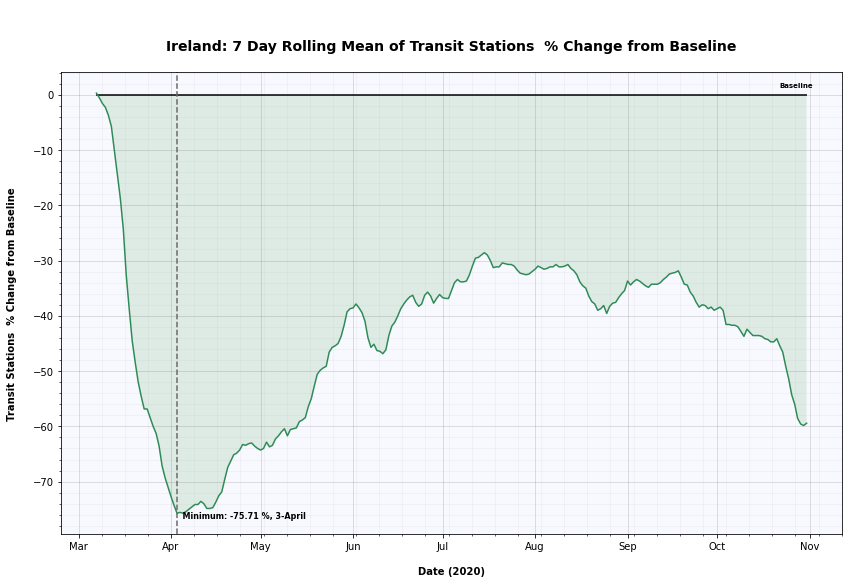

In [24]:
describe(ireland,transit)
linePlot7DayRolling(ireland, transit, True, False)

#### Ireland Transit Stations: 
#### Analysis

The line plot above shows the 7 day rolling mean for transit stations % change from the baseline for Ireland. At the begining of March the % is at the baseline. A very sharp decline from this to an absolute minimum of -75.71% on April 3rd can be seen. From this point we can see a gradual upward trend which reached about -30% by mid July. From July to the start of September the figure stayed within -30 and -40%, before gradually dropping to -60% by the end of October. 

The sharp drop in March is expected, and is likely a consequence of schools, colleges and all non-essential businesses closing / working from home. A large amount of students and professionals commute to work and college, so with the majority of travel now being just for essential workers, medical appointments, etc, a sharp decline in the transit stations % is expected. I am surprised by the increase from April 3rd, as the country was still in a strict lockdown at this time. I expected that there wouldn't be an increase again until May. From May onwards as the country began to open up again and restrictions were eased, more people would have been travelling for work again, as more businesses were allowed to reopen. Furthermore, in the summer months the people of Ireland were encouraged to go on "Staycations" within Ireland instead of travelling abroad. It is likely that people began to take trains more to get to their holiday destinations, which would increase the transit station %. From the end of September we can see a drop again as strict lockdown measures were introduced. Many people who had resumed travelling by train for work would be working from home or temporarily laid off again during this time which would cayse a drop.

Although the transit station % was much higher (+40% higher) from June - September than in the earlier months of the lockdown in Ireland (March-April), it was still significantly lower than the baseline (-30% below baseline).

__Summary Stats__

We can see that the average value for Transit Stations % Change from Baseline was approx -43% with a standard deviation of 17%. The minimum value reached was -82% on April 12, which we can see is slightly lower than the minimum value for the 7 day rolling mean which was -76 on April 3. The maximum value reached was 2% on March 3rd.

### <font color='teal'>Ireland: Workplaces</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Workplaces % Change from Baseline</font>__

Summary Statistics: 
Ireland ;  Workplaces  % Change from Baseline 

mean   -38.306122
std     20.755410
min    -86.000000
max      3.000000
Name: workplaces_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-13
Date of Max:  2020-03-03 



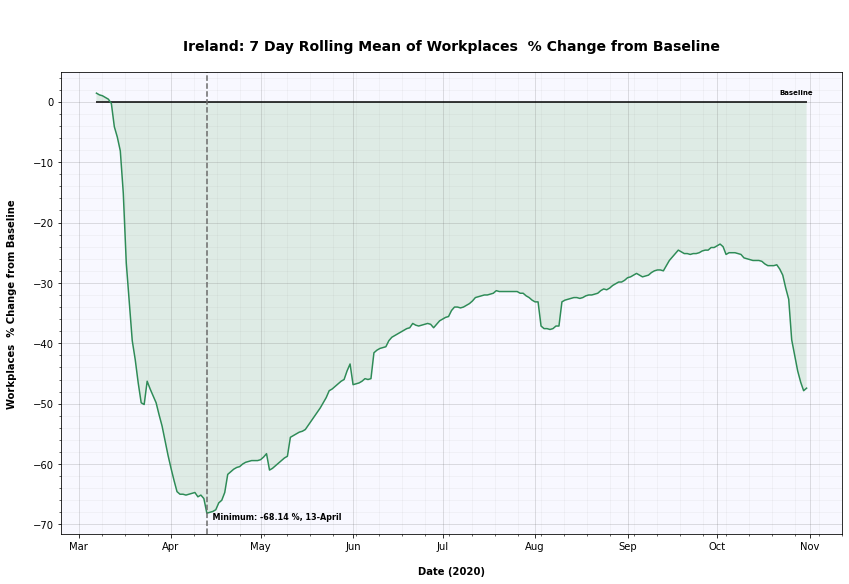

In [25]:
describe(ireland,workplace)
linePlot7DayRolling(ireland, workplace, True, False)

#### Ireland Workplace: 
#### Analysis
The line plot above shows the 7 day rolling mean for workplaces % change from the baseline for Ireland. A sharp decline can once again be seen from the beginning of March, where it was at about 2% above the baseline, to -68.14% on April 13. This is expected as many business instructed their staff to work from home, and many non-essential busineses closed their doors and temporarily / permanently laid off their staff. 

From mid April a very gradual increase can be seen until October. This would indicate that more and more people were gradually returning to work. This is not surprising as the lockdown measures were gradually eased and more businesses opened up again. By October the figure had reached -25%, so it was still significantly lower than the baseline. 

From the middle of October a very sharp drop from about -27% to almost -50%. A factor which likely contributed to this was the country returning to strict lockdown restrictions again, as many businesses were forced to close temporarily or operate remotely from home.

__Summary Stats__

We can see that the average value for Workplaces % Change from Baseline was approx -38% with a standard deviation of 21%. The minimum value reached was -86% on April 13, which we can see is 18% lower than the minimum value for the 7 day rolling mean which was -68 on April 13. The maximum value reached was 3% on March 3rd.

__Plot of Daily Values__

When we plot the daily value for workplace % as opposed to the 7 day rolling mean we notice something very interesting. The graph below shows the daily values.

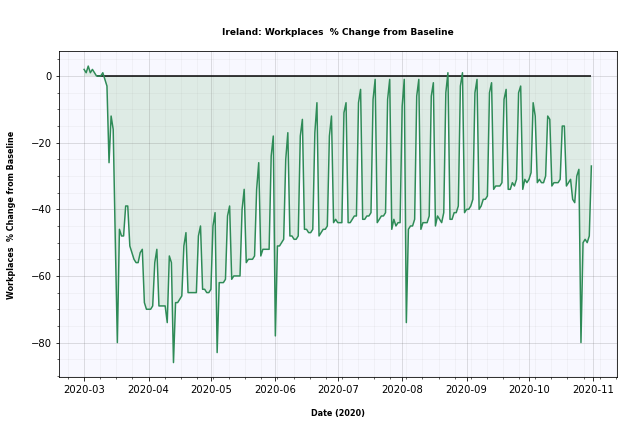

In [26]:
plotCategory(ireland, workplace)

We can see that about 4 times a month there is a major spike of about +20 to +40% over about 2 days. Variation in the data with lots of spikes and troughs are always expected, but its just very interesting that these spikes are so uniform, always about 4 times a month, always spanning about 3 days.

So it seems that every week for about 3 or 3 consecutive days of the week there are significantly more people going to work, and we can see that this spike is larger in the months in which lockdown restirctions were less strict (larger spike in summer months than April, or October). I found this really interesting and unexpected and it puzzled me about what could cause this. 

Because the % change from the baseline is not just based off of one baseline day, but off of different days for the different days of the week - so for example Monday is based off a Monday baseline - the cause couldnt be that the spikes were the working days and the the weekends therefore had lower percentages -as the weekends are based off of saturday and sunday baselines.

One possible factor that may have caused this is that many companies had their staff working from home most of the week and in the office 1 or 2 days a week to minimise the amount of time staff were in contact. Although I would find it still somewhat surprising if this were the case, as the shape of the graph would indicate that the majority of these companies all happened to choose the same days in the week to work in the office. I found this very interesting and puzzling.

### <font color='teal'>Ireland: Residential</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Residential % Change from Baseline</font>__

Summary Statistics: 
Ireland ;  Residential % Change from Baseline 

mean    14.559184
std      8.635229
min     -1.000000
max     34.000000
Name: residential_percent_change_from_baseline, dtype: float64
Date of Min:  2020-03-03
Date of Max:  2020-04-03 



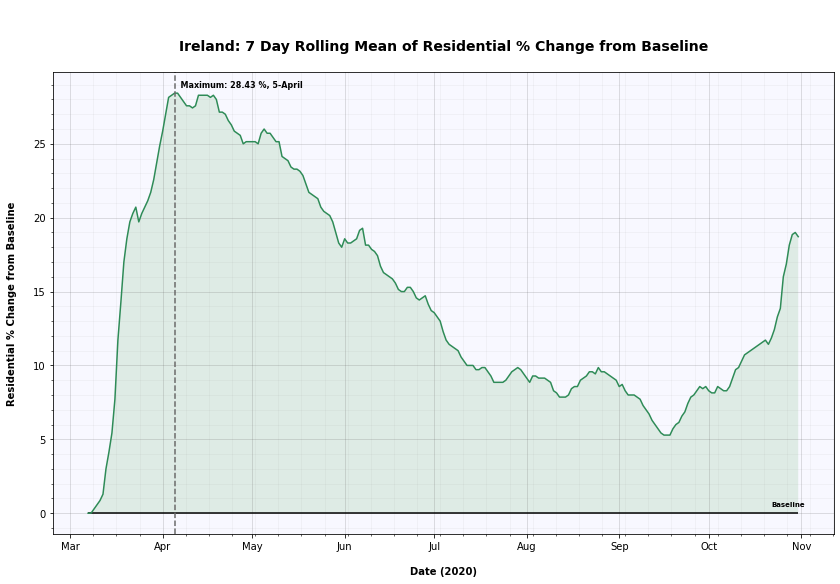

In [27]:
describe(ireland,residential)
linePlot7DayRolling(ireland, residential, False, True)

#### Ireland Residential: 
#### Analysis

The line plot above shows the 7 day rolling mean for resedential % change from the baseline for Ireland. A steep increase can be seen at the beginning of March which peaked at 28.43% on April 5. From this point we can see a very gradual decrease which reached a minimum of 5% above the baselne mid September. From here we can see an incline again to 20% above the baseline by the end of October.

The spike at the beginning of March indicates that more people were staying at home in comparison to the baseline, which is expected due to the ban on non-essential travel within 5kms of ones house at this time. 

I was surprised that the figure wasn't even higher. Perhaps this is a reflection of many people not adhering to the guidelines at the beginning of the lockdown. Another possible factor affecting this is that the baseline figures are based off of January when school and college students may still have been on their break between terms. During this time they may have been spending a lot more time at home than usual. Perhaps if the baseline was measured at a different time of year then the % change from the baseline would be hugher in March.

As the lockdown restrictions were slowly eased in Ireland, people began to leave their homes more frequently again, and this is reflected in the downward trend from May to September. The incline from the end of September is also unsurprising, as it is in line with the strict lockdown measures being reinstated. 


We can see that the first turn to a downward trend starts in April, even though lockdown restrictions were still very strict at this time, which might indicate that by April many people stopped following the full restrictions that were in place and were leaving their house more than was reccomended and perhaps travelling further than 5km.

__Summary Stats__

We can see that the average value for Residential % Change from Baseline was approx 14% with a standard deviation of 8%. The maximum value reached was 34% on April 3rd, which we can see is higher than the maximunm value for the 7 day rolling mean which was 28% on April 5th. The minimum value reached was -1% on March 3rd, which was before the lockdown restrictions were introduced.

__Plot of Daily Values__

When we plot the daily value for residential % as opposed to the 7 day rolling mean we notice that the graph is quite similar to that of Workplaces. The graph below shows the daily values.

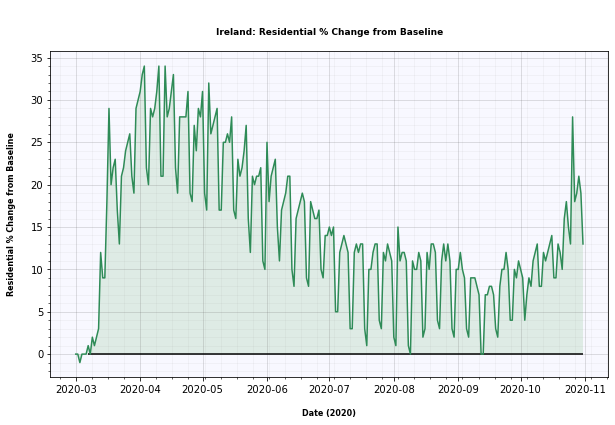

In [28]:
plotCategory(ireland, residential)

This is again both interesting and puzzling. We can see that similar to Workplaces in which there were unifrom spikes, here there are uniform sharp drops about 4 times a month, or every week, which span about 3 days. The sharp drops in this case are about -10 to -15%. 

If my prediciton that the cause in the uniform spikes for workplaces was due to many companies having staff in the office for only a few days each week, then this could cause similar drops for residential, as these people who are working from home for most of the week are now leaving their homes on these days to go into work, which would cause a drop on these days.

This might not be the cause of these sharp drops but is a possible explanation.

## <font color='teal'> Ireland: Comparison of Categories</font>

Next I am interested in comparing how the different categories changed throughout the year. To get a general idea of how the categories compared I decided to plot a matrix of lineplots of each pair of categories. This should give me a good indication of the pairs/groups of categories that I should explore in further detail. These are not intended to be studied in great detail, but more as a general overview. 

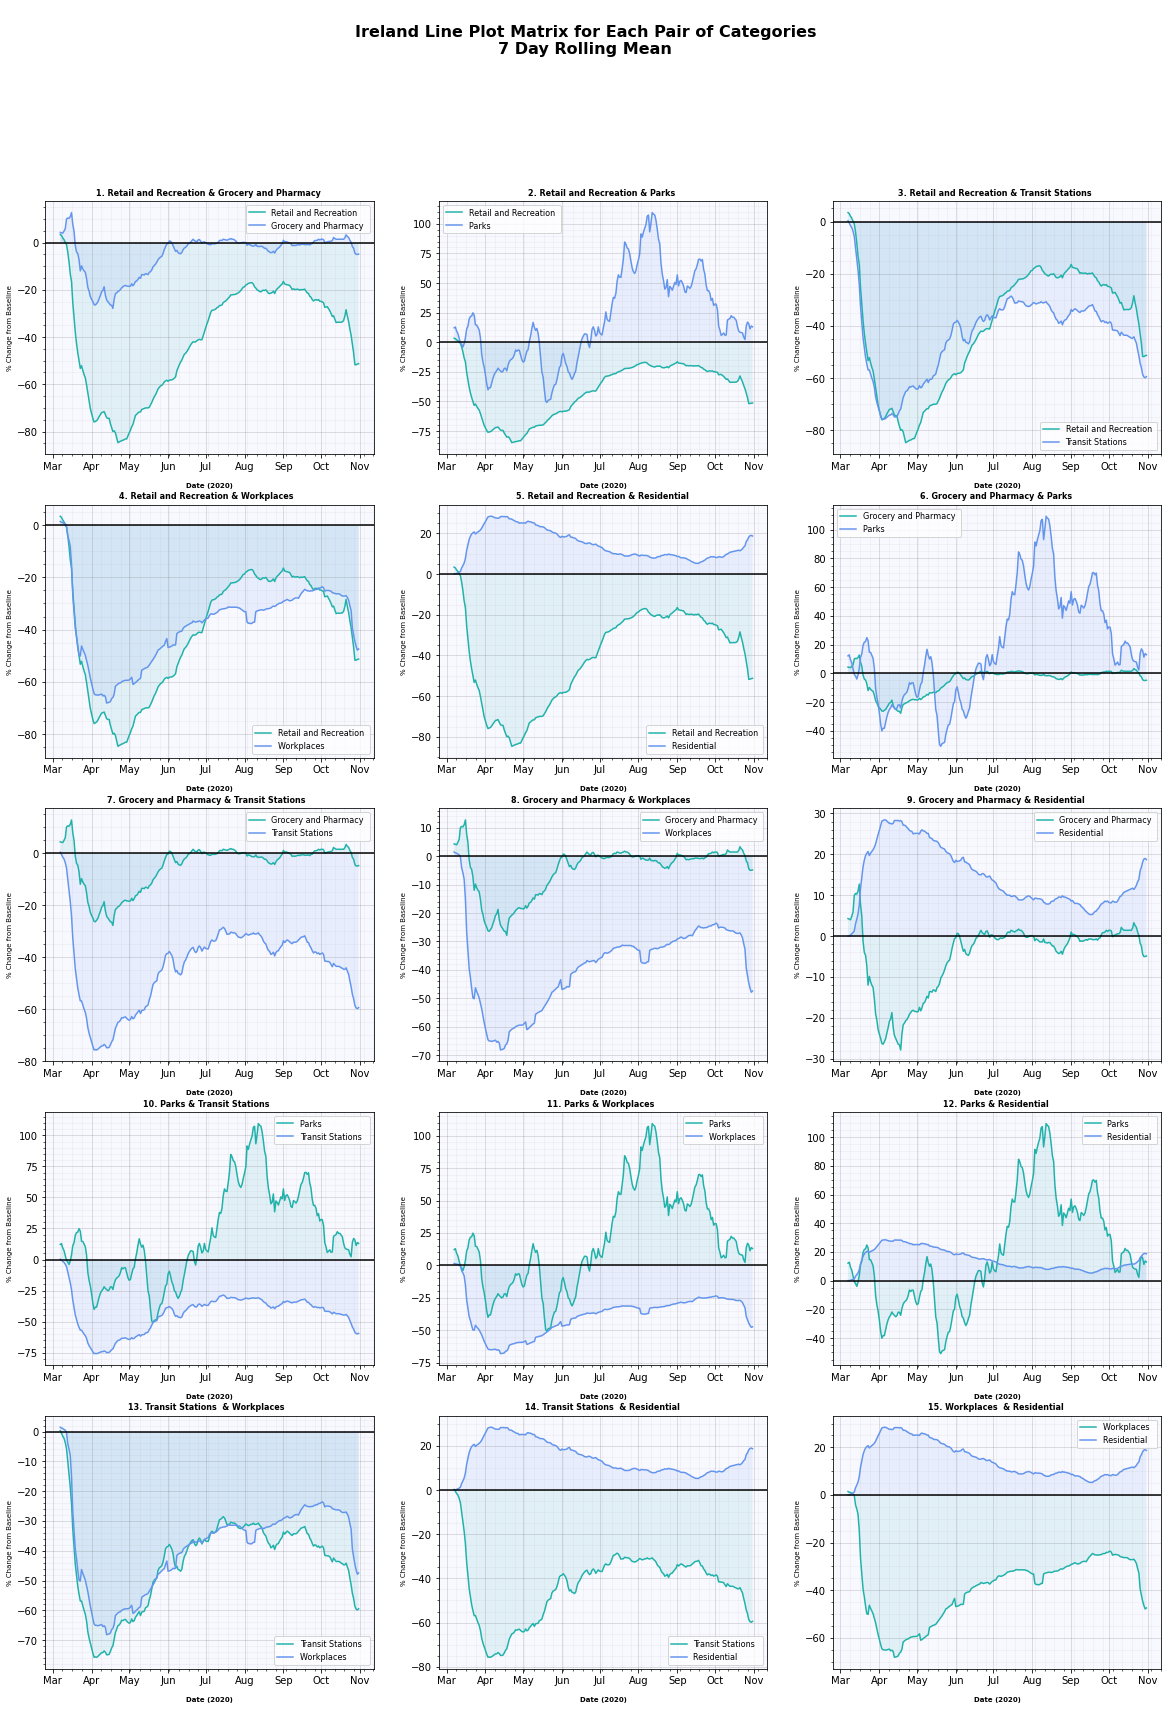

In [29]:
linePlotMatrix(ireland, 7)

The above graphs have given my a good general overview of categories which have interesting similarities and differences. Marked with a __bold__ below are the pairs of categories that I think have interesting similarities/difference that I would like to explore in further detail.

1. __Similar trends in Retail & Recreation and Grocery & Pharmacy__
2. Similar trends in Retail & Recreation  and Parks but a lot more variation in Parks
3. __Very similar trends in  Retail & Recreation & Transit Stations__
4. Similar trends in  Retail & Recreation & Workplaces with a lot more variation in Workplaces
5. __Symmetry between Retail & Recreation and Residential with more spread in Residential values__
6. Not much similaririty between Grocery & Pharmacy and Parks
7. Similar trends between Grocery & Pharmacy and Transit Stations, but with much lower values for Transit Stations
8. Similar trends between Grocery & Pharmacy and Workplaces but a lot more variation in the values for Workplaces
9. Some symmetry between Grocery & Pharmacy and Residential
10. Not much similarity between Transit Stations & Parks
11. Not much similarity between Workplaces & Parks
12. __Some symmetry between Residential and Parks__
13. __Similar trends between Transit Stations & Workplaces with a lot more variation in Workplaces__
14. __Symmetry between Transit Stations & Residential__
15. __Symmetry between Workplaces & Residential with very similar variation in both__

### <font color='cadetblue'>Ireland: Workplaces & Transit Stations</font>

We can immediately see from the graphs above that there is a strong relationship between Workplaces and Transit Stations (graph 13). To see this in more detail I will plot the lineplot of the two categories together once again but larger.

__Line Plot Workplaces & Transit Stations, Ireland__

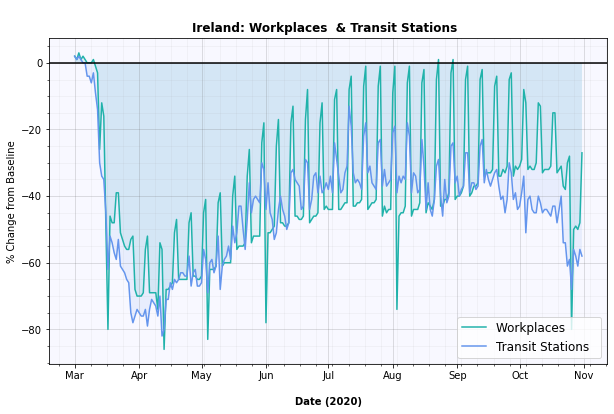

In [30]:
linePlotMultipleRolling(1, ireland, [workplace, transit], 0)

We can see from the graph above that there are very similar trends in Workplaces and Transit Stations throughout the year.

We noticed earlier the interesting shape in the uniform peaks for workplace, and speculated about possible factors that might have contributed to this. We can see from the graph above that similar spikes can be seen for transit stations which line up quite closely to those of workplaces, although they are less major spikes of typically less than 20%, in comparison to those of workplace which are more than 40% at times. This means that on the occasions about 4 times a month when we can see a large increase in workplaces % that spans typically about 3 days, that there are smaller but noteworthy spikes in transit stations at this time. It is very likely that there is a relationship between these two variables, where possible one these occasions that significantly more people are going to work a large portion of these people are taking trains, which would cause an increase in transit stations %.

__Scatter Plot Workplaces & Transit Stations, Ireland__

It is likely from the similarities between the trends in the graph above for workplaces and transit stations that there is a positive linear relationship between the two. To check this and to understand the strength of this linear relationship we can plot a scatter plot and calculate the correlation coefficient.

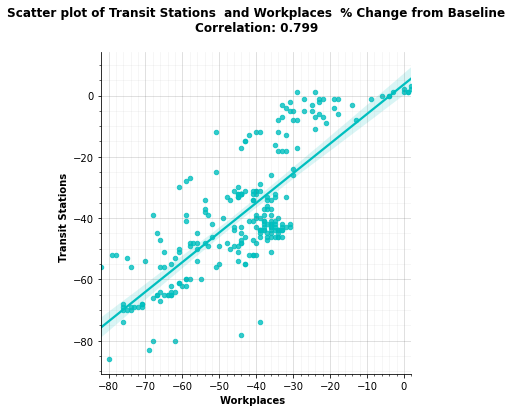

In [31]:
scatter(ireland, [transit, workplace])

It is immediately clear from the scatter plot that the linear relationship between the two variables, workplaces and transit stations, is strong and positive. We know that it is positive from the slope of the line of regression, and can see that the markers lie very close to the line, indicating a strong relationship. This is confirmed in the calculation of the correlation coefficient, 0.799. It is positive and close to 1 indicating a strong positive relationship.

__Histogram Workplaces & Transit Stations, Ireland__

We can see from the lineplot of workplaces and transit stations that there is more spread in the values for workplaces, with regular spikes of about 30%, and on multiople occasions about 60%. The values for transit stations however have less spread, with variation of usually less than 20%. To visualise this distribution we can plot a histogram. 

mean   -38.306122
std     20.755410
Name: workplaces_percent_change_from_baseline, dtype: float64
mean   -43.404082
std     17.147264
Name: transit_stations_percent_change_from_baseline, dtype: float64


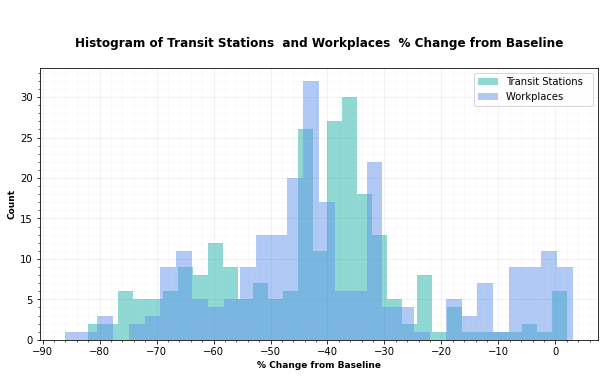

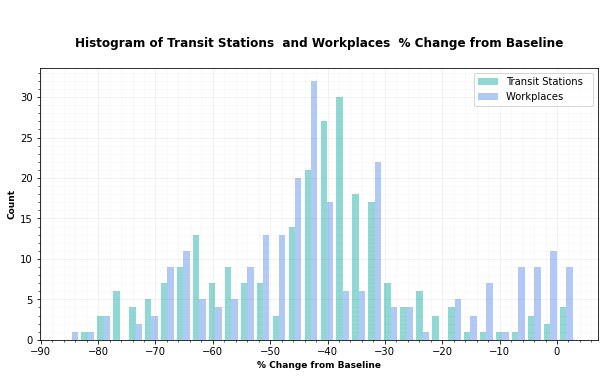

In [32]:
print(ireland[workplace].describe()[["mean", "std"]])
print(ireland[transit].describe()[["mean", "std"]])
displayHistograms(ireland, [transit, workplace], [-90, 10, 10], [1, 3])

The above histograms show the distribution of the values for transit stations and workplaces, the first showing the bars overlapping, and the second showing the bars side by side. From the second histogram we can see very clearly that the distribution for the lower values from -90% to about -55% are very similar. For the values between -50 and -30% the count is typically higher for transit stations, although it is very similar overall. For the larger values of -30 to over 0% we can clearly see that workplaces takes a larger portion of these values.

The first histogram is useful for visualisiong the overal shape of the distribution. It is clear that both transit stations and workplaces have bell shaped curves very close to the normal distribution. The values for transit stations are more concentrated around the mean of -43%, whereas there is more spread in the values for workplaces. We can see this more clearly if we plot a distribution curve for each.

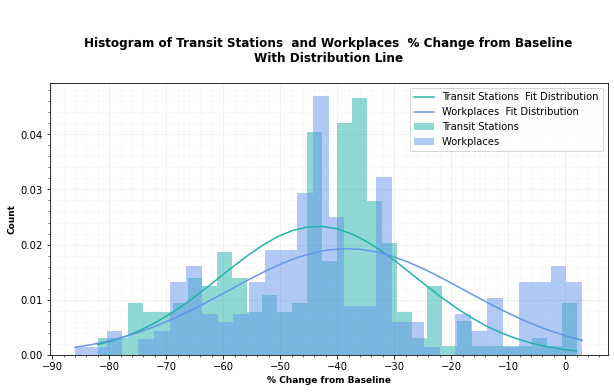

In [33]:
histogram(ireland, [transit, workplace], [-90, 10, 10], 2)

We can see from the distribution curves that the curve for workstations is much flatter as there is more spread in the values, whereas the curve for transit stations has a taller peak and flatter tails as the values are more concentrated around the mean.

### <font color='cadetblue'>Ireland: Workplaces & Residential</font>
    
Next we will compare Workplaces and Residential. We noticed earlier an interesting similaritiy between the peaks and drops of the two. This can be seen in the lineplot below.

__Line Plot Workplaces & Residential, Ireland__

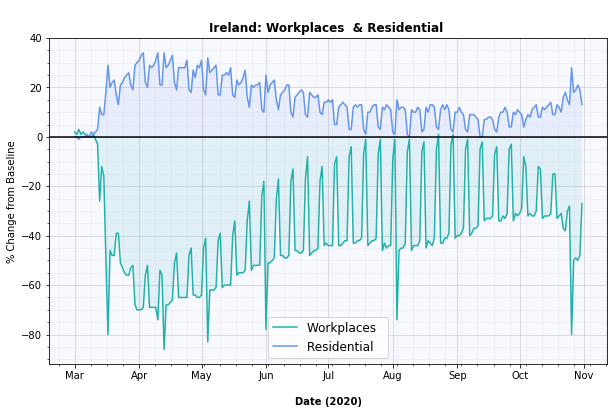

In [34]:
linePlotMultipleRolling(1, ireland, [workplace, residential], 0)

As mentioned earlier, we can see that there are uniform peaks about 4 times a month spanning about 3 days for workplaces, and we can see drops in residential % at these times. It is possible that during these times when larger numbers were going to work, this caused a drop in the % staying at home since they had to leave the house to go to work. 

We can see very strong symmetry between the two lines above. When residential increases workplace decreases, and when we see a decline in residential we see an incline in workplaces. This would indicate a strong negative relationship. To check this we will plot a scatter plot.

__Scatter Plot Workplaces & Residential, Ireland__

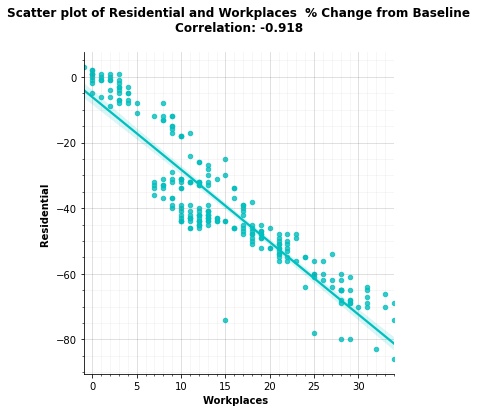

In [35]:
scatter(ireland, [residential, workplace])

We can see immediately that there is a very strong negative linear relationship. The slope of the line tells us that the relationship is negative, and we can see by how close the markers are to the regression line that the relationship is strong. This is confirmed by the correlation coefficient, -0.918, which is positive and close to -1 indicating a strong negative relationship.

This relationship would make sense. If people are not going to work they are more than likely staying home, so a decrease in workplace % would cause an increase in residential. If people are going to work more again then they won't be at home as much, so an increase in workplace would cause a decrease in residential.

__Histogram Workplaces & Residential, Ireland__

We will plot a histogram to explore their distribution.  The two categories take very different values due, with workplaces typically below the baseline, and residential above, so there will be very little overlap in the histograms, but we will be able to compare the distribution of the values.

mean   -38.306122
std     20.755410
Name: workplaces_percent_change_from_baseline, dtype: float64 

mean    14.559184
std      8.635229
Name: residential_percent_change_from_baseline, dtype: float64
Residential Median   13.0


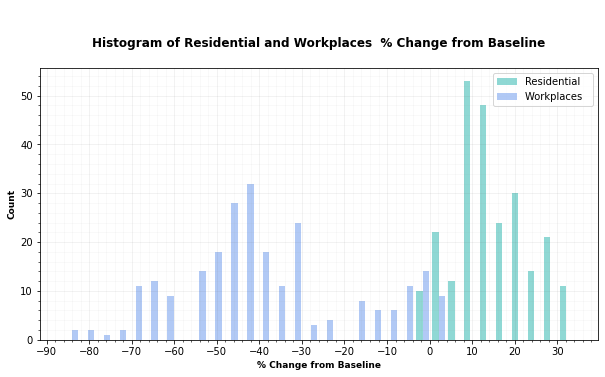

In [36]:
print(ireland[workplace].describe()[["mean", "std"]], "\n")
print(ireland[residential].describe()[["mean", "std"]])
print("Residential Median  ",ireland[residential].median())

histogram(ireland, [residential, workplace], [-90,40, 10], 3)

We can see that there is a lot more spread in the values for workplaces, with a spread of about 90%, wherease residential is a lot more concentrated around the mean and median values of 8% and 13%, with spread of about 30%. Approximately normal distributions are visible for both, indicated by the bell shapes.

We can see this more clearly by plotting distribution curves:

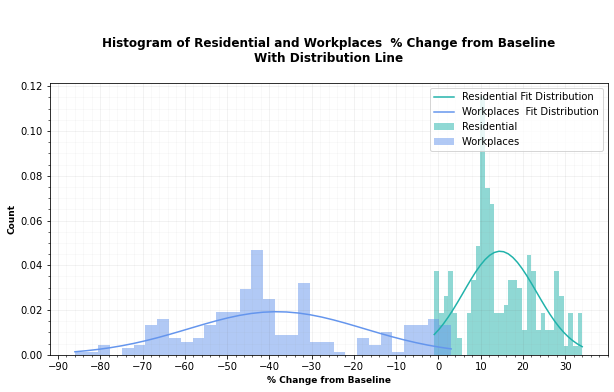

In [37]:
histogram(ireland, [residential, workplace], [-90, 40, 10], 2)

We can see that workplaces has a much flatter and longer curve, wheras residential has a taller peak and less spread. 

### <font color='cadetblue'>Ireland: Retail & Recreation and  Grocery & Pharmacy</font>

Next we will compare  Retail & Recreation and  Grocery & Pharmacy. We will start by looking again at the line plot.

__Line Plot Retail & Recreation and  Grocery & Pharmacy, Ireland__

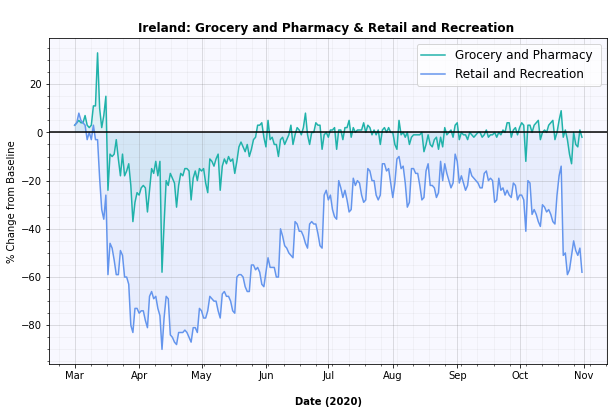

In [38]:
linePlotMultipleRolling(1, ireland, [grocery, retail], 0)

We can see very similar trends between the two variables. We see a drop from March to April, followed by an incline from April to July, not much change from July to September, and then we see a drop in Retail & Recreation again from September. The graph above would suggest that there is a positive linear relationship between the two. We can check this with a scatter plot.

__Scatter Plot Retail & Recreation and  Grocery & Pharmacy, Ireland, Ireland__

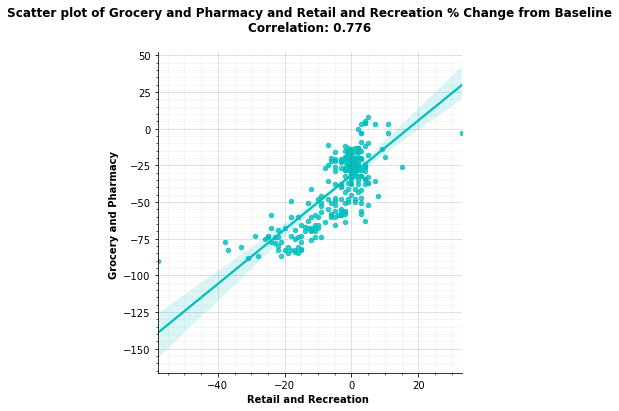

In [39]:
scatter(ireland, [grocery, retail])

As expected, we can see a strong positive linear relationship. We know this by the slope of the line of regression and the distance of the markers from the line. This is confirmed by the correlation coefficient, 0.776 which is positive and close to 1. 

__Histogram Retail & Recreation and  Grocery & Pharmacy, Ireland__

Next we will look at the distributions by plotting a histogram.

mean   -40.502041
std     24.049918
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64
mean    -4.795918
std     10.046163
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64


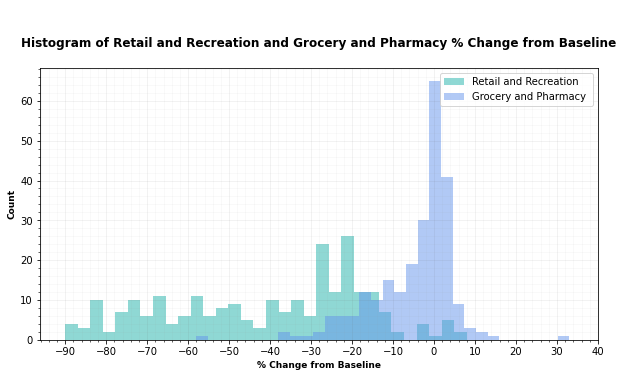

In [40]:
print(ireland[retail].describe()[["mean", "std"]])
print(ireland[grocery].describe()[["mean", "std"]])
histogram(ireland, [retail, grocery], [-90, 50, 10], 1)

We can see that there is a lot more spread in the values for retail and recreation. The values are fairly evenly distributed from -90 to -40%, with small peaks and troughs, and then peaks are visible and -30% and -20% making up about 9 and 10% of the values respectively (23/245 x 100, and 25/245  x 100).

A distribution closer to the normal distribution is visible for grocery and pharmacy, with a very tall peak and slight skew to the left. There is less spread in the values, with most values between -40 and 15%, with outliers at -60 and 30%. Retail and Recreation has a much further spread and flatter distribution, with values ranging from -90 to just below 10%.

### <font color='cadetblue'>Ireland: Parks & Residential</font>
    
We saw from the matrix of line plots that there wasn't any very obvious strong relationship between parks and any of the other categories. Some symmetry was visible between parks and residential so I have decided to look at this in more detail.I will start by plotting the line plot again below. I will plot a 7 day rolling mean.
    
__Line Plot Parks & Residential, 7 Day Rolling Mean__

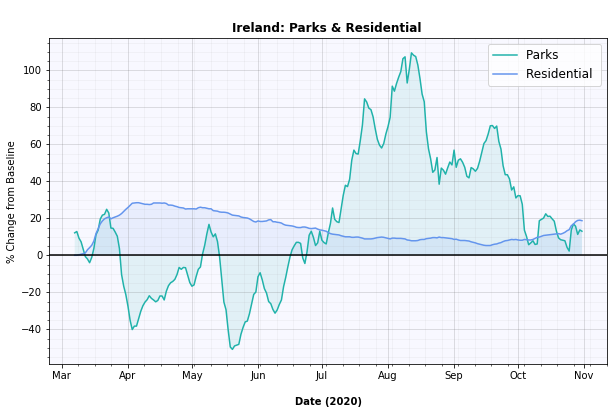

In [41]:
linePlotMultipleRolling(7, ireland, [parks, residential], 0)

We can see some symmetry between the two, as we see that when residential begins to rise parks begin to fall, however within this we can see large spikes in parks that are not reflected in residential. When residential begins to fall by about 10% we can see a major increase in parks by over 140%. When parks begin to fall again we can see an increase in residential. This would all indicate a negative linear relationship, although I don't predict the relationship to be particularly strong. To see this we will plot a scatter plot. 

__Scatter Plot Parks & Residential, Ireland__

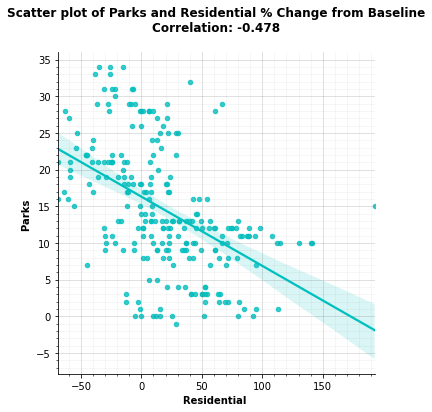

In [42]:
scatter(ireland, [parks, residential])

We can see by the line of regression that the relationship is negative, however the distance from the markers to the line would indicate that the relationship is not very strong. This is confirmed by the correlation coefficient of -0.478 which is negative but not particularly close to -1. 


This relationship would make sense, as if people are leaving their homes to go to parks then a decrease in residential in this case would cause an increase in parks. Because of the fact that there are lots of reasons for a decrease in residential that are not always caused by people going to parks, this relationship is not very strong. It is perhaps stronger than before the Covid-19 pandemic, as with less indoor facilities open the likelihood of people going to parks when they leave their house may have increased. 

__Histogram Parks & Residential, Ireland__

We can see from the line plot that there is a lot more spread in the data for parks than for residential. To see this distribution in more detail we will plot a histogram.

mean    14.559184
std      8.635229
Name: residential_percent_change_from_baseline, dtype: float64
mean    18.587755
std     43.762556
Name: parks_percent_change_from_baseline, dtype: float64


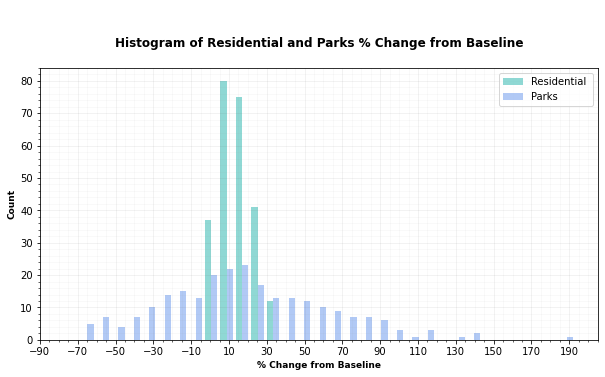

In [43]:
print(ireland[residential].describe()[["mean", "std"]])
print(ireland[parks].describe()[["mean", "std"]])
histogram(ireland, [residential, parks], [-90, 200, 20], 3)

We can see approximately bell shaped curves for both categories, however there is significantly more spread for Parks. The values for parks are mostly between -70 and 140% with an outlier at 190%, which is altogether a range of 260%. The values for residential however are all within a range of 30% between 0 and 30. We can therefore see a tall thin shaped distribution for residential, and a much flatter distribution with long thin tails for parks.

## <h3 align="center"> <font color='teal'> Summary: Ireland </font> </h3>

For Ireland I analysed each of the categories individually, before looking at the similarities between the trends, distribtutions and the correlations for grocery & pharmacy and retial & recreation, residential & workplaces, and transit stations and workplaces.

Summarised below are the trends for each of the categories for Ireland:


__Retail & Recreation__
- Mean of - 41%
- Standard deviation of 24%
- 8% at beginning of March
- Steep drop to min of - 90% on April 12
- Gradual increase to about - 20% mid August
- Downward trend from August to end of October reaching over - 50% by the end of October

__Parks__
- Mean of 19%
- Standard deviation of 43%
- Minimum of - 69% on April 12th
- Upward trend from mid May. 
- About -50% mid May to max of 193% on August 3rd
- Downward trend from mid August reaching about 15% above the baseline by the end of October

__Grocery & Pharmacy__
- Mean of -5%
- Standard deviation of 10%
- Spike in March to max of 33% on March 12th
- Steep drop to minimum of -58% on April 12th
- Upward trend which reached the baseline by the beginning of June
- Figure stayed within +/- 5% of the baseline from June to the end of October

__Transit Stations__
- Mean of -43%
- Standard deviation of 17%
- Max of 2% on March 1st
- Steep drop to minimum of -82% on April 12th
- Steady increase to about -30% in August
- Gradual decline to -60% by the end of October

__Workplaces__
- Mean -38%
- Standard deviation 21%
- Max of 3% on March 3rd
- Steep drop to minimum of -86% on April 13th
- Gradual incline until the beginning of October where it reached about -25%
- Downward trend from mid October reaching almost -50% by the end of October

__Residential__
- Mean of 15%
- Standard deviation of 9%
- Minimum of -1% on March 3rd
- Steep increase to max of 34% on April 3rd
- gradual decline to about 6% mid October
- Increase from mid October to 19% at the end of October

__Comparisons:__

__Workplaces & Transit Stations__
- Very similar trends
- Strong positive correlation of 0.799
- Similar distributions

__Workplaces & Residential__
- Symmetry in the trends
- Strong negative correlation of -0.918

__Retail & Recreation and Grocery & Pharmacy__
- Similar trends
- Strong positive correlation of 0.776

__Parks & Residential__
- Some symmetry in the trends
- Negative correlation of -0.478

# <font color='teal'>Task 1: United States</font>



Next we will look at the US. I will start by collecting and preparing my data.

### <font color='cadetblue'>United States: Data Collection & Preperation</font>

In [44]:
US = prepareData("united_states.csv", "United States")



 United States  Mobility Dataset: 

Date Range:  2020-03-01  -  2020-10-31 

Number of missing Values per column:

id                                                    0
country                                               0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64 

Number of rows:  245 

Number of missing rows:  0 

Cleaned Data Frame: 


id        country  \
date                                 
2020-03-01  2333910  United States   
2020-03-02  2333911  United States   
2020-03-03  2333912  United States   
...             ...            ...   
2020-10-29  2334152  United States   
2020-10-30  2334153  United States   
2020-10-31  2334154  United States   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-03-01                                               13.0    
2020-03-02                                                7.0    
2020-03-03                                               11.0    
...                                                       ...    
2020-10-29                                              -17.0    
2020-10-30                                              -14.0    
2020-10-31                                              -16.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-03-01                                                9.0   
2020-03-02                                                6.0   
2020-03-03                                               10.0   
...                                                       ...   
2020-10-29                                               -7.0   
2020-10-30                                               -4.0   
2020-10-31                                                2.0   

            parks_percent_change_from_baseline  \
date                                             
2020-03-01                                18.0   
2020-03-02                                10.0   
2020-03-03                                20.0   
...                                        ...   
2020-10-29                                -6.0   
2020-10-30                                 1.0   
2020-10-31                                27.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-03-01                                            7.0   
2020-03-02                                            2.0   
2020-03-03                                            3.0   
...                                                   ...   
2020-10-29                                          -35.0   
2020-10-30                                          -32.0   
2020-10-31                                          -23.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-03-01                                      3.0   
2020-03-02                                      3.0   
2020-03-03                                      2.0   
...                                             ...   
2020-10-29                                    -31.0   
2020-10-30                                    -30.0   
2020-10-31                                    -10.0   

            residential_percent_change_from_baseline  
date                                                  
2020-03-01                                      -1.0  
2020-03-02                                      -1.0  
2020-03-03                                      -1.0  
...                                              ...  
2020-10-29                                      10.0  
2020-10-30                                       8.0  
2020-10-31                                       3.0  

[245 rows x 8 columns]

## <font color='teal'>United States: Visualisation & Analysis</font>

Now that my data is prepared, cleaned and ready for use I will start by plotting and analysing line plots for each of the columns for the United States. This will give a good visualisation of the trends, showing the peaks, troughs and maximum and minimum values reached.


For Ireland the lockdown measures were for the most part the same all over the country (with the exception of the Laois, Kilare and Offaly lockdown and the Dublin lockdown). We could therefore easily see the affects of the different nationwide lockdown meausures implemented at different times throughout the year on the various categories. This is a lot more difficult for the United States. In the US the restrictions were implemented by each state individually, so the lockdown measures differed from state to state. Because of this, it is difficult to link trends with specific lockdown measures that were in place at the time like we could with Ireland.

### <font color='teal'>United States: Retail & Recreation</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Retail & Recreation % Change from Baseline</font>__

Summary Statistics: 
United States ;  Retail and Recreation % Change from Baseline 

mean   -20.008163
std     12.381567
min    -63.000000
max     13.000000
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-12
Date of Max:  2020-03-01 



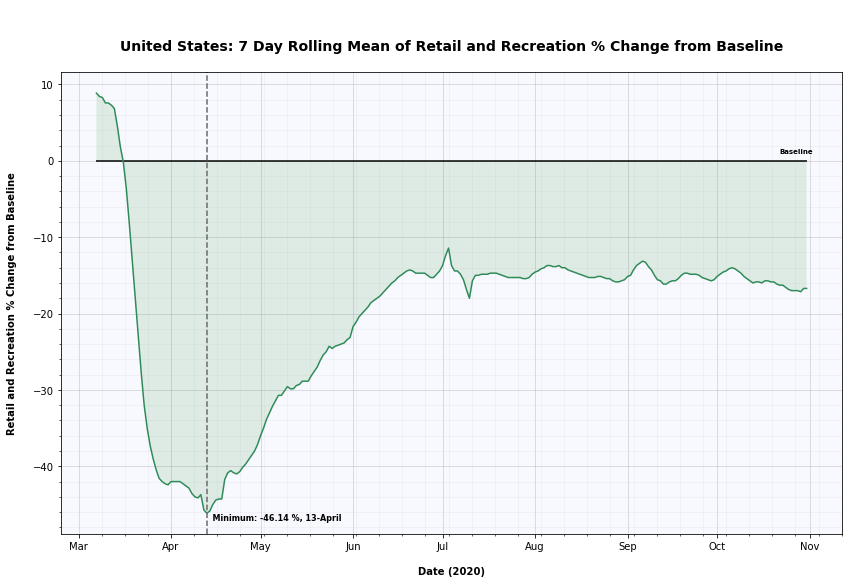

In [45]:
describe(US,retail)
linePlot7DayRolling(US, retail, True, False)

__Analysis__

The line plot above shows the 7 day rolling mean for retail and recreation percentage change from the baseline for the United States. We can see that at the start of March the retail and recreation percentage is above the baseline, almost 10% above. There are many factors that may cause this, the most likely being that the basline is from just after Christmas (in January), and people may be less likely to be shopping or engaging in recreational activities just after Christmas. By March it is likely that people would have resumed these activities, meaning the percentage would be above the baseline.

From the beginning of March a drastic drop in the percentage can be seen, which continues to fall steeply until mid April. On April 12 it reaches a global maximum of 46.14% below the baseline.

From mid April a gradual increase can be seen until July. From July to the end of October, the % below the baseline settled between 10% and 20% with small variation but no major spikes. 

__Summary Stats__

The mean was -20% with a standard deviation of 12%. The minimum value was -63% on April 12th, which is below the 7 day rolling mean max of 46%.

### <font color='teal'>United States: Parks</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Parks % Change from Baseline</font>__

Summary Statistics: 
United States ;  Parks % Change from Baseline 

mean    28.902041
std     27.327825
min    -36.000000
max     86.000000
Name: parks_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-12
Date of Max:  2020-07-03 



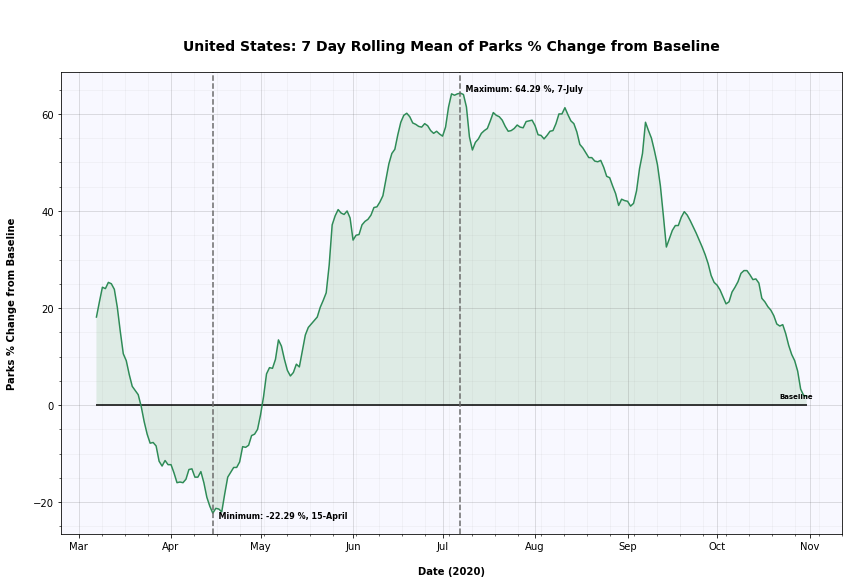

In [46]:
describe(US,parks)
linePlot7DayRolling(US, parks, True, True)

__Analysis__

The line plot above shows the 7 day rolling mean for parks % change from the baseline for the United States. We can see that at the start of March the parks % is above the baseline, almost 20% above. There is a small spike that reaches about 25% at the begining of march, and then a steep drop to the global minimum of -22.29 % on April 15. This rolling minimum is above the actual minimum of -36% on April 12.

From mid April to July a steep increase can be seen, which has an absolute max of 64.29% above the baseline on July 7. The figure stayed between around 50-60% for July until mid August. From mid August we can see a downward trend with a spike to almost 60% in September, followed by a fall to just above the baseline by the end of October.

The increase is likely a consequence of indoor facilities for recreation and exercise closing for much of the year in many states. We can see a drop from August which may be a consequence of these facilities reopening. It is possible that weather was once again a factor here. Perhaps the warmer weather in the summer months for many  parts of the US meant an increase in the amount of people visiting parks. We can then see a drop as we enter into autumn and winter when the weather is likely becoming much colder for much of the US.

__Summary Stats__

The mean for parks was 29% with a standard deviation of 27%. The maximum value reached was 86% on July 3rd. This is above the 7 day rolling mean max of 64% on July 7th The minimum reached was -36 on April 12th.

### <font color='teal'>United States: Grocery & Pharmacy</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Grocery & Pharmacy % Change from Baseline</font>__

Summary Statistics: 
United States ;  Grocery and Pharmacy % Change from Baseline 

mean    -4.248980
std      7.318798
min    -39.000000
max     26.000000
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-12
Date of Max:  2020-03-13 



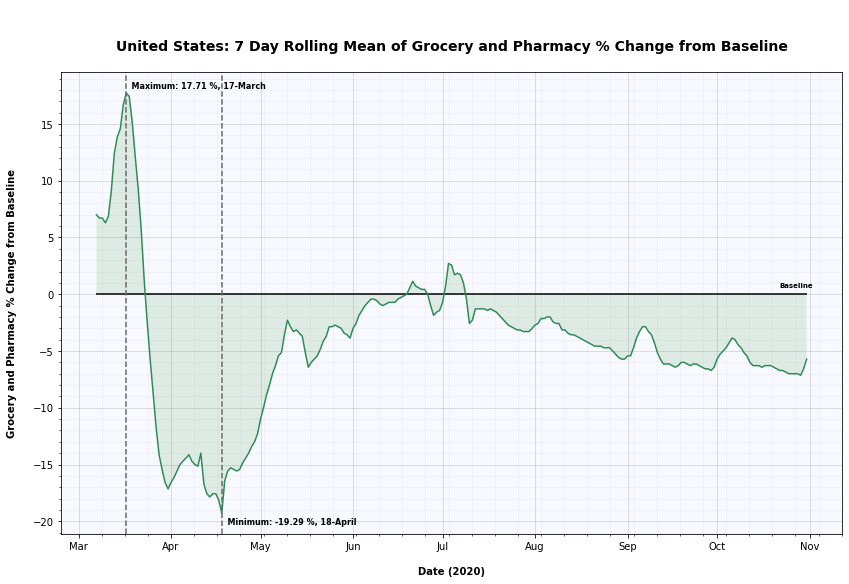

In [47]:
describe(US, grocery)
linePlot7DayRolling(US, grocery, True, True)

__Analysis__

The line plot above shows the 7 day rolling mean for grocery and pharmacy % change from the baseline for the United States. A spike can be seen at the start of March which peaked at 17.71% above the baseline in March 17. 

From the middle of march to the end of the month we can see a sharp decline which reached about 17% below the baseline at the begining of April. A global minimum of -19.29% can be seen on April 18. This is much higher than the actual minimum of -39% on April 12. Becuase this max value is an outlier that spanned for less than a week it is not seen when the rolling mean is used. The graph below shows a comparison of the daily values and rolling mean and the spike on April 12 of -29% is visible.

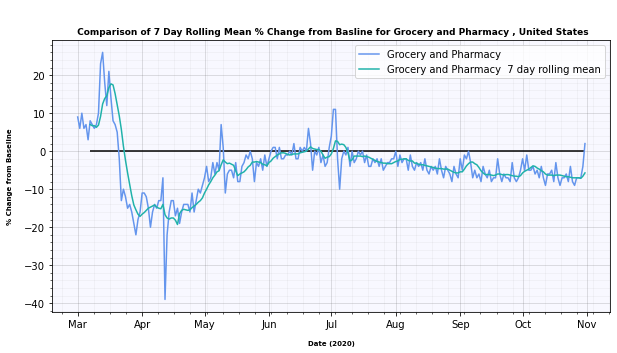

In [48]:
compareDailyAndRolling(US, grocery)

From the middle of April a steady increase can be seen, which peaked to slighly above the baseline at the end of June and beginning of July to about 1% and 3% respectively. From July a very gradual decreasing trend can be seen until the end of October, with small peaks and troughs visible. It reached approximately -6% by the end of October. 

__Summary Stats__

The mean was -4% with a standard deviation of 7%. The maximum was 26% on March 13. The minimum was on -39% on April 12.

### <font color='teal'>United States: Transit Stations</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Transit Stations % Change from Baseline</font>__

Summary Statistics: 
United States ;  Transit Stations  % Change from Baseline 

mean   -31.881633
std     11.811978
min    -56.000000
max      7.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-12
Date of Max:  2020-03-01 



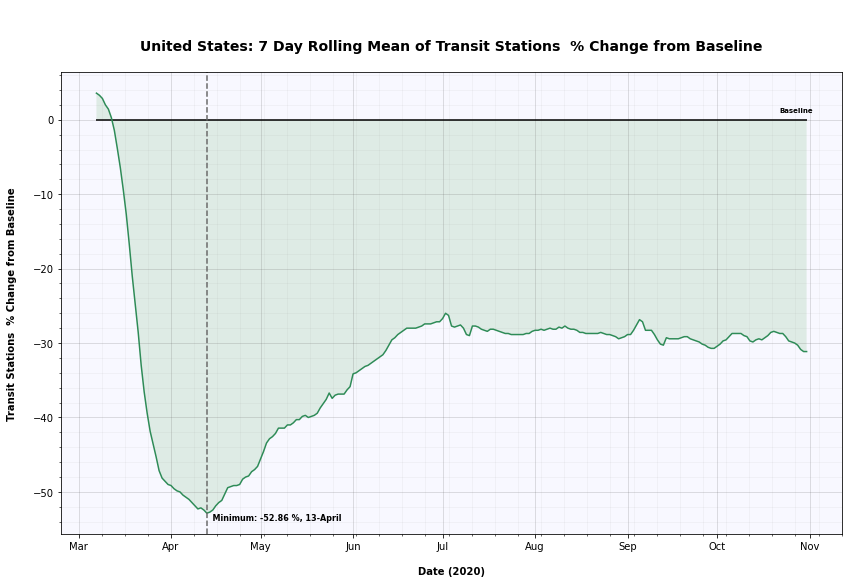

In [49]:
describe(US, transit)
linePlot7DayRolling(US, transit, True, False)

__Analysis__

The line plot above shows the 7 day rolling mean for transit stations % change from the baseline for the United States. A very sharp decline from about 4% above the baseline at the beginning of March to -52.86% on April 13 can be seen, which is just above the min of -56%. 

We can see a gradual increase from mid march until the beginning of July, where it reached about -30%. 

From July to the end of October it stayed at around -30% with small peaks and troughs. It is clear that the % was higher at this time than in the earlier months from March-April, however it was still significantly lower than the baseline.

__Summary Stats__

The mean was -31% with a standard deviation of 11%. The minimum value reached was -56% on April 12.

### <font color='teal'>United States: Workplaces</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Workplaces % Change from Baseline</font>__

Summary Statistics: 
United States ;  Workplaces  % Change from Baseline 

mean   -31.146939
std     13.932612
min    -72.000000
max      5.000000
Name: workplaces_percent_change_from_baseline, dtype: float64
Date of Min:  2020-05-25
Date of Max:  2020-03-07 



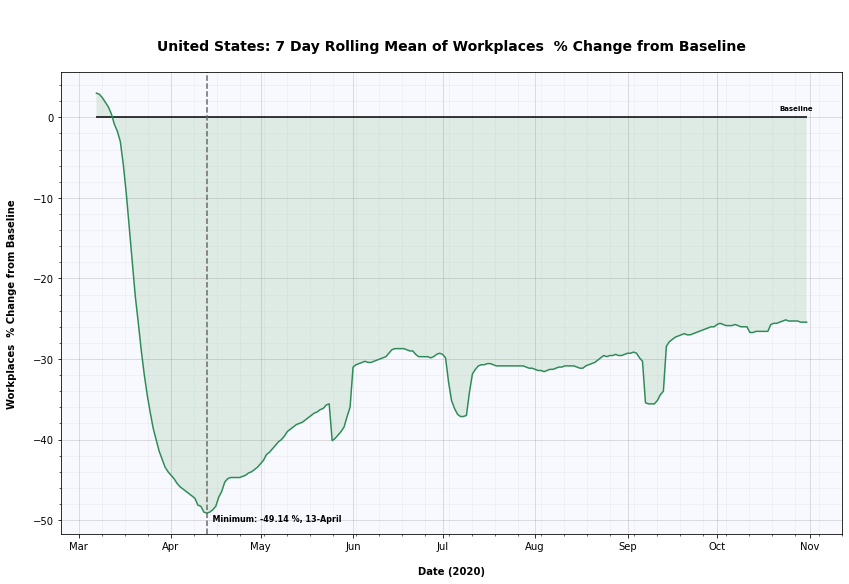

In [50]:
describe(US, workplace)
linePlot7DayRolling(US, workplace, True, False)

__Analysis__

The line plot above shows the 7 day rolling mean for workplaces % change from the baseline for the United States. A sharp decrease can once again be seen from the beginning of March where it was at about 3% to a minimum of -49.14% on April 13. This is much higher than the actual minimum value which was -72% on May 25. This must be a peak that spanned less than a week since the rolling mean decreases it so severely. To see this and anything else that the rolling mean might conceal I will plot a comparison of the actual daily values and the rolling mean.

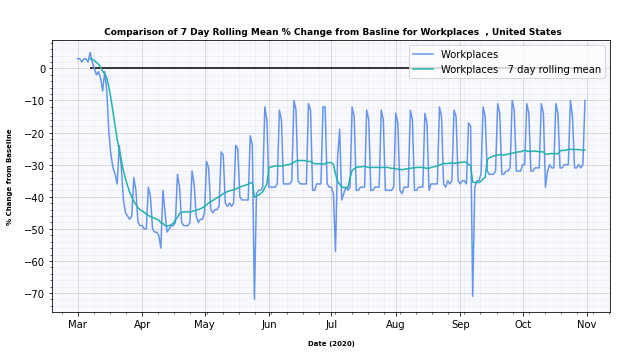

In [51]:
compareDailyAndRolling(US, workplace)

Here we can see very uniform peaks like we saw previously for some of the categrories for Ireland. We can see about 4 peaks every month, usually of between 10 and 30%. We can see that between April and May these peaks are less than 20%, and from June to the end of August they are typically between 20 and 30%.

We can also see a few outliers with large drops in May, July and September, reaching values as low as -70%. A possible cause of these outliers is national holidays or bank holidays when a large amount of people won't be working. If these days occur on a week day then the % change from the baseline is likely to be very low. 

We can see a peak occured in early July, and it is possible that this was the 4th of July, Independence Day in the United States. Labour Day is on September 7th, which could have possibly caused the spike in early September, and Memorial Day is the last Monday in May, which would have been a contributing factor to the peak at the end of May. We can check these dates as follows:

In [52]:
print(US[workplace].sort_values(ascending=True).head(3))

date
2020-05-25   -72.0
2020-09-07   -71.0
2020-07-03   -57.0
Name: workplaces_percent_change_from_baseline, dtype: float64


We can see that the drop in May occured on the 25th, which was the last Monday in May and so was Memorial Day. The drop in September occured on the 7th, which was Labour Day. The drop in July occured on the 3rd. In the US if the 4th of July is a Saturday then Independence Day is observed on Friday the 3rd. Thus we can assume that these drops were due to the national/federal holidays.


From mid April a gradual increase can be seen. There is a sharp drop at the end of May that falls from about -35% to -40%, before increasing again to -30% at the beginning of June. Another drop can be seen at the beginning of July which fell from -30% to over -35%, and then increased back to almost -30% by the middle of July. At the beginning of September a drop can also be seen, which fell from approx -30% to -35% before increasing again to -30% mid September followed by a gradual increase to -25% by the end of October. 


__Summary Stats__

The mean was -31% with a standard deviation of 5%. The maximum value reached was 5% on March 7th. The minimum was -72% on May 25th.

### <font color='teal'>United States: Residential</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Residential % Change from Baseline</font>__

Summary Statistics: 
United States ;  Residential % Change from Baseline 

mean     9.946939
std      5.688034
min     -1.000000
max     24.000000
Name: residential_percent_change_from_baseline, dtype: float64
Date of Min:  2020-03-01
Date of Max:  2020-04-10 



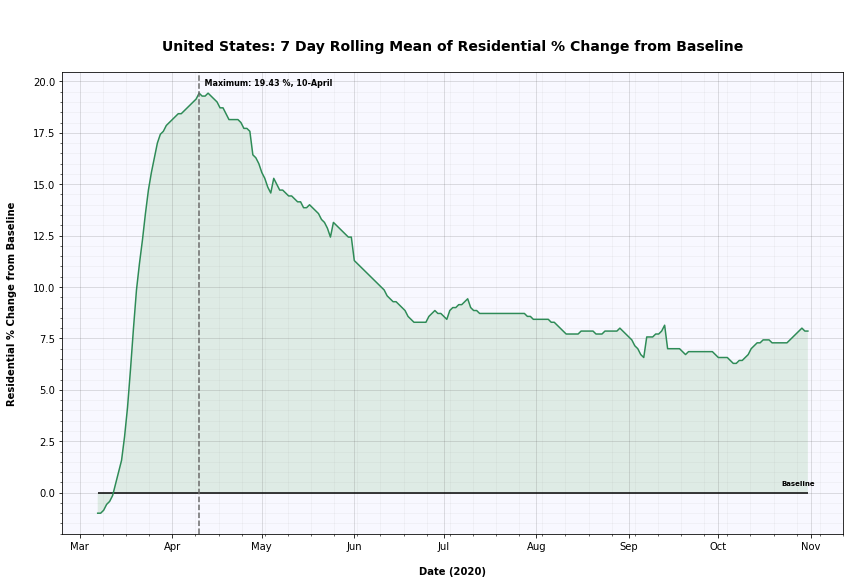

In [53]:
describe(US, residential)
linePlot7DayRolling(US, residential, False, True)

__Analysis__

The line plot above shows the 7 day rolling mean for resedential % change from the baseline for the United States. A steep increase can be seen at the beginning of March which reached 19.43% on April 10, which is just below the max of 24% on April 10th. From mid April to July a gradual decrease can be seen, which reached about 8.5% in July. From July to the end of October the figure stayed within about 6 and 9%. 

As with Workplaces above we can plot the rolling mean and the daily values and compare.

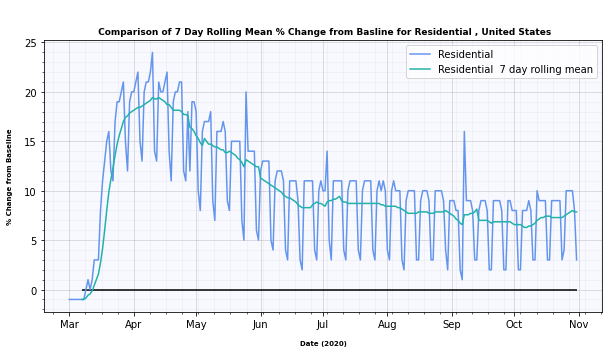

In [54]:
compareDailyAndRolling(US, residential)

We can see similar variation here as we saw with Workplaces. There are in this case large drops about 4 times a month. Interestingly, where we saw drops in Workplaces in June, July and September we can see peaks in Residential on these days, which would indicate that in these days where there are sudden drops in the amount of people going to work it is likely that these people are spending the day at home. As mentioned for Workplaces, it is possible that these days are the national/federal holidays Memorial, Labour and Independence Day. 

__Summary Stats__

The mean was 10% with a standard deviation of 6%. The minimum value reached was -1% on March 3rd. The max reached was 24% on April 10th.

### <font color='teal'> United States - Comparison of Categories</font>

Now that I have analysed the categories individually, I want to comapare how the various categories changed throughout the year for the United States. To get a general idea of how the different categories compared I decided to plot a matrix of lineplots of each pair of categories. This should give me a good indication of the pair of categories with interesting similarities/differences that I should explore in further detail. 

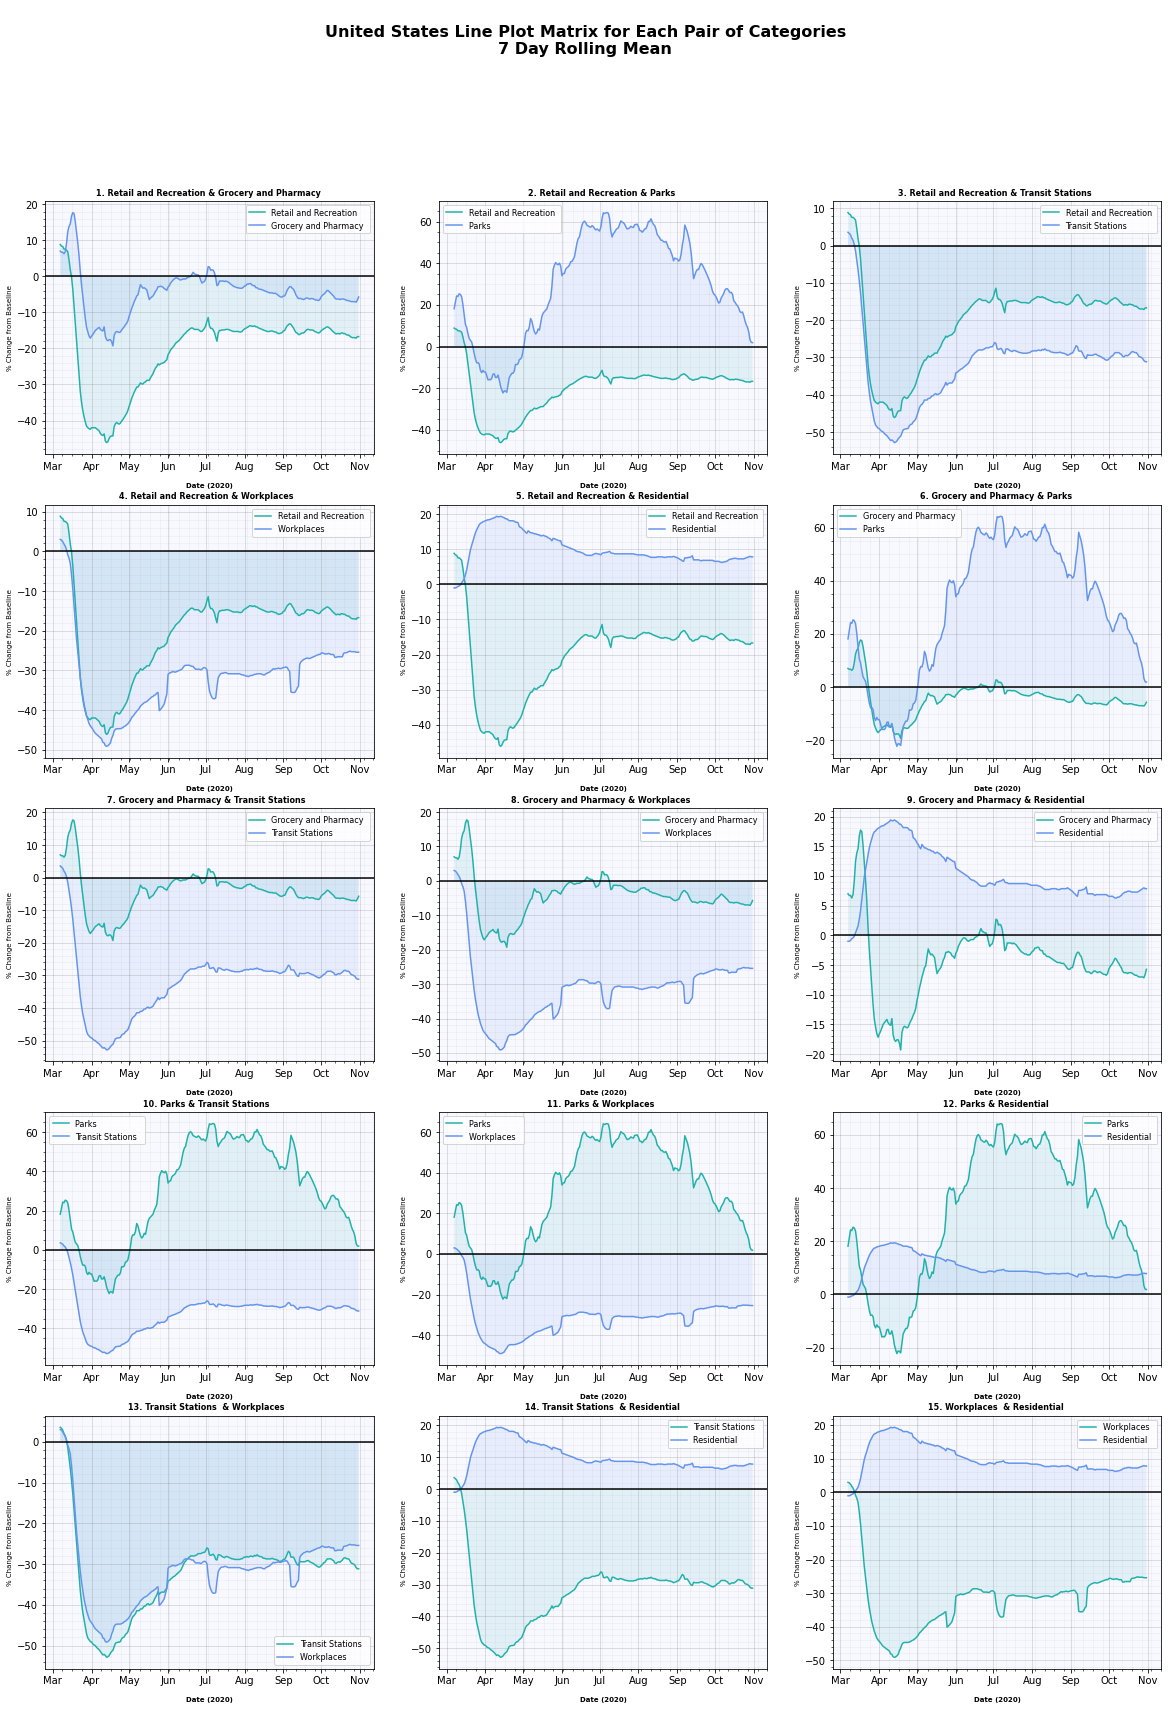

In [55]:
linePlotMatrix(US, 7)

The above graphs have given my a good general overview of categories which have interesting similarities and differences. Marked with a __bold__ below are the pairs of categories that I think have interesting similarities/difference that I would like to explore in further detail.

1. __Similar trends in Retail & Recreation and Grocery & Pharmacy__
2. Similar trends in Retail & Recreation  and Parks but a lot more spread  in Parks values
3. __Very similar trends in  Retail & Recreation & Transit Stations__
4. Similar trends in  Retail & Recreation & Workplaces
5. __Symmetry between Retail & Recreation and Residential__
6. Some similaririty between Grocery & Pharmacy and Parks trends, but with a lot more spread in Parks values
7. Similar trends between Grocery & Pharmacy and Transit Stations, but with much lower values for Transit Stations
8. Similar trends between Grocery & Pharmacy and Workplaces but a lot more spread in the values for Workplaces
9. Some symmetry between Grocery & Pharmacy and Residential
10. Some similarity in the trends for Transit Stations & Parks, much more spread in parks data
11. Some similarity in the trends for Workplaces & Parks, much more spread in parks data
12. __Some symmetry between Residential and Parks__
13. __Very similar trends and values for Transit Stations & Workplaces__
14. __Symmetry between Transit Stations & Residential with more spread in transit stations__
15. __Symmetry between Workplaces & Residential with more spread in workplaces__

### <font color='cadetblue'>United States: Workplaces & Transit Stations</font>

We can immediately see from the graphs above that there are very similar trends and values for the 7 day rolling mean for  Workplaces and Transit Stations, with the the lines almost overlapping (graph 13). To see this in more detail I will plot the lineplot of the two categories together once again but this time using the actual values as opposed to the rolling mean.

__Line Plot Workplaces & Transit Stations, United States__

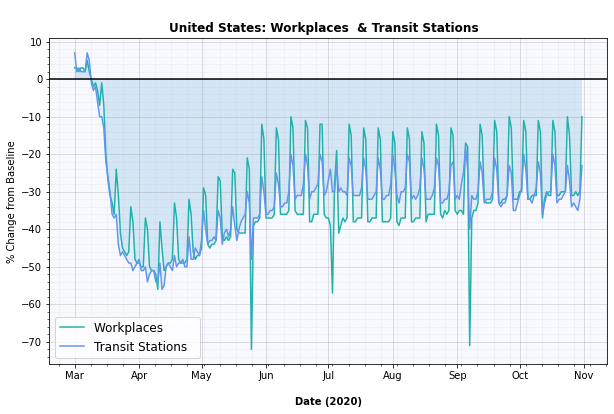

In [56]:
linePlotMultipleRolling(1, US, [workplace, transit], 0)

We can see from the graph above that there are very similar trends in Workplaces and Transit Stations throughout the year.

We noticed earlier the interesting shape in the uniform peaks for workplace, and we can see from the graph above that similar spikes can be seen for transit stations which line up quite closely to those of workplaces, although they are less major spikes of typically about 10%, in comparison to those of workplace which are typically about 30%. This means that on the occasions about 4 times a month when we can see a large increase in workplaces % that spans typically about 3 days, that there are smaller but noteworthy spikes in transit stations at this time. It is very likely that there is a relationship between these two variables, where possible one these occasions that significantly more people are going to work a large portion of these people are taking trains, which would cause an increase in transit stations %.

We can see 3 large drops in workplaces in May, July and September which as mentioned earlier might possibly be a consequence of the day being a national holiday. We can see small drops on these days in May and September for transit stations also.

__Scatter Plot Workplaces & Transit Stations, United States__

It is likely from the similarities between the trends in the graph above for workplaces and transit stations that there is a positive linear relationship between the two. To check this and to understand the strength of this linear relationship we can plot a scatter plot and calculate the correlation coefficient.

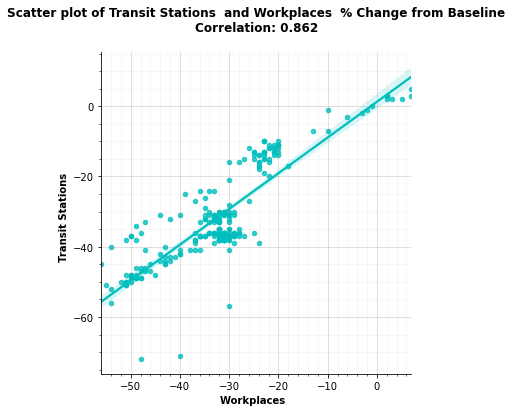

In [57]:
scatter(US, [transit, workplace])

It is immediately clear from the scatter plot that the linear relationship between the two variables, workplaces and transit stations, is strong and positive. We know that it is positive from the slope of the line of regression / best fit, and can see that the markers lie very close to the line, indicating a strong relationship. This is confirmed in the calculation of the correlation coefficient, 0.862. It is positive and close to 1 indicating a strong positive relationship.

__Histogram Workplaces & Transit Stations, United States__

We can see from the lineplot of workplaces and transit stations that there is more variation and spread in the values for workplaces, with regular spikes of about 30%, and occasional drops of up to 50%. The values for transit stations however have less spread, with variation of usually about 10%. To visualise this distribution we can plot a histogram. 

mean   -31.146939
std     13.932612
Name: workplaces_percent_change_from_baseline, dtype: float64
mean   -31.881633
std     11.811978
Name: transit_stations_percent_change_from_baseline, dtype: float64


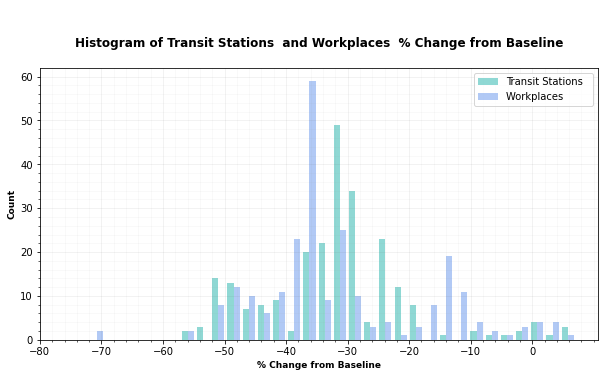

In [58]:
print(US[workplace].describe()[["mean", "std"]])
print(US[transit].describe()[["mean", "std"]])
histogram(US, [transit, workplace], [-80, 10, 10], 3)

We can see very clearly that the distribution is very similar for workplaces and transit stations, and are both approximately normal. We can see higher frequencies of the values between about -25 and -35% for transit stations, wherease the bars for workplaces are typically slightly lower for these values, with one tall peak visible at about -35%. We can also see an outlier for workplaces at -70%.

We can see this more clearly if we plot a distribution curve for each. 

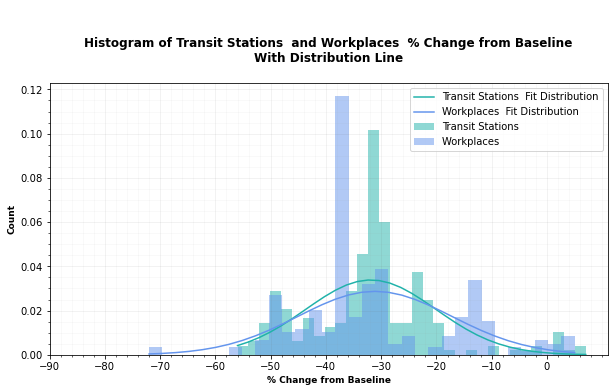

In [59]:
histogram(US, [transit, workplace], [-90, 10, 10], 2)

We can see from the distribution curves that the distributions are very similar and in line with each other meaning that the values for each are very similar, but the curve is slightly flatter for workplaces and it spreads slightly further due to the outliers.

### <font color='cadetblue'>United States: Workplaces & Residential</font>

The next two categories that we will compare for the United States are Workplaces and Residential. We saw from the rolling mean line plot matrix above that there was some symmetry visible between the trends for Workplaces and Residential. We will start by graphing a line plot of the values for these two categories. We will not use a rolling mean as we want to see the variation in the values.
    
__Line Plot Workplaces & Residential, United States__

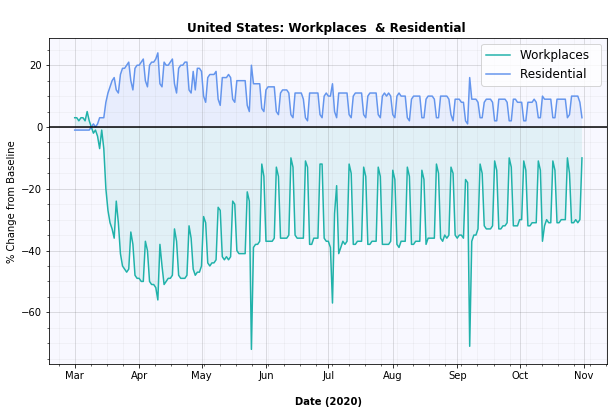

In [60]:
linePlotMultipleRolling(1, US, [workplace, residential], 0)

As we can see, there is symmetry between the overall trends. When there is an upward trend for residential there is a downward trend for workplaces, and vice versa. We commented earlier on the interesting variation in the values for workplaces, with very uniform peaks for 20-30% around 4 times a month. We can see small drops in residential that line up with these. We also noticed previously the large drops in workplaces at the end of May, start of July and start of September that line up with Memorial, Labour and Independence Day. We can see small spikes in residential on these days. This would make sense as if a large number of people have the day off of work they are likely to spend it at home, causing a spike in residential.

It is likely from the symmetry between the trends for workplace and residential that there is a negative linear relationship. We can check this with a scatter plot

__Scatter Plot Workplaces & Residential, United States__

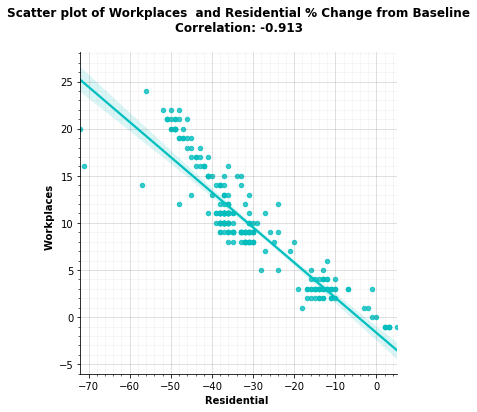

In [61]:
scatter(US, [workplace, residential])

We can immediately see that these two categories are strongly correlated. We know this by the distance of the markers from the regression line. They are all very close to the line indicating a very strong relationship. It is clear form the slop of the line that this relationship is negative. This is all confirmed in the correlation coefficient, -0.913, which is negative and very close to -1.

__Histogram Workplaces & Residential, United States__

We can see from the lineplot above that there is a lot more variation in the values for workplaces, and a larger range of values. We can look at the distribution of the values using a histogram.

mean   -31.146939
std     13.932612
Name: workplaces_percent_change_from_baseline, dtype: float64
mean    9.946939
std     5.688034
Name: residential_percent_change_from_baseline, dtype: float64


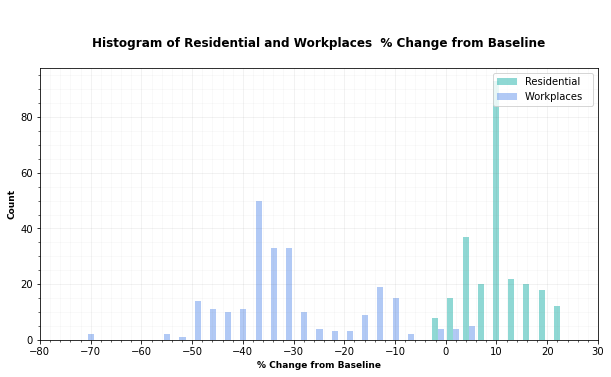

In [62]:
print(US[workplace].describe()[["mean", "std"]])
print(US[residential].describe()[["mean", "std"]])
histogram(US, [residential, workplace], [-80, 35, 10], 3)

We can see that as expected workplaces tends to take much lower values, with 95% of the values between -5 and -70 (100-100*(4+4+5)/245 = 95%). Residential takes values between -5 and 25. We can see that the values for residential are very concentrated around the mean of 9.9%, with a standard deviation of about 6%. Workplaces has a mean of -31% and standard deviation of about 14%. We can see a lot more spread in the values for workplaces. To visualise this better we can plot distribution curves:

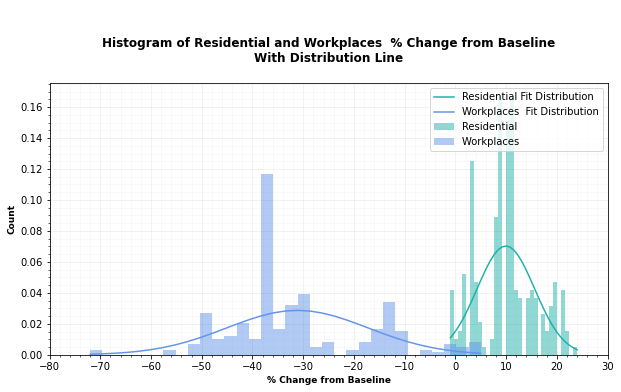

In [63]:
histogram(US, [residential, workplace], [-80, 35, 10],2)

We can see a much flatter curve for workplaces as there is a lot more spread in the values. We can see a taller peak with shorter tails for residential which implies less spread. This is in line with our expectation.

### <font color='cadetblue'>United States:  Retail & Recreation and  Grocery & Pharmacy</font>

Next we will compare Retail & Recreation and  Grocery & Pharmacy for the US. We will start by looking at the line plot.

__Line Plot  Retail & Recreation and  Grocery & Pharmacy, United States__

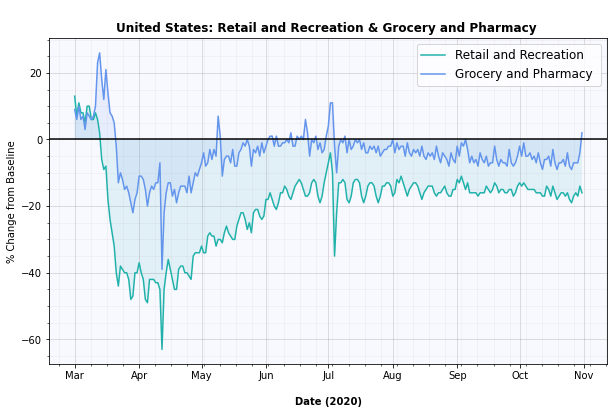

In [64]:
linePlotMultipleRolling(1, US, [retail, grocery], 0)

We can see from the graph above that there are very similar trends in Retail & Recreation and  Grocery & Pharmacy throughout the year.

We can see a spike in G&P (grocery and pharmacy) in March, and then a decline in G&P and R&R (retail and recreation) until mid April. We can see that the decline for R&R reaches much lower values. This is likely because G&P is essential, as food and medicine will always be essential even in a pandemic, wherease R&R are not. It is likely that a lot of R&R facilities closed at this time. We can see that from June to October G&P stayed very close to the baseline, wherease R&R was still almost 20% below the baseline.

We can see that when there is an upward trend in Retail & Recreation the same trend is visible in  Grocery & Pharmacy, and similarly for downward trends. This would indicate a strong positive correlation. We can check this with a scatter plot.

__Retail & Recreation and  Grocery & Pharmacy, United States__

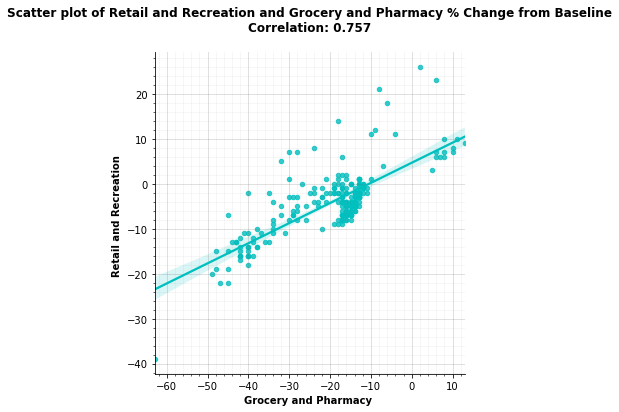

In [65]:
scatter(US, [retail, grocery])

As expected, there is a strong positive relationship. We can see this from the slope of the regression line and the distance from the markers to the line. This is confirmed in the correlation coefficient, 0.757.

### <font color='cadetblue'>United States: Parks & Residential</font>
    
Next we will compare Parks and Residential for the US. We will start by plotting a line plot. 
    
__Line Plot Parks & Residential, United States__

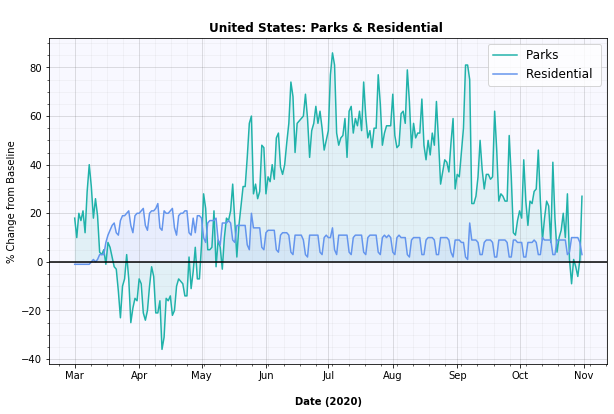

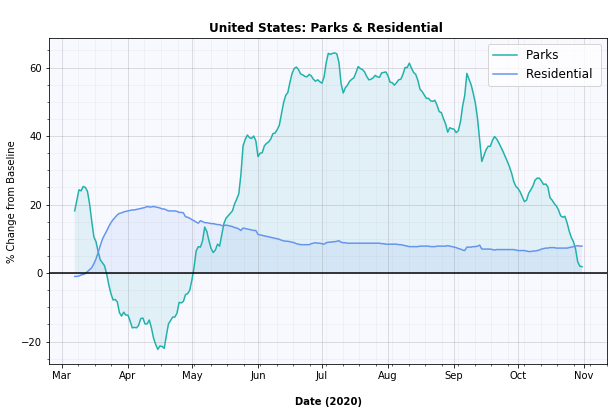

In [66]:
linePlotMultipleRolling(1, US, [parks, residential], 0)
linePlotMultipleRolling(7, US, [parks, residential], 0)

The first lineplot above is of the daily values for parks and for residential. We can see a lot of variation in both categories, with very uniform variation in residential and very random variation in parks. The second line plot shows the 7 day roling mean for these categories. From this it is easier to see the trends. We can see that there is some symmetry visible. When there is an increase in residential there seems to be a fall in parks, and when there is a fall in residential we see an increase in parks. However, we see a small fall in residential from mid April of about 10%, and at this time see an increase in parks of about 80%. So although they seem to fall and rise at the same times it is not at the same scale, we see much more dramartic changes for parks. The symmetry in the trends would indicate a possiblr negative correlation. We can check this with a scatter plot.

__Scatter Plot Parks & Residential, United States__

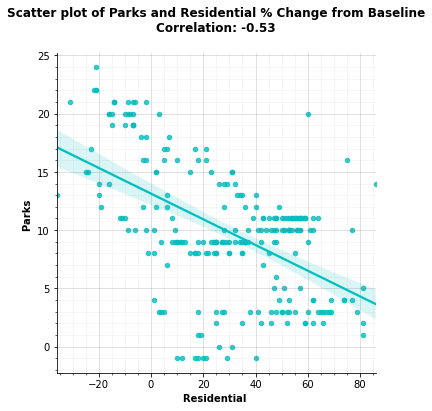

In [67]:
scatter(US, [parks, residential])

We can see that there is a negative correlation but it isn't particularly strong. The slope of the regression line tells us that it is negative and we can see from the distance from the markers to the line that it is not very strong. It does not seem as strong at the other categories which we compared. The correlation coefficient, -0.53, is closer to -1 than 0 so the correlation definitely isn't weak and we can see that it is negative.


We saw from the lineplot above that there was a lot more variation in the values for parks, and it took a much larger range of values. To compare the distributions we can plot a histogram.

__Histogram Parks & Residential, United States__

mean    28.902041
std     27.327825
Name: parks_percent_change_from_baseline, dtype: float64
mean    9.946939
std     5.688034
Name: residential_percent_change_from_baseline, dtype: float64


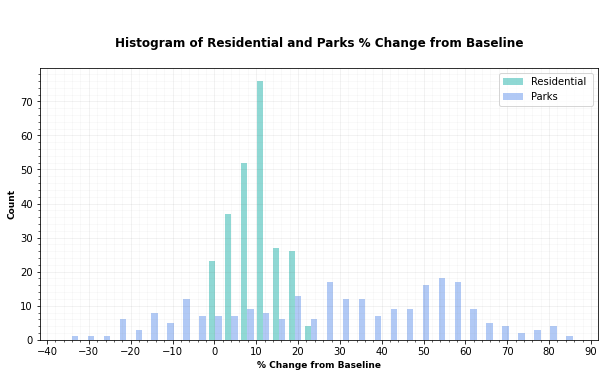

In [68]:
print(US[parks].describe()[["mean", "std"]])
print(US[residential].describe()[["mean", "std"]])
histogram(US, [residential, parks], [-40, 100, 10], 3)

We can see that the distribution for residential is bell shaped with very little spread in comparison to parks. The values range from -5% to 25%, and are very concentrated around the mean of 10%. For parks there is much more spresad, with values ranging from -35 to 85%. The mean is 28% and we can see a small peak at this point which makes up about 7% of the values. To get a better visual of the shapes of the distributions we can plot distribution curves.

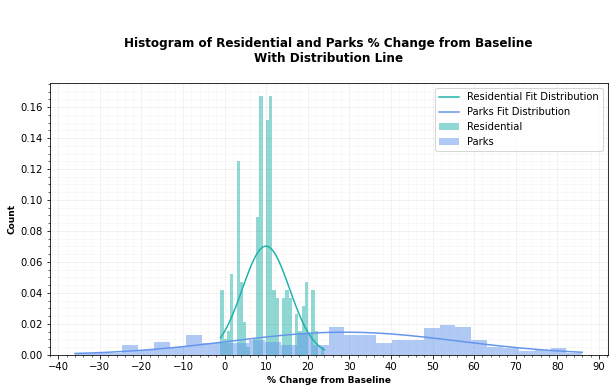

In [69]:
histogram(US, [residential, parks], [-40, 100, 10], 2)

We can see that the curve for residential is tall with very short tails, wherease the curve for parks is very flat with very long tails, indicating more spread in the values.






## <h3 align="center"> <font color='teal'> Summary: United States </font> </h3>

For the US I analysed each of the categories individually above, before looking at the similarities between the trends and distribtutions for grocery & pharmacy and retial & recreation, residential & workplaces, and transit stations and workplaces.

#### Summary:

__Retail & Recreation__
- Mean of - 20 %
- Standard deviation of 12 %
- 13% at beginning of March
- Steep drop to min of - 62% on April 12
- Gradual increase to about - 15% at the beginning of July
- Remained between -10 and -20% until the end of October

__Parks__
- Mean of 29%
- Standard deviation of 27%
- 25% at the beginning of March
- Drop to minimum of -36% on April 12th
- Upward trend from mid April
- Reached a max of 86% on July 3rd
- Downward trend from mid August reaching about 1% above the baseline by the end of October

__Grocery & Pharmacy__
- Mean of -5%
- Standard deviation of 7%
- Spike in March to max of 26% on March 12th
- Steep drop to minimum of -39% on April 13th
- Increase from mid April which reached the baseline at the end of June. 
- Reached about 3% above the baseline in July before gradually decreasing to about -6% by the end of October

__Transit Stations__
- Mean of -31%
- Standard deviation of 11%
- Max of 7% on March 1st
- Steep drop to minimum of -56% on April 12th
- Steady increase to about -27% in August
- Remained between -25 and -31% for the rest of the months

__Workplaces__
- Mean -31%
- Standard deviation 14%
- Max of 5% on March 7th
- Steep drop to -49% mid April
- Increase to about -35% in June
- Figure stayed between -30 and -40% until the end of October, with 3 steep drops for national holidays

__Residential__
- Mean of 10%
- Standard deviation of 6%
- Minimum of -1% on March 1st
- Steep increase to max of 24% on April 10th
- Decline to about 8.5% in July
- Figure stayed within 5 and 10% until the end of October

__Workplaces & Transit Stations__
- Very similar trends
- Strong positive correlation of 0.862
- Very similar distributions

__Workplaces & Residential__
- Symmetry in the trends
- Strong negative correlation of -0.913

__Retail & Recreation and Grocery & Pharmacy__
- Very similar trends
- Strong positive correlation of 0.757

__Parks & Residential__
- Some symmetry in the trends
- Negative correlation of -0.53

# <font color='teal'>Task 1: New Zealand</font>

Next I will focus on New Zealand. I will start by collecting and preparing my data.

### <font color='cadetblue'>New Zealand: Data Collection & Preperation</font>

In [70]:
NZ = prepareData("new_zealand.csv", "New Zealand")



 New Zealand  Mobility Dataset: 

Date Range:  2020-03-01  -  2020-10-31 

Number of missing Values per column:

id                                                    0
country                                               0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64 

Number of rows:  245 

Number of missing rows:  0 

Cleaned Data Frame: 


id      country  \
date                               
2020-03-01  1767703  New Zealand   
2020-03-02  1767704  New Zealand   
2020-03-03  1767705  New Zealand   
...             ...          ...   
2020-10-29  1767945  New Zealand   
2020-10-30  1767946  New Zealand   
2020-10-31  1767947  New Zealand   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-03-01                                                1.0    
2020-03-02                                               -4.0    
2020-03-03                                               -4.0    
...                                                       ...    
2020-10-29                                               -2.0    
2020-10-30                                                2.0    
2020-10-31                                                7.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-03-01                                                4.0   
2020-03-02                                               -1.0   
2020-03-03                                                0.0   
...                                                       ...   
2020-10-29                                               -4.0   
2020-10-30                                               -3.0   
2020-10-31                                                0.0   

            parks_percent_change_from_baseline  \
date                                             
2020-03-01                                -1.0   
2020-03-02                               -10.0   
2020-03-03                                -6.0   
...                                        ...   
2020-10-29                               -16.0   
2020-10-30                               -16.0   
2020-10-31                               -16.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-03-01                                            8.0   
2020-03-02                                           16.0   
2020-03-03                                            8.0   
...                                                   ...   
2020-10-29                                          -26.0   
2020-10-30                                          -26.0   
2020-10-31                                          -26.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-03-01                                      1.0   
2020-03-02                                     34.0   
2020-03-03                                     17.0   
...                                             ...   
2020-10-29                                      8.0   
2020-10-30                                      7.0   
2020-10-31                                      2.0   

            residential_percent_change_from_baseline  
date                                                  
2020-03-01                                       1.0  
2020-03-02                                      -2.0  
2020-03-03                                      -1.0  
...                                              ...  
2020-10-29                                       2.0  
2020-10-30                                       2.0  
2020-10-31                                       2.0  

[245 rows x 8 columns]

## <font color='teal'>New Zealand: Visualisation & Analysis</font>

Now that my data is prepared, cleaned and ready for use I will start by plotting and analysing lineplots for each of the categories for New Zealand. This will give a good visualisation of the trends, showing the peaks, troughs and maximum and minimum values reached.

### <font color='teal'>New Zealand: Retail & Recreation</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Retail & Recreation % Change from Baseline</font>__

Summary Statistics: 
New Zealand ;  Retail and Recreation % Change from Baseline 

mean   -24.563265
std     31.930654
min    -95.000000
max     11.000000
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-10
Date of Max:  2020-10-25 



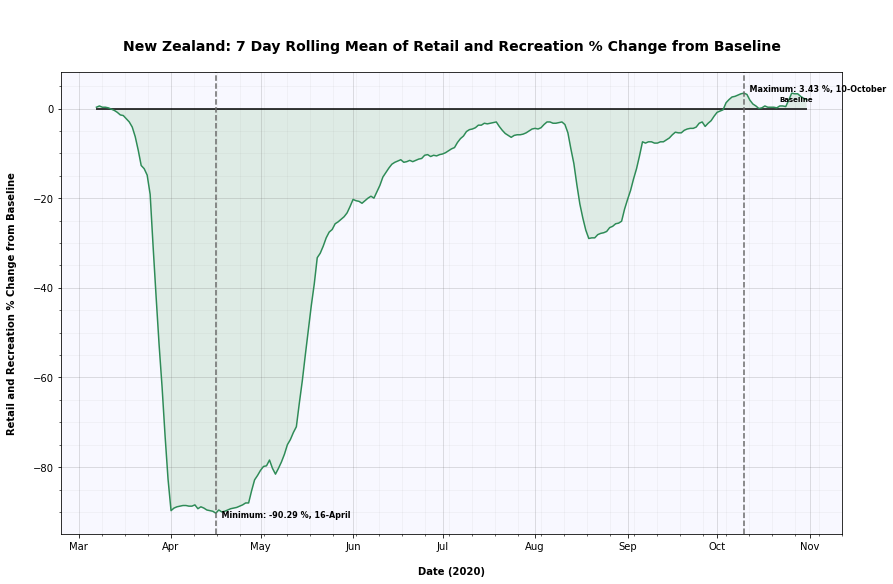

In [71]:
describe(NZ, retail)
linePlot7DayRolling(NZ, retail, True, True)

The line plot above shows the 7 day rolling mean for retail and recreation % change from the baseline. We can see that at the beginning of March it is at about 0%. Throughout the month of March we see a major drop to -90%. The figure stays at about -90% throughout April, and reaches a max of -90.29% on April 16. From the end of April to the beginning of June we can see a rapid increase which reaches -20% by June 1st. From here we can see a further gradual increase to just above the baseline, about -5%, throughout June and July. In mid August we can see a peak to about -30% which falls back to around -7% within less than a month. Throughout September we can see a very gradual increase which reaches the baseline at the begining of October. A global maximum of 3.43% above the baseline is reached on October 10. The  figure stays just above the baseline until the end of October.

In New Zealand a level 2 lockdown is implemented on March 21, which does not affect retail and recreational facilities. Two days later on March 23 a level 3 lockdown is announced which was intended to last a minimum of 4 weeks, in which all non-essential businesses such as retail stores, and recreational facilities such as cinemas, libraries, gyms, etc were forced to close, and two days later on March 25 a level 4 lockdown was announced.

We can see below that within 2 days of the level 2 lockdown being announced there was a drop of 26% for retail and recreation.

In [72]:
print("March 23 Retail & Recreation: ", NZ.loc[(datetime(2020, 3, 23))][retail])
print("March 25 Retail & Recreation: ", NZ.loc[(datetime(2020, 3, 25))][retail])

March 23 Retail & Recreation:  -12.0
March 25 Retail & Recreation:  -38.0


From March 21 to April 1st a drop of 75% to -87% can se seen:

In [73]:
print("April 1st Retail & Recreation: ", NZ.loc[(datetime(2020, 4, 1))][retail])

April 1st Retail & Recreation:  -87.0


We can see that the figure stays within about 80-90 % below the baseline for most of April. On April 28 New Zealand moved back into level 3 lockdown and any businesses who could operate without close perosnal contact with customers could reopen, for example retail shops in which staff could serve customers behind a glass screen. Recreational facilities such as gyms, cinemas, etc were still closed. On May 14 NZ moved into level 2 lockdown, in which retial and recreational facilities could all open again. We can see that during the level 3 lockdown there was an increase for retail and recreation of 33%.

In [74]:
print("April 28 Retail & Recreation: ", NZ.loc[(datetime(2020, 4, 28))][retail])
print("May 14 Retail & Recreation: ", NZ.loc[(datetime(2020, 5, 14))][retail])

April 28 Retail & Recreation:  -68.0
May 14 Retail & Recreation:  -35.0


On June 8th a level 1 lockdown was introduced. We can see that during the level 2 lockdown the figure dropped to -21%.

In [75]:
print("May 14 Retail & Recreation: ", NZ.loc[(datetime(2020, 5, 14))][retail])
print("April 28 Retail & Recreation: ", NZ.loc[(datetime(2020, 6, 8))][retail])

May 14 Retail & Recreation:  -35.0
April 28 Retail & Recreation:  -21.0


A spike can be seen again in August. At this time, the country moved back into level 2, but retail and recreation facilities could remain open. However, Auckland moved to level 3 so almost all retail and recreation facilities in Auckland were forced to close. At the end of August Auckland was moved back to level 2, and we can see an increase again for retail and recreation.

### <font color='teal'>New Zealand: Grocery & Pharmacy</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Grocery & Pharmacy % Change from Baseline</font>__

Summary Statistics: 
New Zealand ;  Grocery and Pharmacy % Change from Baseline 

mean   -12.028571
std     14.981792
min    -91.000000
max     29.000000
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-10
Date of Max:  2020-03-23 



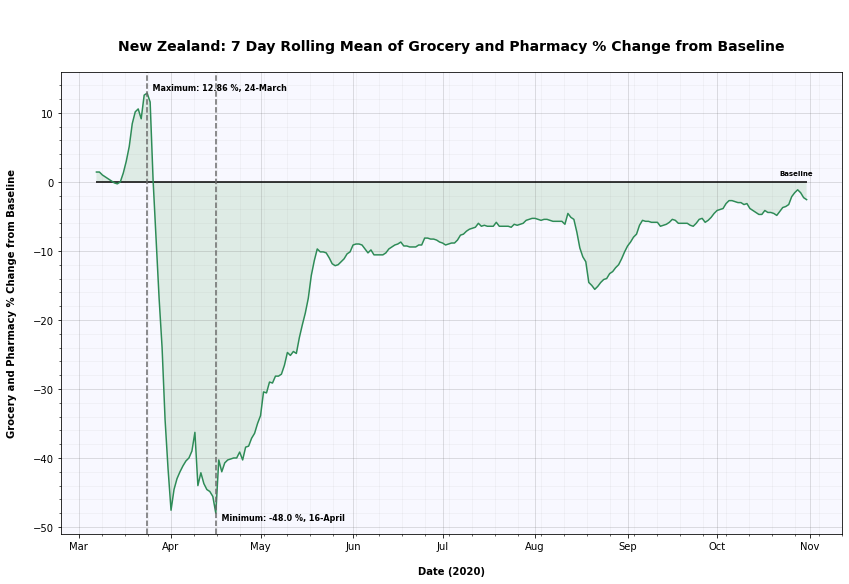

In [76]:
describe(NZ, grocery)
linePlot7DayRolling(NZ, grocery, True, True)

The line plot above shows the 7 day rolling mean for grocery & pharmacy % change from the baseline. At the beginning of March the figure is just above the baseline. We can see a spike to a global max of 12.86% on March 24. This is in line with the start of the level 3 lockdown, where supermarkets and pharmacies were allowed to stay open, but people were encouraged to isolate at home, so it is likely that many people decided to stock up on food and medicine to avoid having to leave their houses as frequently. From March 24th to the start of April we can see a sharp decline to just over -45%. We can see a slight increase from April 1st to about -35%, followed by a drop to a global min of -48% on April 16. From here we can see a gradual increase to -10% mid May. This increase is in line with the move from level 4 to level 3. From June to mid August we can see a very gradual  decrease to about -5% below the baseline. At this point New Zealand was in level 1 lockdown and grocery and pharmacy was almost at the baseline. We can see a drop again in August in line with the return to level 2, and the level 3 lockdown for Auckland. We can then see a drop again in September as the country came back into a level 2 lockdown, and the figure gradually dropped to -2% below the baseline by the end of October.

We can see that from mid March to mid May, for about 2 months, the % was significantly lower than the baseline, but for the other 6 months it was very close to the baseline, other than the slight drop duirng August. We can see that the level 3 and 4 lockdowns had a strong affect on grocery and pharmacy %, but during level 1 and 2 it was almost back to "normal" (ie almost at the baseline).

The mean was -12% with a std of 15%. The minimum was -91%, which is 43% lower the the rolling mean minimum. We can plot the rolling mean and daily values and compare:

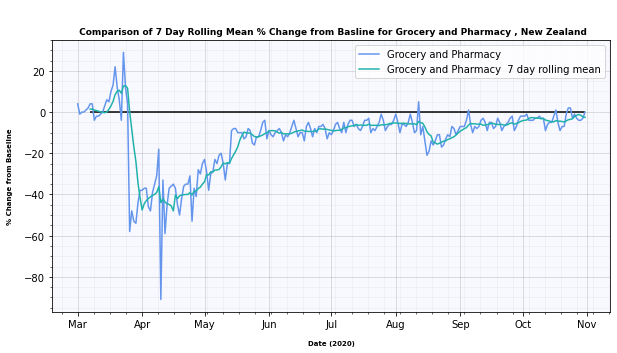

In [77]:
compareDailyAndRolling(NZ, grocery)

We can see a major drop in April. We can check the date of this drop:

In [78]:
print(NZ["2020-4"][grocery].sort_values(ascending=True).head(1))

date
2020-04-10   -91.0
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64


The drop occured on April 10th which was Good Friday. All supermarkets closed on this day, which is a likely cause of this drop.

### <font color='teal'>New Zealand: Transit Stations</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Transit Stations % Change from Baseline</font>__

Summary Statistics: 
New Zealand ;  Transit Stations  % Change from Baseline 

mean   -41.081633
std     23.702594
min    -89.000000
max     16.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-10
Date of Max:  2020-03-02 



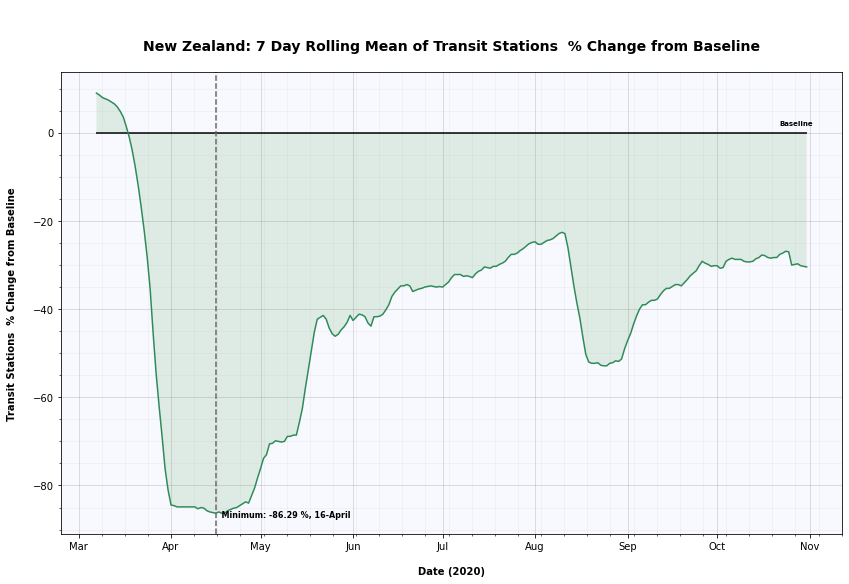

In [79]:
describe(NZ, transit)
linePlot7DayRolling(NZ, transit, True, False)

The line plot above shows the 7 day rolling mean for transit stations % change from the baseline. We can see that at the beginning of March the figure is about 10% above the baseline. Throughout the month of March we can see a steady drop to about -85%. This drop is expected as level 3 lockdown was introduced and people were encouraged to isolate at home, most businesses had to close or work from home, and schools had to close. This would greatly reduce the use of transit stations, as only essential workers should be travelling.

Throughout April the figure stayed between -80 and -90%, reaching a global max of -86% on April 16. From April to mid May we can see a drop to almost -40%, and from June to August a drop to almost -20%. An increase is visible again during the August lockdown to over -50%, which gradually dropped again to -30% by the end of October. 

Although life had almost returned to normal and the country was in level 1 lockdown from June to August the transit station % was still over 20% below the baseline, so its clear that people were not travelling as much. One would expect the % to be even higher than the baseline in these months, as the baseline in January is when students are on break, but during June - August they would be back in school and college, so you would excpect more travel and an increase in people visiting transit stations. It seems however that despite the country being in level 1 lockdwon many universities, such as the University of Auckland, decided to continue with remote learning. This would cause a drop in the number of people visiting transit stations in comparison to pre-covid times.

The mean value for transit stations % change from the baseline was -41% with a standard deviation of 24%. The maximum value was -89% on April 10th, which is just below the rolling mean max.

### <font color='teal'>New Zealand: Parks</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Parks % Change from Baseline</font>__

Summary Statistics: 
New Zealand ;  Parks % Change from Baseline 

mean   -32.506122
std     23.230248
min    -81.000000
max     29.000000
Name: parks_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-17
Date of Max:  2020-10-26 



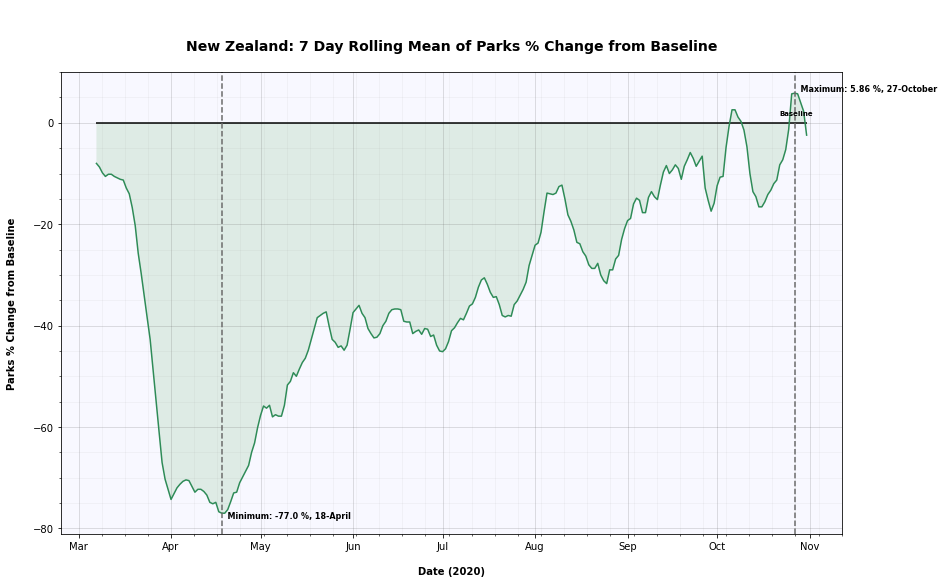

In [80]:
describe(NZ, parks)
linePlot7DayRolling(NZ, parks, True, True)

The line plot above shows the 7 day rolling mean for parks % change from the baseline. We can see that at the beginning of March the figure is about -8% below the baseline. A sharp drop to -75% is visible from March to the beginning of April, which is in line with the introduction of the level 3 lockdown. The figure reached a max of -77% on April 18, before a gradual decrease which is in line with the return to level 2. 

We can see a decreasing trend with many small peaks and troughs which reached about -40% by mid May. It stayed between -30 and just over -40% from mid May to mid July. Although the country was in a level 1 lockdown we would expect the % to be lower than the baseline during these months. The baseline in January is the hottest month of the year in NZ, and then months of May - July are much colder. Thus we would expect a lot less people visiting parks in these months.

We can see a drop almost -10% in August foloowed by an increase to -30% during the August lockdown. From here we can see a decrease which reached the baseline in October. A spike to almost -20% can be see mid October, followed by an increase to a global max of 8.56% on October 27th. We would expect values around the baseline at this time due to the good weather, in comparison to the previous few months.

The mean % for parks was -32% with a STD of 23%. The minimum was -81% on April 27, which is just below the rolling mean minimum. The max was 29% on October 26. The is significantly higher than the rolling mean max which would suggest that it was a peak that spanned less than a week. We can plot the rolling mean and actual daily values on a lineplot to see this:

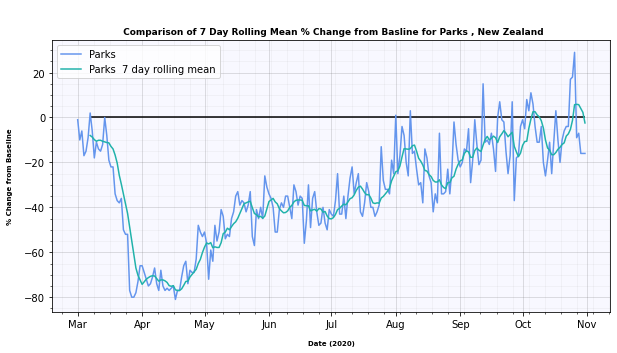

In [81]:
compareDailyAndRolling(NZ, parks)

We can see a sharp spike at the end of October which is greatly decreased by the rolling mean. A possible cause of this spike is a few days of very good weather in which a large number of people in New Zealand visited parks.

### <font color='teal'>New Zealand: Workplaces</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Workplaces % Change from Baseline</font>__

Summary Statistics: 
New Zealand ;  Workplaces  % Change from Baseline 

mean   -14.934694
std     26.051412
min    -88.000000
max     34.000000
Name: workplaces_percent_change_from_baseline, dtype: float64
Date of Min:  2020-04-10
Date of Max:  2020-03-02 



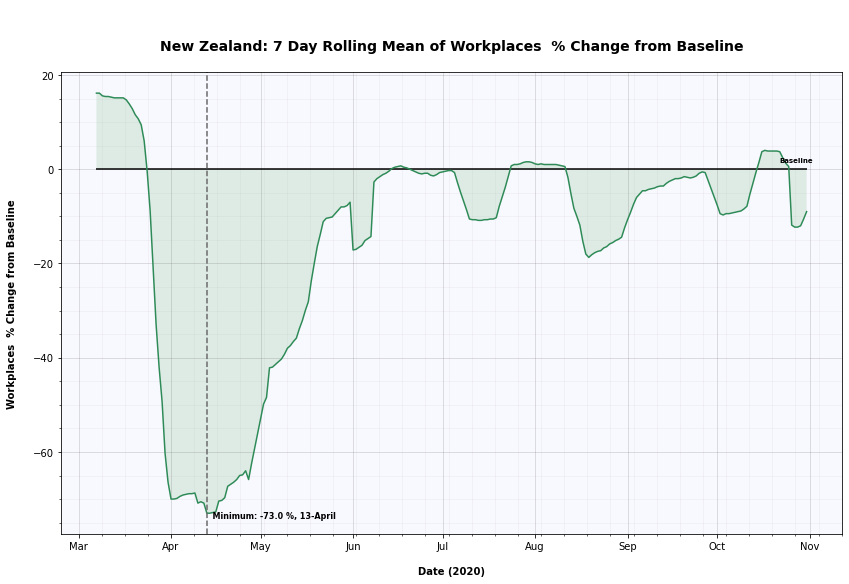

In [82]:
describe(NZ, workplace)
linePlot7DayRolling(NZ, workplace, True, False)

The line plot above shows the 7 day rolling mean for workplaces % change from the baseline. We can see that at the beginning of March the figure is just over 15% above the baseline. From mid March we can see a sharp decline to about -70% on April 1st. This is in line with the implementation of the level 3 lockdown in which all non-essential businesses were forced to close or work from home. We can see that a global minimum was reached on Apil 13th of -73%. From here we can see an incline to the beginning of June at which point the figure was about -7%. We can see a small spike to about -17% followed by a drop to 0% mid June. The figure stayed within a few percent of the baseline with a drop to about -10% in July, a drop to almost -20% in August during the August lockdown, and a drop tp -10% again in October. In mid October we can the workplace % was almost 5% above the baseline, the highest figure reached since March. This is followed by a slight drop to about -12% at the end of October.

The mean was -15% with a standard deviation of 26%. The minimum was -88% on April 10. This is 15% lower than the rolling mean minimum. We can compare the rolling mean and daily values as follows:

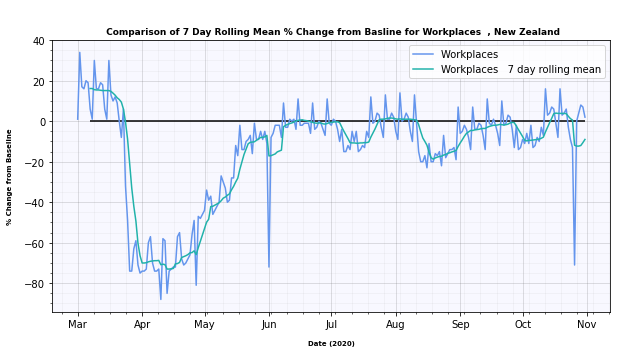

In [83]:
compareDailyAndRolling(NZ, workplace)

We can see that the rolling mean conceals two major drops. There is a drop in early June to around -70% which is shown as about -18% by the rolling mean, and a drop to about -70% in October which the rolling mean shows as about -12%. June 1st is the Queen's birthday and is a day in which the people of New Zealand typically do not work which would explain the drop in early June. October 26th is Labour Day, whcih might explain the drop in late October.

We can check that these drops occured on these days:

In [84]:
print(NZ["2020-6"][workplace].sort_values(ascending=True).head(1))
print(NZ["2020-10"][workplace].sort_values(ascending=True).head(1))

date
2020-06-01   -72.0
Name: workplaces_percent_change_from_baseline, dtype: float64
date
2020-10-26   -71.0
Name: workplaces_percent_change_from_baseline, dtype: float64


We can confirm that the drops in % were on June 1st and October 26th, the Queen's birthday and Labour Day, and it is probable that these national holidays were the reason for the drop in workplace %.

### <font color='teal'>New Zealand: Residential</font>
__<font color='cadetblue'>Lineplot of 7 Day Rolling Mean of Residential % Change from Baseline</font>__

Summary Statistics: 
New Zealand ;  Residential % Change from Baseline 

mean     9.787755
std      9.902178
min     -2.000000
max     42.000000
Name: residential_percent_change_from_baseline, dtype: float64
Date of Min:  2020-03-02
Date of Max:  2020-04-10 



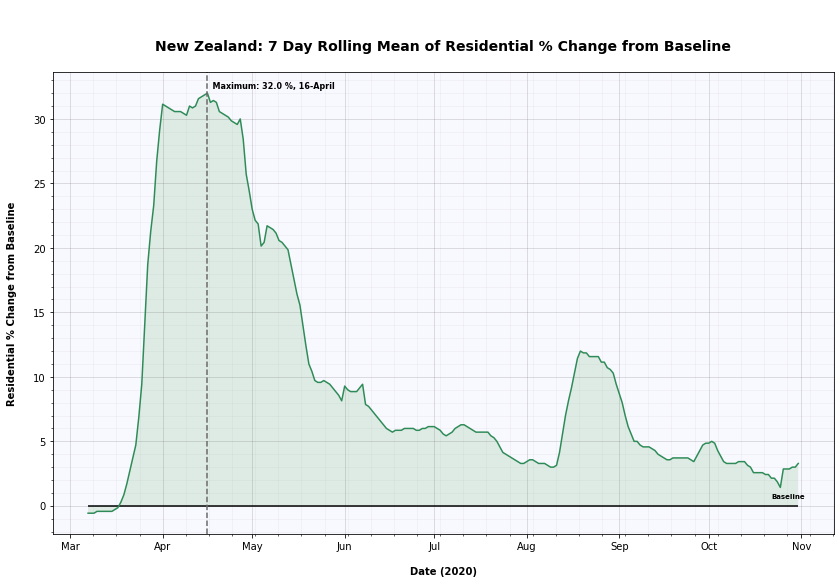

In [85]:
describe(NZ, residential)
linePlot7DayRolling(NZ, residential, False, True)

The graph above shows the Residential 7 day rolling mean % change from the baseline for New Zealand. At the beginning of March the figure was just below the baseline. In the middle of March we can see a steep increase until the bgeinning of March where it reaches about 31%. It reaches a max of 32% on April 16. From here we can see a gradual downward trend which reaches about 8* by the beginning of June. The figure continued to drop gradually and reached 3% by the beginning of August. we can see a spile to 12% during the August lockdown, after which the figure returned to around 8%. At the end of October it was at 3%.

The mean was 10% with a standard deviation of 10%. The maximum was 42% on April 10th, which is 10% higher than the rolling mean maximum.

### <font color='teal'> New Zealand - Comparison of Categories</font>

Next I was interested in comparing how the different categories changed throughout the year for New Zealand. To get a general idea of how the different categories compared I decided to once again plot a matrix of lineplots of each pair of categories. This should give me a good indication of the pairs of categories that I should explore in further detail. 

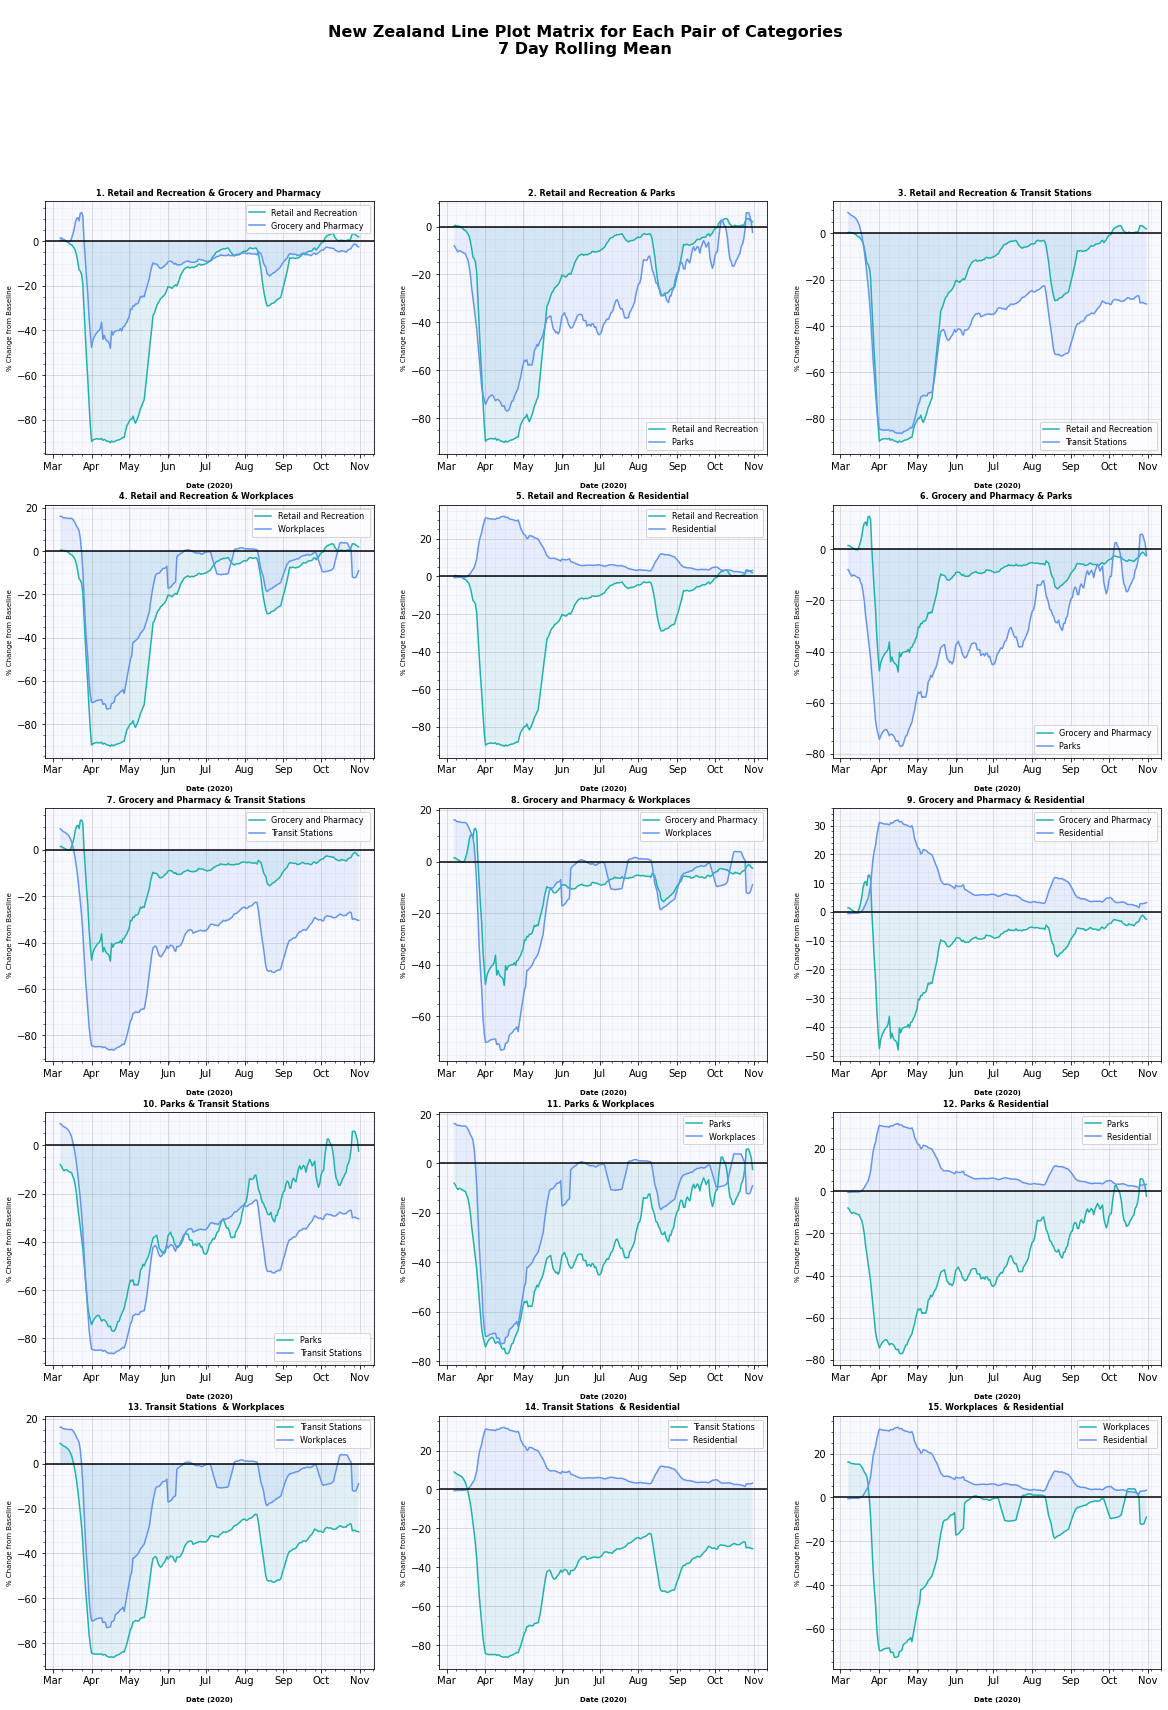

In [86]:
linePlotMatrix(NZ, 7)

The above graphs have given my a good general overview of categories which have interesting similarities and differences for New Zealand. Marked in __bold__ below are the pairs of categories that I think have interesting similarities/difference that I would like to explore in further detail.

1. __Similar trends in Retail & Recreation and Grocery & Pharmacy__
2. Similar trends in Retail & Recreation  and Parks
3. Similar trends in  Retail & Recreation & Transit Stations
4. Similar trends in  Retail & Recreation & Workplaces
5. Symmetry between Retail & Recreation and Residential
6. Similar trends in Grocery & Pharmacy and Parks
7. Similar trends between Grocery & Pharmacy and Transit Stations
8. Similar trends between Grocery & Pharmacy and Workplaces
9. Symmetry between Grocery & Pharmacy and Residential
10. Similar trends in Transit Stations & Parks
11. Similar trends in Workplaces & Parks
12. __Symmetry in Residential and Parks__
13. __Similar trends for Transit Stations & Workplaces__
14. Symmetry between Transit Stations & Residential
15. __Symmetry between Workplaces & Residential__

### <font color='cadetblue'>New Zealand: Retail & Recreation and Grocery & Pharmacy</font>

From the rolling mean lineplot matrix above we can see similar trends in Retail & Recreation and Grocery & Pharmacy. We will start by looking at the lineplot for the daily values for the two categories.

__Line Plot Retail & Recreation and Grocery & Pharmacy, New Zealand__

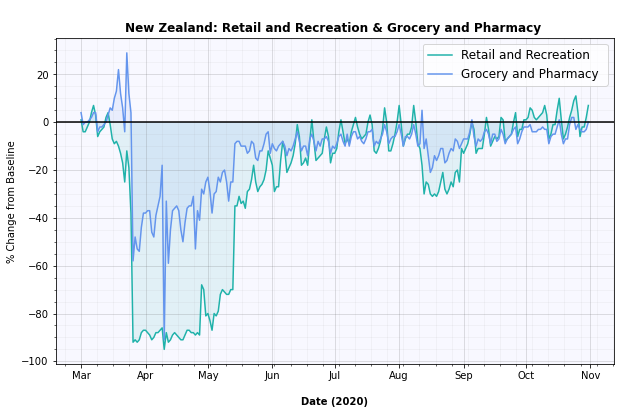

In [87]:
linePlotMultipleRolling(1, NZ, [retail, grocery], 0)

We can see from the graph above that there are very similar trends for Retail & Recreation and Grocery & Pharmacy. We can see a spike in March for Grocery & Pharmacy which did not occur for Retail & Recreation. It is possible that during this spike people were stocking up on food and medicine. We can then see a drop in both  Grocery & Pharmacy and Retail & Recreation. There is a much larger drop in Retail & Recreation. Most reatil and recreation facilities were forced to close during the level 3 and 4 lockdowns in March/April, which caused the large drops. Grocers & Pharmacies remained open, however we can still see a drop. We can see a large drop in  Grocery & Pharmacy on April 10th when all grocers closed for Good Friday. We can see a drop in both Retail & Recreation and Grocery & Pharmacy from May, which overlap just above the baseline from June to August. We can see a drop in both during the August lockdown, with slightly lower values for Retail & Recreation than Grocery & Pharmacy. Both return to within 10% of the baseline from September to the end of October.

It is likely from the similarity in the trends that there is a positive linear relationship between Retail & Recreation and Grocery & Pharmacy. We can check this by plotting a scatter plot.

__Line Plot Retail & Recreation and Grocery & Pharmacy, New Zealand__

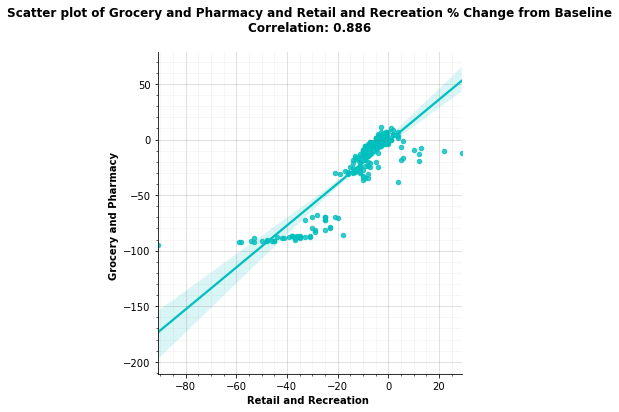

In [88]:
scatter(NZ,[grocery, retail])

We can see from the slope of the regression line that there is a positive linear relationship, and from the distance of the markers from the line that the relationship is strong. This is confirmed in the calculation of the correlation coefficient which is 0.886. This is positive and close to 1 indicating a strong positive linear relationship.

__Histogram Retail & Recreation and Grocery & Pharmacy, New Zealand__

Next we can look at the distribution of the values for Retail & Recreation and Grocery & Pharmacy by plotting a histogram. We can see that the values for Grocery & Pharmacy are all in a much smaller range, between about 25 and -60%, other than the outlier at -91. The values for Retail & Recreation are within a larger range, between about 10 and -95%, so we would expect a flatter curve with longer tails.

mean   -24.563265
std     31.930654
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64
mean   -12.028571
std     14.981792
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64
-8.0


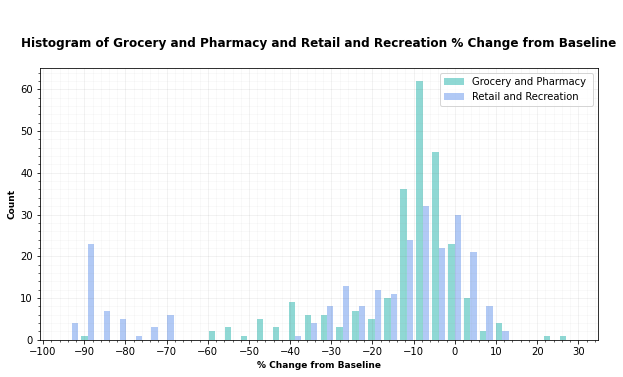

In [89]:
print(NZ[retail].describe()[["mean", "std"]])
print(NZ[grocery].describe()[["mean", "std"]])
print(NZ[grocery].median())
histogram(NZ, [grocery, retail], [-100, 40, 10], 3)

We can see a bell shaped curve for G&P that is very concentrated around the mean and median values of -12 and -8%. An outlier is visible at around -90%. For R&R we can see a that a larger number of the values fall between -20 and -10%, similar to G&P, but a significant amount of the values also fall between -95% and -70%. There is a lot more spread so we would expect a much flatter distribution curve. We can plot a curve to see this:

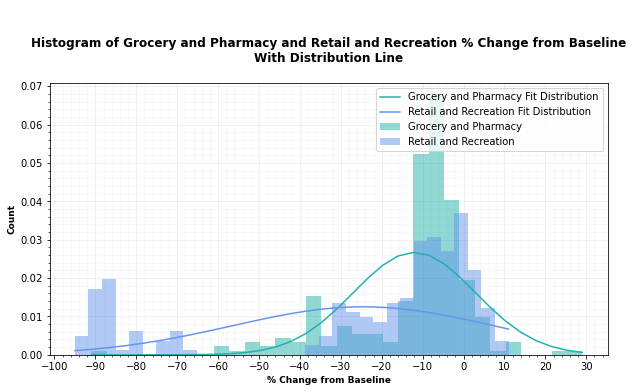

In [90]:
histogram(NZ, [grocery, retail], [-100, 40, 10], 2)

There is a taller peak for G&P, and a much flatter curve with further spread for R&R. 

We saw for G&P and R&R that there were similar trends for both, however the drops for R&R were for the most part a lot more extreme than for G&P, for example, in April G&P dropped to about -50% while R&R dropped to about -90%. The large drops in R&R are in line with the level 3 and 4 lockdowns, in which most retial and recrreational facilities were forced to close. Grocers and pharmacies remain open but we can still see a significant drop. This is likely due to people going to the supermarket and pharmacy less frequently than before the Covid 19 pandemic, for example once a week instead of every day, to avoid leaving the house as much as possible during the level 3 and 4 lockdowns. We can see that both G&P and R&R returned to close to the baseline in July-August, September-November.

### <font color='cadetblue'>New Zealand: Workplaces & Transit Stations</font>

The next two categories which I will compare are transit stations and workplaces. We will start by comparing the lineplots.

__Line Plot Workplaces & Transit Stations, NZ__

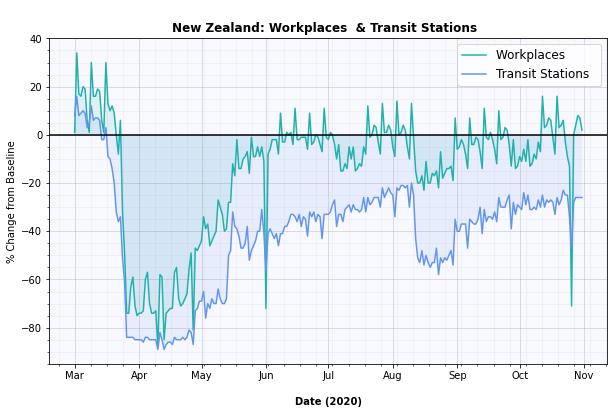

In [91]:
linePlotMultipleRolling(1, NZ, [workplace, transit], 0)

We can see from the above lineplot above that there are very similar trends for Workplaces & Transit Stations. Both were above the baseline in March, and dropped to around -70 and -90% respectively in Arpil. We can see an increase in Workplaces from the end of April, in line with the move from level 4 to level 3 lockdown, and an increase in Transit Statiomns in May in line with the move to level 2. From june to August workplaces stayed within about 10 and -15%, while transit stations stayed within -20 and -45. Both dropped again during the August lockdown, and then returned to between 10 and -15 for workplaces and -20 and -45 for transit stations from September to November. We can see large drops in workplaces of about 70% and small drops in transit stations of about 10-15% during the national holidays on June 1st and October 26th.




For workplaces and transit stations we saw a drop in both in March and April, followed by an increase from May. The increase for workplaces was significantly higher, increasing by about 50/60% in compariosn to transit stations which was about 40%. A reason for this could possibly be that although a large number of people were returning to work, perhaps people who usually travelled a long distance to work by train were continuing to work from home. This would limit people from very different areas mixing in work and is  possibly somthing that some businesses implemented. Furhtermore, perhaps people who usually got the train to work were now driving to avoid using public transport and being in close proximity to people on their commute.


From the similarity of these trends I would expect a very strong positive linear relationship between Workplaces & Transit Stations. We can check this with a scatter plot:

__Scatter Plot Workplaces & Transit Stations, New Zealand__

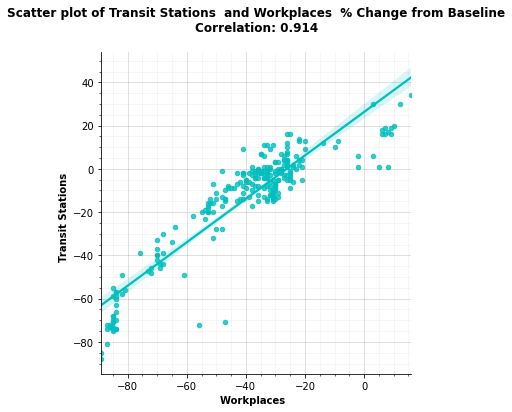

In [92]:
scatter(NZ, [transit, workplace])

As predicted, there is a strong positive linear relationship between Workplaces & Transit Stations. We can see that the markers a very close to the line of regression, indicating a strong relationship, and we know from the slope of the line that it is positive. This is confirmed by the correlation coefficient, 0.914, which is positive and very close to 1, indication a strong positive correlation.

mean   -14.934694
std     26.051412
Name: workplaces_percent_change_from_baseline, dtype: float64
mean   -41.081633
std     23.702594
Name: transit_stations_percent_change_from_baseline, dtype: float64
-7.0
-35.0


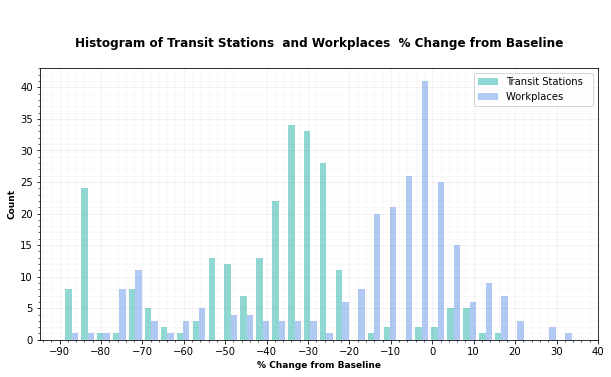

In [93]:
print(NZ[workplace].describe()[["mean", "std"]])
print(NZ[transit].describe()[["mean", "std"]])
print(NZ[workplace].median())
print(NZ[transit].median())
histogram(NZ, [transit, workplace], [-90, 50, 10], 3)

We can see a bell shaped curve for workplaces between about 35 and -40%. We can then see small peaks again between -70 and -80%. The data ranges from just below -90% to 35%. We can see tall peaks for transit stations between -60 and -20%, which are highly concentrated around the mean and median of -41 and -35%. We can then see tall peaks again between -90 and -80%. The data ranges from -90 to 20%. The data spread is similar in both transit stations and workplaces, but with workplaces taking typically higher values. So we would expect the distribution curves to be very similar and quite flat due to the large amount of spread, and we would expect the centre of the curvw for workplaces to sit further to the right arounf the mean, -14%, and would expect the centre for the curve for transit stations to sit around its mean of -41%. We can plot the distribution curves as follows:

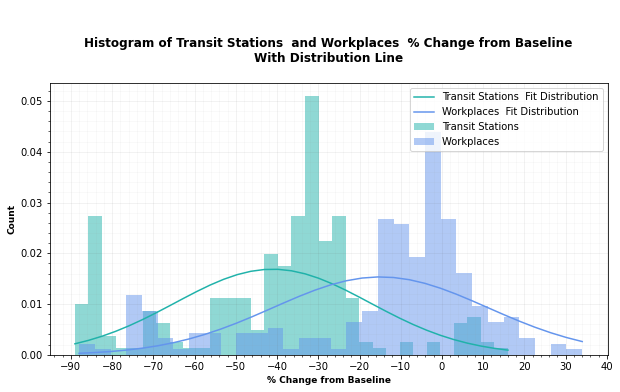

In [94]:
histogram(NZ, [transit, workplace], [-90, 50, 10], 2)

As expected the curves are very similar with the curve for workplaces shifted to the right, with its centre on about -14%, and the centre for transit stations on about 41%. 

### <font color='cadetblue'>New Zealand: Parks & Residential</font>

Next we will compare Parks and Residential.

__Line Plot Parks & Residential, New Zealand__

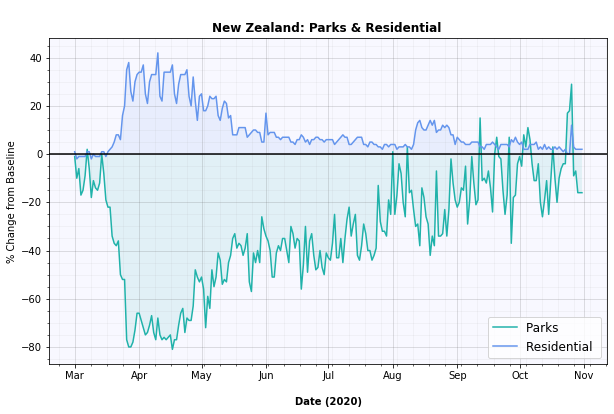

In [95]:
linePlotMultipleRolling(1, NZ, [parks, residential], 0)

From the lineplot below we can symmetry between parks & residential. From mid March there is a drop in Parks and an increase in residential. We can see a much larger drop in parks than the increase in residential, with a drop of almost 80% in parks and an increase of about 40% in residential. From May we can see a decrease in residential and an increase in parks. It is difficult to see the trends for parks because of the amount of variation in the values, but we can see a downward trends from May. To see  this more clearly we can look at the 7 day rolling means:

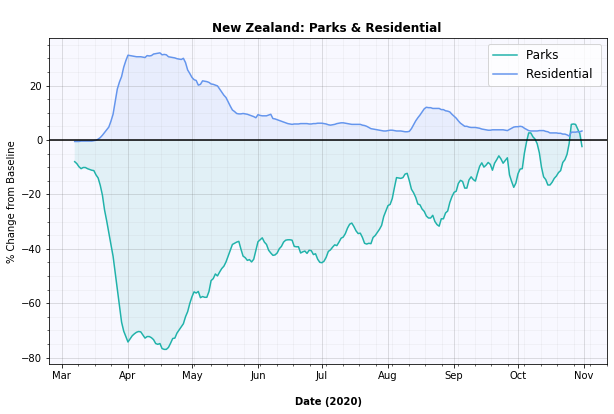

In [96]:
linePlotMultipleRolling(7, NZ, [parks, residential], 0)

We can see that from June to July parks stays at around -40%, before dropping to about -25% by the beginning of August. During this time residential was at about 5-10% above the baseline. During the August lockdown we can see an increase in residential and a decrease in parks again, to about 10% and -30% respectively. From September we can see that residential remained between 0 and 5%, while there was a lot of variation in parks but it remained between 5 and -20%. 

We can see a relationship between these variablesas we would expect. We would expect that during the April lockdown while more people are staying home isolating they are for the most part not out visiting parks, so there is an increase in residential. As the lockdown measures are eased and more people are going to parks, there is an increase in parks and in turn a decrease in residential as these people are leaving their homes. For the most part for the middle few months of the year the figure for parks is typically further from the baseline that residential. A factor that may be affecting this is the weather at that time of the year. The baseline is in January when the weather is hottest. During May - August the weather is coldest and so people may be less likely to visit parks as frequently as in January, the baseline.

We can see from the trends above that there is likely a negative linear relationship between parks and residential. We can check this with a scatter plot.

__Scatter Plot Parks & Residential, New Zealand__

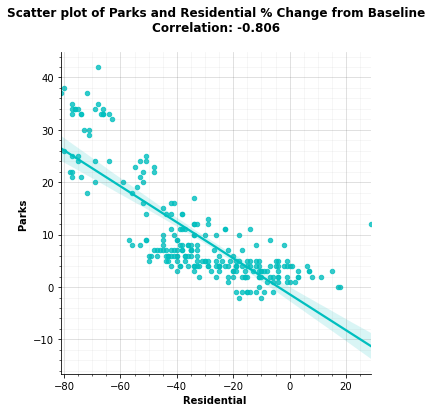

In [97]:
scatter(NZ, [parks, residential])

We can see that  as expected there is a strong negative correlation. The slope of the regression line tells us that it is negative and we can see from the distance from the markers to the line that it is very strong. The correlation coefficient, -0.806, is close to -1 confirming that it is a strong negative correlation.


We saw from the lineplot above that there was a lot more variation in the values for parks, and it took a much larger range of values. To compare the distributions we can plot a histogram.

__Histogram Parks & Residential, New Zealand__

mean   -32.506122
std     23.230248
Name: parks_percent_change_from_baseline, dtype: float64
mean    9.787755
std     9.902178
Name: residential_percent_change_from_baseline, dtype: float64
6.0


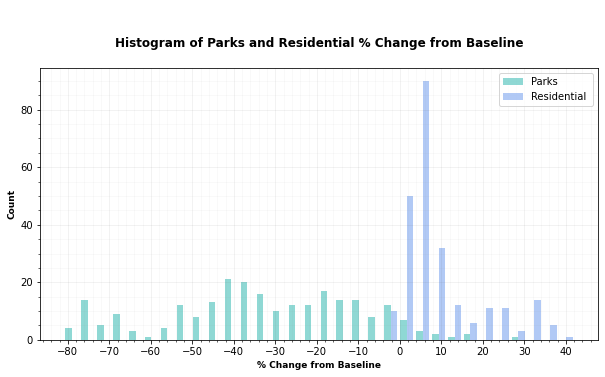

In [98]:
print(NZ[parks].describe()[["mean", "std"]])
print(NZ[residential].describe()[["mean", "std"]])
print(NZ[residential].median())
histogram(NZ, [parks, residential], [-80, 50, 10], 3)

We can see that there is a lot more spread in the values for parks. We can see small peaks at around -40% and -20%. The valyes range from about -80 to 30%. For residential we can see that the values are very concentrated around the median of 6%. We can see that about 61% (50+70+30 / 245 = 61) of the values fall between 0 and 10%. The values range from around -5% to just over 40%. To visualise the distributions more clearly we can plot distribution curves:

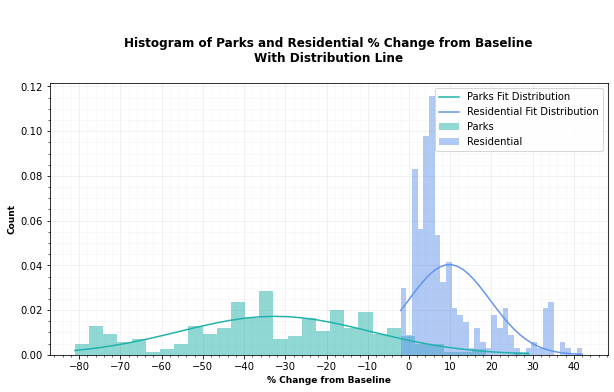

In [99]:
histogram(NZ, [parks, residential], [-80, 50, 10], 2)

As expected we can see a tall peak for residential, with its peak at about the mean, 10%, and a skew to the right. For residential we can see a very flat curve with its peak at around the mean again, -32%, and very long tails indicating a large range/ a lot of spread.

## <h3 align="center"> <font color='teal'> Summary: New Zealand </font> </h3>


For NZ I analysed each of the categories individually above, before looking at the similarities between the trends and distribtutions for grocery & pharmacy and retial & recreation, and transit stations and workplaces. 

Summary:

__Retail & Recreation__
- Mean of - 25 %
- Standard deviation of 32 %
- About 1% at beginning of March
- Steep drop to min of - 95% on April 10th
- Steep increase to about - 30% at the beginning of June
- Gradual increase to about 3% at the beginning of august
- Drop to -30% in August
- Increase to 11% by the end of October

__Parks__
- Mean of -33%
- Standard deviation of 23%
- About -8% at the beginning of March
- Drop to minimum of -81% on April 17th
- Upward trend from mid April reaching -25% by the beginning of August
- Drop in August to -30% followed by upward trend to max of 29% on October 26th

__Grocery & Pharmacy__
- Mean of -12%
- Standard deviation of 15%
- Spike in March to max of 29% on March 23rd
- Steep drop to minimum of -91% on A-10% by mid May
- Gradual increase to -5% by August
- Drop in August to -15% followed by gradual increase to about -3% by the end of October

__Transit Stations__
- Mean of -41%
- Standard deviation of 24%
- Max of 16% on March 2nd
- Steep drop to minimum of -89% on April 10th
- Increase to -25% at the beginning of August
- Drop in August to -50% followed by increase to -30% by the end of October

__Workplaces__
- Mean  of -15%
- Standard deviation 26%
- Max of 34% on March 2nd
- Steep drop to -88% on April 10th
- Increase to about -10% at the beginning of June
- Figure stayed between 5 and -20% until the end of October, with 2 steep drops for national holidays

__Residential__
- Mean of 10%
- Standard deviation of 10%
- Minimum of -2% on March 2nd
- Steep increase to max of 42% on April 10th
- Decline to about 3% in August
- Increase during August to 13% followed by drop to 3% by the end of October

__Workplaces & Transit Stations__
- Very similar trends
- Strong positive correlation of 0.914


__Retail & Recreation and Grocery & Pharmacy__
- Very similar trends
- Strong positive correlation of 0.886

__Parks & Residential__
- Symmetry in the trends
- Negative correlation of -0.806


This concludes Task 1. I have analysed and graphed each of the catgeories, as well as compared many of the catgrories, for each of the 3 countries individually. Now I will move to task 2.

# <font color='teal'>Task 2: Between-Country Analysis</font>

Task:
Taking the three selected countries together:
- Construct a set of time series that represent the overall mobility patterns for the three countries.
- Characterise and visualise each of these time series. You may choose to apply resampling and/or smoothing in order to provide a clearer picture of the trends in the series.
- Compare and contrast how the overall time series for the three countries have changed over time. To what extent are these series correlated with one another?
- Suggest explanations for any differences that you have observed between the time series for the countries.

### <font color='cadetblue'>Data Preperation</font>

I will start by combining my dataframes for Ireland, New Zealand and the United States into one dataframe. I will do this by concatenating the dataframes:

In [100]:
combined = pd.concat([ireland, US, NZ])
print("Combined DataFrame: Ireland, the United States and New Zealand\n")
print("Date Range: ", combined.index[0].date(), "  -  ", combined.index[combined.shape[0]-1].date())
display(combined)

Combined DataFrame: Ireland, the United States and New Zealand

Date Range:  2020-03-01   -   2020-10-31


id      country  \
date                               
2020-03-01  1265158      Ireland   
2020-03-02  1265159      Ireland   
2020-03-03  1265160      Ireland   
...             ...          ...   
2020-10-29  1767945  New Zealand   
2020-10-30  1767946  New Zealand   
2020-10-31  1767947  New Zealand   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-03-01                                                3.0    
2020-03-02                                                4.0    
2020-03-03                                                8.0    
...                                                       ...    
2020-10-29                                               -2.0    
2020-10-30                                                2.0    
2020-10-31                                                7.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-03-01                                                3.0   
2020-03-02                                                4.0   
2020-03-03                                                5.0   
...                                                       ...   
2020-10-29                                               -4.0   
2020-10-30                                               -3.0   
2020-10-31                                                0.0   

            parks_percent_change_from_baseline  \
date                                             
2020-03-01                                -5.0   
2020-03-02                                12.0   
2020-03-03                                29.0   
...                                        ...   
2020-10-29                               -16.0   
2020-10-30                               -16.0   
2020-10-31                               -16.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-03-01                                            2.0   
2020-03-02                                            1.0   
2020-03-03                                            2.0   
...                                                   ...   
2020-10-29                                          -26.0   
2020-10-30                                          -26.0   
2020-10-31                                          -26.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-03-01                                      2.0   
2020-03-02                                      1.0   
2020-03-03                                      3.0   
...                                             ...   
2020-10-29                                      8.0   
2020-10-30                                      7.0   
2020-10-31                                      2.0   

            residential_percent_change_from_baseline  
date                                                  
2020-03-01                                       0.0  
2020-03-02                                       0.0  
2020-03-03                                      -1.0  
...                                              ...  
2020-10-29                                       2.0  
2020-10-30                                       2.0  
2020-10-31                                       2.0  

[735 rows x 8 columns]

We know from our preparation and cleaning of the individual dataframes in task 1 that no rows or values are missing. We chceked in task 1 that the dates ranged from March 1st to October 31st for each dataframe and that there were 245 rows in each. Here there are 735 = 245x3 rows so we know that no rows are missing. We know from task 1 that no values are missing in any columns but we can double check this as follows:

In [101]:
print("\nCombined Dataframe: Number of Missing Values in each series\n")
print(combined.isnull().sum())


Combined Dataframe: Number of Missing Values in each series

id                                                    0
country                                               0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64


In [102]:
print("\nIndex before: ", combined.index.name)
combined=combined.set_index(["country", combined.index])
print("Index after: ", combined.index.names)
display(combined)


Index before:  date
Index after:  ['country', 'date']


id  \
country     date                  
Ireland     2020-03-01  1265158   
            2020-03-02  1265159   
            2020-03-03  1265160   
...                         ...   
New Zealand 2020-10-29  1767945   
            2020-10-30  1767946   
            2020-10-31  1767947   

                        retail_and_recreation_percent_change_from_baseline  \
country     date                                                             
Ireland     2020-03-01                                                3.0    
            2020-03-02                                                4.0    
            2020-03-03                                                8.0    
...                                                                   ...    
New Zealand 2020-10-29                                               -2.0    
            2020-10-30                                                2.0    
            2020-10-31                                                7.0    

                        grocery_and_pharmacy_percent_change_from_baseline  \
country     date                                                            
Ireland     2020-03-01                                                3.0   
            2020-03-02                                                4.0   
            2020-03-03                                                5.0   
...                                                                   ...   
New Zealand 2020-10-29                                               -4.0   
            2020-10-30                                               -3.0   
            2020-10-31                                                0.0   

                        parks_percent_change_from_baseline  \
country     date                                             
Ireland     2020-03-01                                -5.0   
            2020-03-02                                12.0   
            2020-03-03                                29.0   
...                                                    ...   
New Zealand 2020-10-29                               -16.0   
            2020-10-30                               -16.0   
            2020-10-31                               -16.0   

                        transit_stations_percent_change_from_baseline  \
country     date                                                        
Ireland     2020-03-01                                            2.0   
            2020-03-02                                            1.0   
            2020-03-03                                            2.0   
...                                                               ...   
New Zealand 2020-10-29                                          -26.0   
            2020-10-30                                          -26.0   
            2020-10-31                                          -26.0   

                        workplaces_percent_change_from_baseline  \
country     date                                                  
Ireland     2020-03-01                                      2.0   
            2020-03-02                                      1.0   
            2020-03-03                                      3.0   
...                                                         ...   
New Zealand 2020-10-29                                      8.0   
            2020-10-30                                      7.0   
            2020-10-31                                      2.0   

                        residential_percent_change_from_baseline  
country     date                                                  
Ireland     2020-03-01                                       0.0  
            2020-03-02                                       0.0  
            2020-03-03                                      -1.0  
...                                                          ...  
New Zealand 2020-10-29                                       2.0  
            2020-10-30    

My combined dataframe is now ready to use.

## <font color='teal'>Data Visualisation</font>

I will start by defining some graphing functions:

In [103]:
# the following lists hold the string representations and the colours correspinding to 
## each of the countries for my graphs
countries = ["Ireland", "United States", "New Zealand"]
colors = ["lightseagreen", "cornflowerblue", "mediumorchid"]

__Lineplot of a Category for the 3 Countries__

The following function graphs a line plot with a line for each country for a given category.

In [104]:
# days rolling = number of days for rolling mean. 1 for no rolling mean
# category = chosen columns, e.g. retail and recreation
# min = true if lines for minimum values are to be displayed
# max = true if lines for maximum values are to be displayed

def compareLinePlot(daysRolling, category, combined, min, max):

    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(14, 8.5))
    ax.set_facecolor('ghostwhite')
    
    
    for i in range(0, 3):
    
        plot = combined.loc[countries[i]][category].rolling(daysRolling).mean()
        
        # plot line
        ax.plot(
            plot,
            color=colors[i],
            label=countries[i]
        )
        
        # fill between line and baseline
        ax.fill_between(
            plot.index,
            plot,
            0,
            facecolor=colors[i],
            alpha=0.05,
            interpolate=True
        )

    
    # Title and labels for axes
    ylabel = attributeString(category) + "\n"
    
    if(daysRolling>1): title = attributeString(category) +  str(daysRolling) + " Day Rolling Mean\n"
    else: title =  attributeString(category) + "\n"
    
    # Set title and labels
    plt.xlabel(
        xlabel="\nDate (2020)", 
        weight='bold', 
        size = 10)
    
    plt.ylabel(
        ylabel=ylabel, 
        weight='bold', 
        size = 10)
    
    plt.title(
        title, 
        weight='bold', 
        size = 14)
        
    # format date to display month name
    date_form = DateFormatter("%b")
    ax.xaxis.set_major_formatter(date_form)

    # add baseline and grid lines
    baselineGridLines(False)
    
    # add text for "baseline"
    plt.text(
            datetime(2020, 10, 22),0, 
            "Baseline\n", 
            size=9, 
            color="black", 
            fontweight="bold", 
            label='Baseline')
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels, fontsize = 10)
    
    # Vertical lines & labels for the minimum % below the baseline for each country
    if(min):
        
        if(daysRolling>1): print("Minimum ", attributeString(category), daysRolling, " Day Rolling Means:\n")
        else: print("Minimum ", attributeString(category), ": \n")
        
        for i in range(0, 3):

            plot = combined.loc[countries[i]][category].rolling(daysRolling).mean()
            minIndex = plot.idxmin()
            minValue = plot.loc[minIndex].round(2)
            label = "  " + countries[i] + " Min"
    
            plt.axvline(
                minIndex, 
                c=colors[i], 
                linestyle = "--")
        
            plt.text(
                minIndex,
                minValue-1,
                label,
                fontweight='bold', 
                fontsize=8)
            
            print(countries[i], ": ", minValue, ", ", minIndex.month_name(), minIndex.day)
            
    # Vertical lines & labels for the maximum % below the baseline for each country
    if(max):
        
        if(daysRolling>1): print("\nMaximum ", attributeString(category), daysRolling, " Day Rolling Means:\n")
        else: print("\nMaximum ", attributeString(category), ": \n")
        
        for i in range(0, 3):

            plot = combined.loc[countries[i]][category].rolling(daysRolling).mean()
            maxIndex = plot.idxmax()
            maxValue = plot.loc[maxIndex].round(2)
            label = "  " + countries[i] + " Max\n"
    
            plt.axvline(
                maxIndex, 
                c=colors[i], 
                linestyle = "--")
        
            plt.text(
                maxIndex,
                maxValue,
                label,
                fontweight='bold', 
                fontsize=8)
            
            print(countries[i], ": ", maxValue, ", ", maxIndex.month_name(), maxIndex.day)

    plt.show()
    

__Category Histograms__

This function displays a histogram for each of the 3 countries for a given category. Each plot has the same range of values on the x and y axis and the same number of bins so that the graphs can be easily compared.

In [105]:
# ticks = max and min for y axis ticks, and distance between ticks, e.g. [-90, 10, 10]
# ylim = max value of y ticks
# bins = number of bins

def histogram(category, ticks, ylim, bins):
    
    # 5 rows and 3 columns
    fig, axes = plt.subplots(3, 1, figsize=(12, 19))
    ax = axes.flatten()
    
    title = "\n\n\nHistograms:\n" + attributeString(category)
    fig.suptitle(title, fontsize=16, fontweight="bold")
    
    for i in range(0, 3):

        ax[i].hist(combined.loc[countries[i]][category], bins=bins, color=colors[i], edgecolor=colors[i], linewidth=2, alpha=0.5)
            
        # Add grid lines
        ax[i].grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.1)
        ax[i].minorticks_on()
        ax[i].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.08)
    
        # ticks
        ax[i].set_xticks(np.arange(ticks[0], ticks[1], ticks[2])) # ticks is a list passed in as argument
    
        title = countries[i]
        
        # add labels and title
        ax[i].set_ylabel("Count",size=9, fontweight="bold")
        ax[i].set_xlabel(attributeString(category),size=9, fontweight="bold")
        ax[i].set_title(title,size=14, fontweight="bold")
        
        ax[i].set_xlim(ticks[0], ticks[1])
        ax[i].set_ylim(0, ylim)
        
    
    # show
    plt.show()  

__Describe__

This function prints the mean, std, max, min and median for each country for a given category.

In [106]:
def describe(category):
    print("\n")
    print(attributeString(category), "\n")
    for i in range( 0, 3):
        print(countries[i], ":")
        print(combined.loc[countries[i]][category].describe()[["mean", "std", "max", "min"]])
        print("median  ", combined.loc[countries[i]][category].median())
        print("\n")

## <font color='cadetblue'>Retail & Recreation % Change from the Baseline</font>

I will begin by looking at retail and recreation for the three countries. Below are summary statistics for each country for retail and recreation:

In [107]:
describe(retail)



Retail and Recreation % Change from Baseline 

Ireland :
mean   -40.502041
std     24.049918
max      8.000000
min    -90.000000
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64
median   -34.0


United States :
mean   -20.008163
std     12.381567
max     13.000000
min    -63.000000
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64
median   -16.0


New Zealand :
mean   -24.563265
std     31.930654
max     11.000000
min    -95.000000
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64
median   -11.0




From the summary statiatics above we can see that Ireland has the lowest mean for retail and & recreation of the 3 countries, -40.5, with a standard deviation of 24%. New Zealand has a mean of -25% wtih std 32%, and the US has a mean of -20% and std of 12%.

The country with the lowest value reached for Retail & Recreation was New Zealand at -95%, followed by Ireland at -90% and the US at -63%. The highest maximum value reached was 13% in the US, 11% in NZ and 8% in Ireland.

__Lineplot of Retail & Recreation__

Next we will look at the lineplot. The plot below shows the 7 day rolling means for each country.

Minimum  Retail and Recreation % Change from Baseline 7  Day Rolling Means:

Ireland :  -84.71 ,  April 22
United States :  -46.14 ,  April 13
New Zealand :  -90.29 ,  April 16


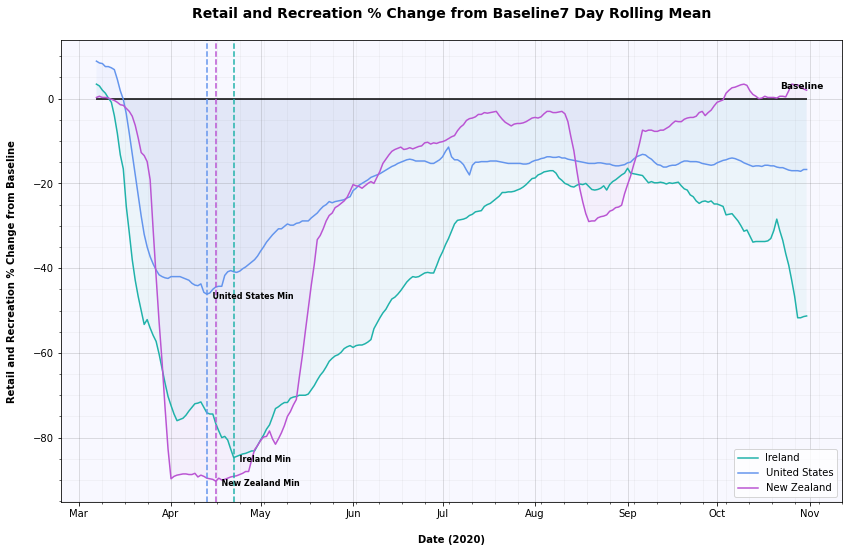

In [108]:
compareLinePlot(7, retail, combined, True, False)

In March we can see a drop in all 3 countries. The United States dropped to a min of -46% on April 13. Ireland reached a min of -85% on April 22 and New Zealand reached a min of -90 on April 16. 

From mid May we can see a very rapid increase for NZ. By July it was about 10% below the baseline. We can see a much more gradual drop for Ireland. The figure for Ireland dropped gradually from May to August, reaching -20% in August. For the US we can see an inline from From mid April to mid June where it reached about -15%. 

In August we can see a drop in NZ in line with the level 3 lockdown where retail and recreational facilities were forced to close. It then began to increased again in September and reached almost 5% above the baseline in October. For Ireland we can see that the figure stayed at about -20% throughout August before increasing again and reaching about -50% by the end of October. This increase is in line with the Dublin lockdown in September and the nation wide lockdown in October. We can see that the figure for the US stayed at about -15% from mid June to the end of October.

We can see that New Zealand had the biggest drop in April but for mid June-August and September-November the value for retail and recreation was almost at the baseline. Ireland had a drop almost as low as NZ in April, but never returned to greater than -15%, and we can see a downward trend in October. The US had the smallest drop in August, and then stayed at about -15% until the end of October.

New Zealand and Ireland close almost all retail and recreational facilites in late March which explains the large drop. The lockdown meaures in the US were different in different states, but it is likely that not all states closed retail and recreational facilites as the % only dropped to -46%. We can see a rapid increase in NZ and the US in May, whereas Ireland showed a much more gradual increse as the lockdown measures were eased much more slowly throughout the summer months. 

__Histogram: Retail & Recreation__

Next we can look at the distribution of the values for each country.

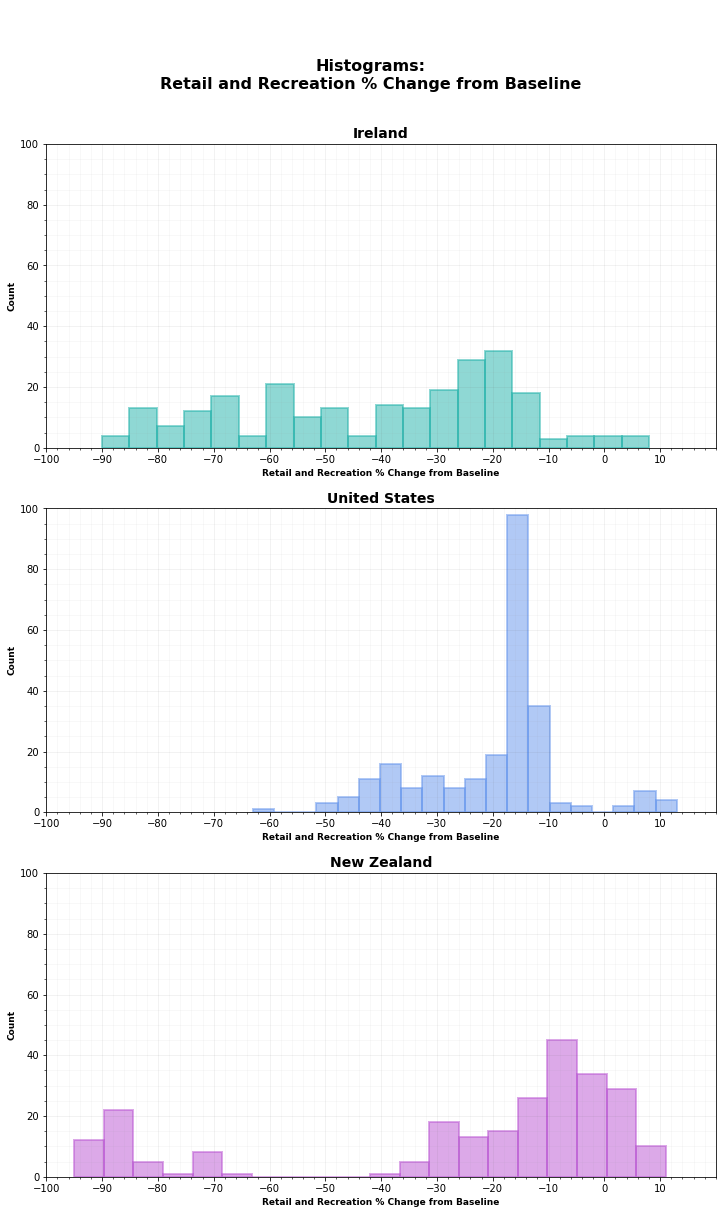

In [109]:
histogram(retail, [-100, 20, 10], 100, 20)

For Ireland we can see a small peak at about 15%. We can see that around 62% (15+14+20+30+35+18+20 / 245) of the values are above -30%. We can see a small peak at about -55 - -60% which makes up around 8% of the values, and a peak between -70 and -80% which makes up around 7%.The values range from -90 to 10%, a range of 100%. The distribution is approximately bimodal, with a peak at around 20% and again between about 60 and 70%.About 4% (10/245) of the values are above the baseline.

For the United States we can see a very tall peak between about around -13 and -16%, which makes up almost 40% of the values (97/245). This is expected as we saw from the lineplot that the figure remained around 15% for 4 and a half months. We can see that the values all lie between 15 and -65%, a range of 80%. There is clearly a lot less spread in the values. About 6% (15/245) of the values are above the baseline.

For New Zealand we can see a bimodal distribution, with a peak at -90 - -85%, and a peak at 5 - 10%. We can see that about 22% (55/245) of the values are below 65%. Almost 78% of the values are above -55%, with 16% (40/245) of the values above the baseline. The range of values is from about -95% to 12%, a range of 107%.

Overall we can see a lot of spread in the values for Ireland with very small peaks. There is a lot less spread for the US with a very tall peak at about 15%. For NZ there is a large range of values, a range of 107%, but we can see peaks at around - 85-90% and - 5-10%, with only about 2 or 3 values between -45 and -65%.

We can see that 16% of the values for NZ are above the baseline, 4% for Ireland and 6% for the US.

## <font color='cadetblue'>Grocery & Pharmacy % Change from the Baseline</font>

Next we will look at the Grocery & Pharmacy & change from the baseline for the three countries. Below are summary statistics for each country for Grocery & Pharmacy:

In [110]:
describe(grocery)



Grocery and Pharmacy % Change from Baseline 

Ireland :
mean    -4.795918
std     10.046163
max     33.000000
min    -58.000000
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64
median   -2.0


United States :
mean    -4.248980
std      7.318798
max     26.000000
min    -39.000000
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64
median   -4.0


New Zealand :
mean   -12.028571
std     14.981792
max     29.000000
min    -91.000000
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64
median   -8.0




We can see that the contry with the lowest mean for grocery and pharmacy was New Zealand at -12% with a std of 14%. This is followed by Ireland at -4.8 with an std of 10%, and the United States at -4.2 with and stf od 7%. New Zealand also had the lowest minimum value, -91%, followed by Ireland with -58% and the US with -39%. Ireland had the highest max value, 33%, followed by NZ with 29% and the US with 26%.


__Lineplot of Grocery & Pharmacy__

Next we will look at the lineplot. The plot below shows the 7 day rolling means for each country for Grocery & Pharmacy % change from the baseline.

Minimum  Grocery and Pharmacy % Change from Baseline 7  Day Rolling Means:

Ireland :  -27.86 ,  April 18
United States :  -19.29 ,  April 18
New Zealand :  -48.0 ,  April 16

Maximum  Grocery and Pharmacy % Change from Baseline 7  Day Rolling Means:

Ireland :  12.71 ,  March 16
United States :  17.71 ,  March 17
New Zealand :  12.86 ,  March 24


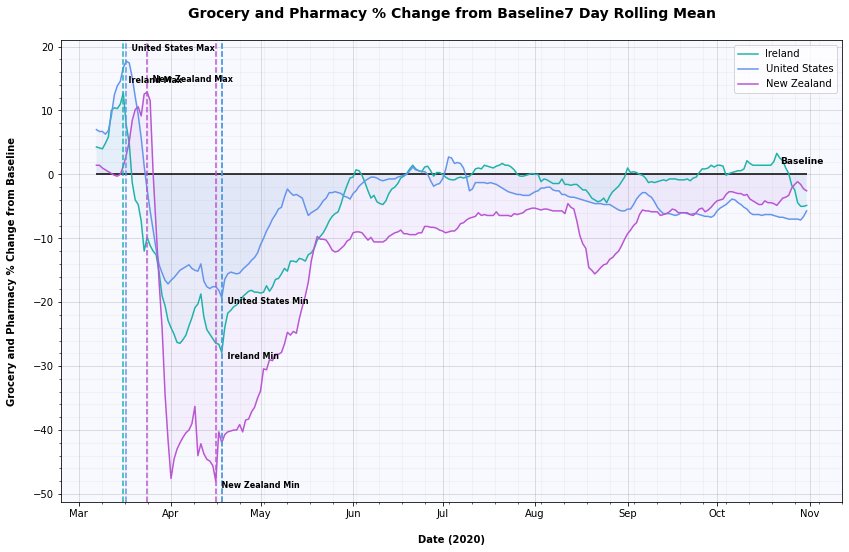

In [111]:
compareLinePlot(7, grocery, combined, True, True)

For all three countries we can see a spike in March to a global max. This is likely due to people stocking up on food and medicine in fear that grocers and pharmacies might close or sell out. We can see that for the 7 day rolling mean the highest value reached was 17.71 for the US on March 17. The max for Ireland and New Zealand were 12.71 and 12.86 on March 16 and March 24 respectively. From here we can see a drop for all 3 countries to global minima in April. New Zealand had the largest drop, reaching a minimum of -48% on April 16. Ireland reached -28% on April 18, and the US reached 18% on Macrh 18. As with retail and recreation, the lowest values reached are in NZ, Ffollowed by Ireland and then the US. This is possibly a consequence of more people in New Zealand strictly following the lockdown guidelines and minimising the frequency that the go to the supermarket and pharmacy.

We can see an increase in all 3 countries from the end of April to the beginning of June. At this point we can see that Ireland and the US are both at the baseline, while NZ is still around 10% below the baseline. We can see that from here to the end of October the figure for Ireland stayed within about 5% of the baseline. The figure for the US increased very gradually fromabout 0% at the beginning of July to around 7% at the end of October. The figure for NZcontinued to drop gradually until August where it was at about 5%, followed by a spike to 15% during the August lockdown. It then returned to 5% in September and decreased very gradually to about 3% by the end of October. 

We can see that the trends for the 3 countries are very similar, but with a larger range of values for NZ, followed by Ireland, and the the US with a very small range of values. We can look at how the values are distributed with a histogram.

__Histogram: Grocery & Pharmacy__

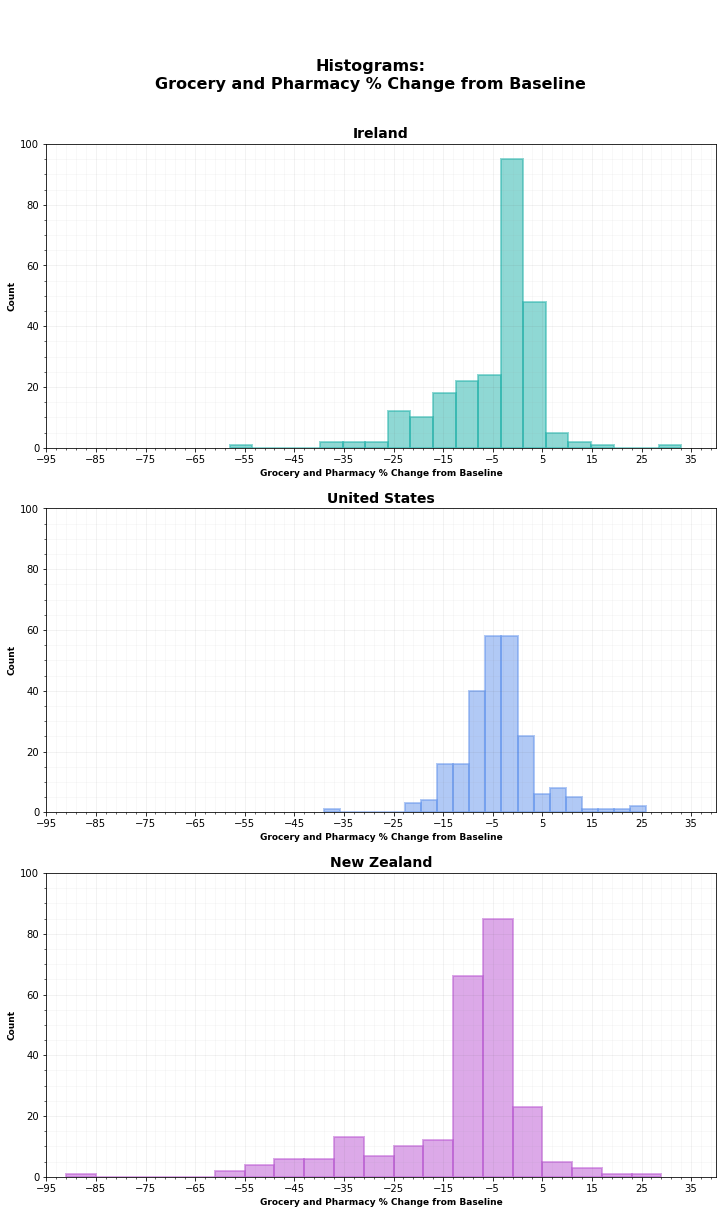

In [112]:
histogram(grocery, [-95, 40, 10], 100, 20)

We can see very similar distributions for each country. We can see a spike for Ireland at 0 to -5 % which makes up about 38% (95/245) of the values. Similarly there are spikes for the US at around 0 to -3 and -4 to -7% which make up a total of around 46% (2* 57/245) of the values. This is expected as we saw from the lineplot that the values for Ireland and the US lay within about 5% of the baseline for 3 or 4 months. For NZ we saw that the values from June typically stayed within about 10%. This is reflected in the peaks between 0 and about 13% which make up 85% of the values (85+65 / 245). 

We can see that the range of values for NZ is much larger than Ireland and the US, with values ranging from about -90% to 30%. The range for the US is much smaller, around -40 to 25%. The range for Ireland is in between the  two at -60 to 35%.

Overall we can see that the distributions for the 3 countries for Grocery & Pharmacy, as well as the trends for each country, are extremely similar. 

## <font color='cadetblue'>Parks % Change from the Baseline</font>

Next we will look at Parks. Below are summary statistics for each country for Parks % change from the baseline:

In [113]:
describe(parks)



Parks % Change from Baseline 

Ireland :
mean     18.587755
std      43.762556
max     193.000000
min     -69.000000
Name: parks_percent_change_from_baseline, dtype: float64
median   14.0


United States :
mean    28.902041
std     27.327825
max     86.000000
min    -36.000000
Name: parks_percent_change_from_baseline, dtype: float64
median   30.0


New Zealand :
mean   -32.506122
std     23.230248
max     29.000000
min    -81.000000
Name: parks_percent_change_from_baseline, dtype: float64
median   -33.0




We can see that New Zealand has the lowest mean at -33% with a standard deviation of 23%. This followed by Ireland at 19% with a std of 44% and the US at 29% with an std of 27%. We can see that NZ had the lowest minimum values, -81%, followed by Ireland at -69% and the US at -36%. Ireland had the largest max at 193%, followed by the US at 86% and NZ at 29%.

Next we can compare the trends by looking at a lineplot. We will use at the 7 day rolling means.


__Lineplot of Parks__



Minimum  Parks % Change from Baseline 7  Day Rolling Means:

Ireland :  -50.86 ,  May 20
United States :  -22.29 ,  April 15
New Zealand :  -77.0 ,  April 18

Maximum  Parks % Change from Baseline 7  Day Rolling Means:

Ireland :  109.43 ,  August 12
United States :  64.29 ,  July 7
New Zealand :  5.86 ,  October 27


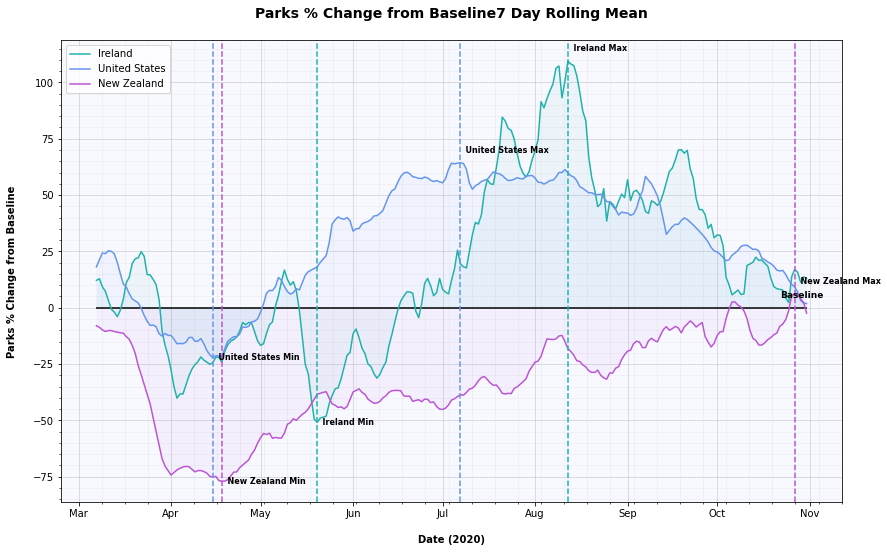

In [114]:
compareLinePlot(7, parks, combined, True, True)

For each of the 3 countries we can see a drop at the end of March. For NZ this drop reached a gloabl minimum of -77% on April 18. For Ireland we can see a drop to about -35/40% at the beginning of April, followed by a rise to about 12 % above the baseline at the beginning of May, to a drop to a global minimum of -51% on May 20th. For the United States we can see that it reached a global minimum of -22% on April 15th. 

After reaching its minimum in April we can see a very gradual upward trend for NZ for the rest of the year, from-77% to a max of 6% on October 27. For Ireland we saw that it reached a minimum of -51% at the end of May. From here we can see a sharp increase to a max of 109% on August 12. From here we can see a downward trend to just above the baseline in October. We can see a lot of variation in the line for Ireland despite using the rolling mean. This is possibly due to the fluctuating weather in Ireland, as the weather can change drastically from day to day in Ireland which will have an affect on the number of people visiting parks. For the US we can see a gradual upward trend form the min in April to a max of 64% on July 7. From here we can see a gradual decrease to just above the baseline in in October.

We can see that the highest values are reached by Ireland. We saw for Retail & Recreation that Ireland had the lowest values for most of the year. This was due to the fact that Ireland closed most Retail & Recreation facilities for the majority of the year, whereas the US and NZ only closed them for a month or two. With Retail & Recreation facilities closed and no where indoors for people to socialise and exercise this might cause a spike in Parks. Furthermore, the weather in Ireland in January is very cold and so the number of people visiting parks would likely be very low. Therefore, the spike in the summer months is expected.

We can see a much more gradual increase and decrease for the United States, with a smaller range of values. We can see a drop in line with the lockdown for most of the US in April. From here into the summer months we can see an increase. With most Retail & Recreation facilities open it is possible that this increase is for the most part caused by the good weather in comparison to the baseline in January. For NZ we can see that the figure remains below the baseline for most of the year. This may again be in part caused by the weather. The weather in NZ is warmest in January and much colder form May to September, so a drop below the baseline is expected during these months.

Next we can compare the distributions.

__Histogram: Parks__

14.0


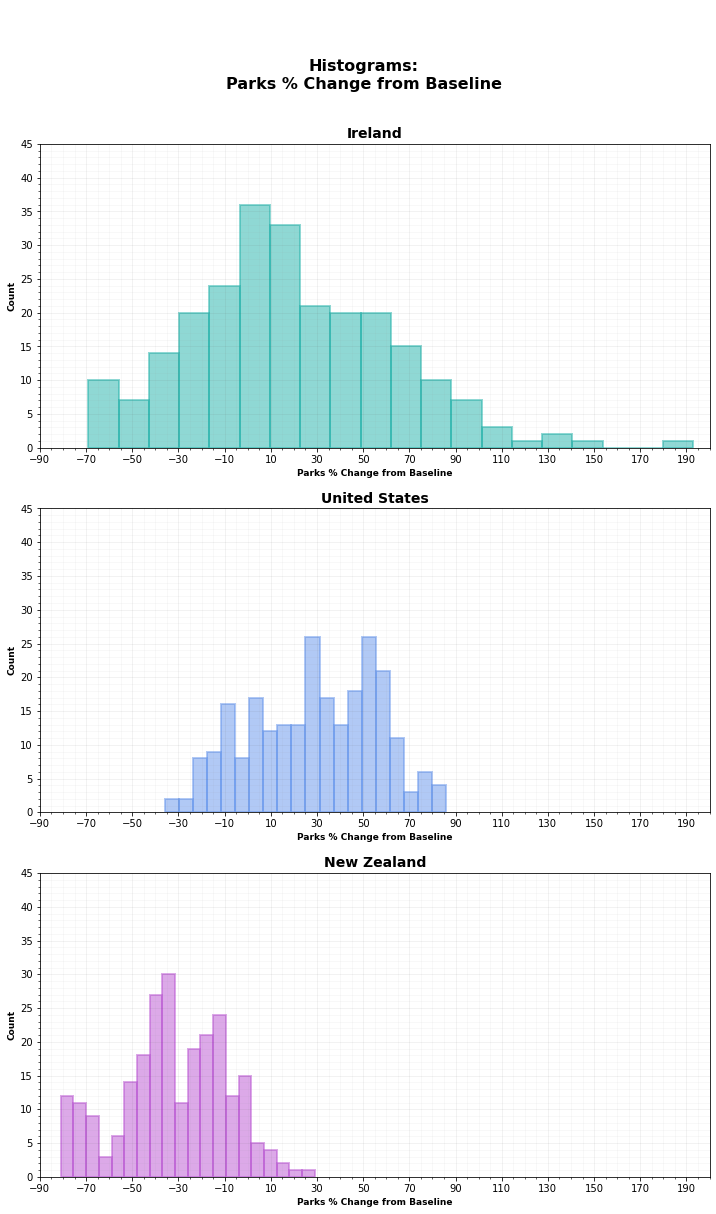

In [115]:
print(combined.loc["Ireland"][parks].median())
histogram(parks, [-90, 200, 20], 45, 20)

We can see that Ireland has the largest range of values, ranging from -70 to almost 200%, a range of almost 270%. The range for NZ is from about 30 - -80%, a range of 110%. The range for the US is from amlost 90 to -40%, a 130% range. The distribution for Ireland is bell shaped, with an outlier at 180-190%. 

We can see a peak for Ireland between 0 and 10% which makes up about 15% (36/245) of the values. Peaks for the US are visible at 25-30 and 50-55%, each making up 11% (26/245). For NZ we can see a peak at about 35-40% making up 12% of the values (30/245).

We can see approximately bell shaped distributions for all three countries. Peaks for NZ can also be seen below -65%, with 13% (12+11+9 / 245) of the values falling below -65%.

## <font color='cadetblue'>Transit Stations % Change from the Baseline</font>

Next I will look at Transit Stations. Below are summary statistics for each country for Transit Station:

In [116]:
describe(transit)



Transit Stations  % Change from Baseline 

Ireland :
mean   -43.404082
std     17.147264
max      2.000000
min    -82.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64
median   -41.0


United States :
mean   -31.881633
std     11.811978
max      7.000000
min    -56.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64
median   -32.0


New Zealand :
mean   -41.081633
std     23.702594
max     16.000000
min    -89.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64
median   -35.0




The mean for Ireland is the lowest at -43% with a standard deviation of 17%. This is followed by NZ at -41% (std of 24%) and the US at -32% (std of 12%).

The minimum value is lowest for NZ at -89%, followed by Ireland at -82% and the US at -56%.

The maximum is highest for NZ at 16%, followed by the US at 7% and Ireland at 2%.


Next we can compare the trends.


__Lineplot of Transit Stations__

We will look at the lineplot. The plot below shows the 7 day rolling means for each country for Transit Station.

Minimum  Transit Stations  % Change from Baseline 7  Day Rolling Means:

Ireland :  -75.71 ,  April 3
United States :  -52.86 ,  April 13
New Zealand :  -86.29 ,  April 16


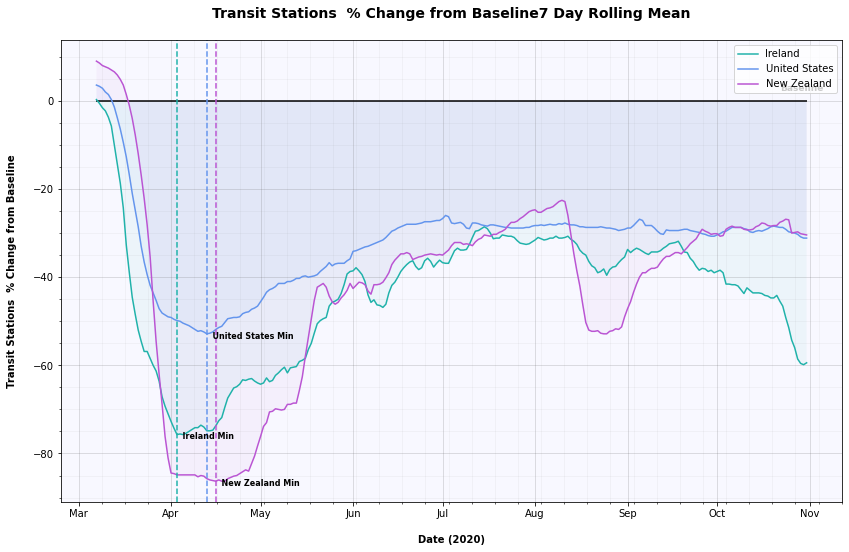

In [117]:
compareLinePlot(7, transit, combined, True, False)

We can immediately see very similar trends for all 3 countries. For each country we can see a drop in March to global minima in April. The minimum for the US was -53% on April 13. The minimum for Ireland was 56% on April 3rd, and the minimum for NZ was -86% on April 16.

From these minima we can see an increase in all 3 countries to about -40% at the beginning of June. The figures all continued to increase and all stayed within about 10% of eachother beffore eaching about -10% in August. We can see a drop for NZ in August during the August lockdown, Followed by an increase again to 10% by the end of October. The figure for the US stayed at about -10% until the end of October. From the end of September we can see a decrease for Ireland again as many counties faced a second lockdown, which reached -60% by the end of October.

Next we can look at the distributions by plotting histograms.

__Histogram: Transit Stations__

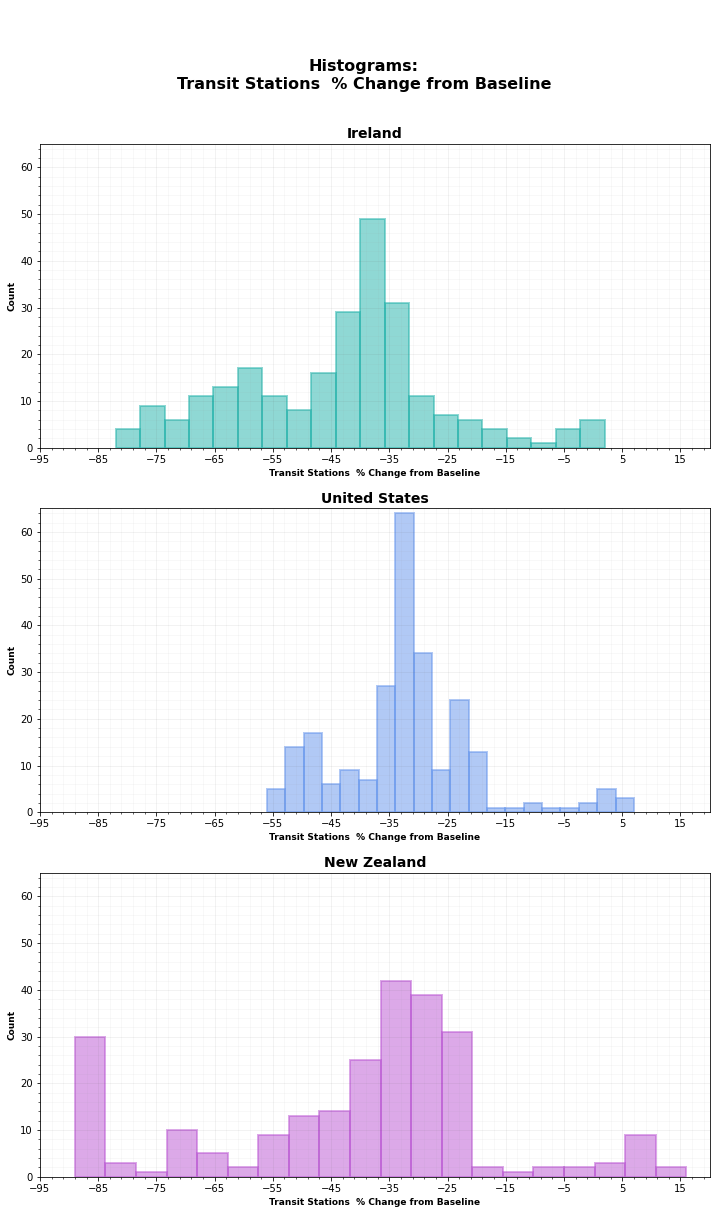

In [118]:
histogram(transit, [-95, 20, 10], 65, 20)

For Ireland we can see a bell shaped curve with a tall peak at -35% to -40% making up 20% (49/245) of the values. The values for Ireland range from about 2 to -82%. 

The distribution for the US is again approximately bell shaped with a very tall peak at about -31 to -34% making up 26% (64/245) of the values.

For NZ we can see an approximately bimodal distribution, with a peak at about -85 to -90% and a peak at around -32 to -36% making up 12% (30/245) and 17% (42/245) of the values respectively. The range for NZ is very large in comparison to Ireland and the US, ranging from about -90 to 17%. The range for the US is much smaller, from about -56 to 6%.

## <font color='cadetblue'>Workplaces % Change from the Baseline</font>

Next we will look at Workplaces. Below are summary statistics for each country for Workplaces:

In [119]:
describe(workplace)



Workplaces  % Change from Baseline 

Ireland :
mean   -38.306122
std     20.755410
max      3.000000
min    -86.000000
Name: workplaces_percent_change_from_baseline, dtype: float64
median   -42.0


United States :
mean   -31.146939
std     13.932612
max      5.000000
min    -72.000000
Name: workplaces_percent_change_from_baseline, dtype: float64
median   -36.0


New Zealand :
mean   -14.934694
std     26.051412
max     34.000000
min    -88.000000
Name: workplaces_percent_change_from_baseline, dtype: float64
median   -7.0




The mean is the highest NZ at -14% with a standard deviation of 26%, followed by teh US at -31% with a std of 14% and Ireland at -38% with an std of 21%.

The minimum was the lowest for NZ at -88%, followed by Ireland at -86%, and the US at -72%.

The maximum was the highest for NZ at 34%, followed by the US at 5% and Ireland at 3%.


__Lineplot of Workplaces__

Next we will look at the lineplot. The plot below shows the 7 day rolling means for each country for Workplaces.

Minimum  Workplaces  % Change from Baseline 7  Day Rolling Means:

Ireland :  -68.14 ,  April 13
United States :  -49.14 ,  April 13
New Zealand :  -73.0 ,  April 13


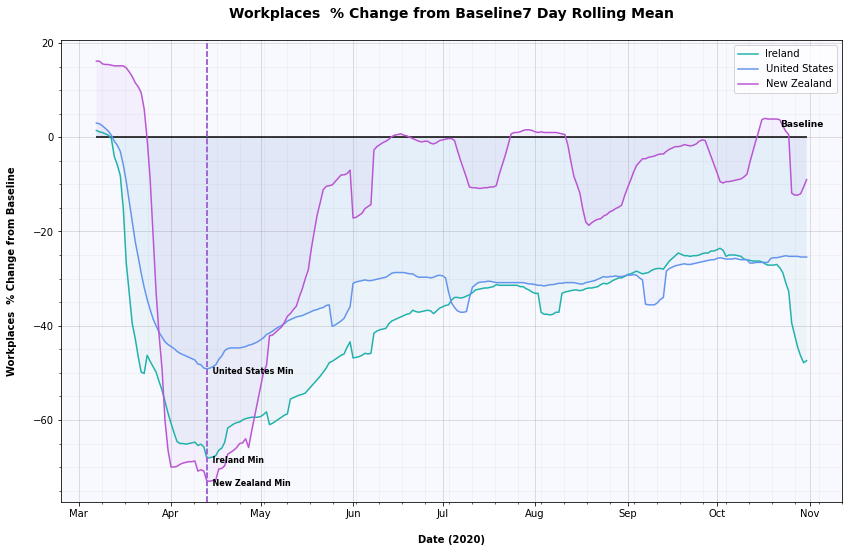

In [120]:
compareLinePlot(7, workplace, combined, True, False)

We can see a drop for all 3 countries from March to April. All reached a minimum of April 13th, with the US at -24%, Ireland at -69% and NZ at -73%. From here we can see a very steep increase for NZ, reaching about 10% by the beginning of June. We can see 5 small drops for NZ throughout the rest of the year, but the figure staued above -20%. In October we can see the figure for NZ going just above the baseline to about 5% before dropping to about -10% by the end of the month.

For Ireland and the US there was a much more gradual increase from the minimum. We can see that for the US the figure stayed within-20 to -40% for th remainder of the year, reaching about -25% by the end of October.

For Ireland we can see a gradual decrease to about -35% at the beginning of July. The figure stayed within -25 to -35% before dropping again mid October to -50%.


New Zealand had the biggest drop in % in March and April but showed a rapid increase and stayed within 20% of the baseline for the remainder of the year. The US had the smallest drop in April, but only increased by about 20% after this. Ireland had  significant drop in April but only increased to a max of 25% below the baseline.

The drop for NZ in April is due to all non-essential workers being ordered to work from home where possible, or in the case of retail shops, recreationsl businesses etc, they were asked to close.

The much less severe drop for the US might indicate that a large number of states did not ask businesses to close or work from home. 

The large drop for ireland is due to non essential businesses closing or operating from home. We can see a much more gradual increase in comparison to NZ as Ireland stayed in lockdown with most businesses closed for much longer. We can see an increase in October as Ireland faced a second lockdown.

Next we can compare the distributions.

__Histogram: Workplaces__

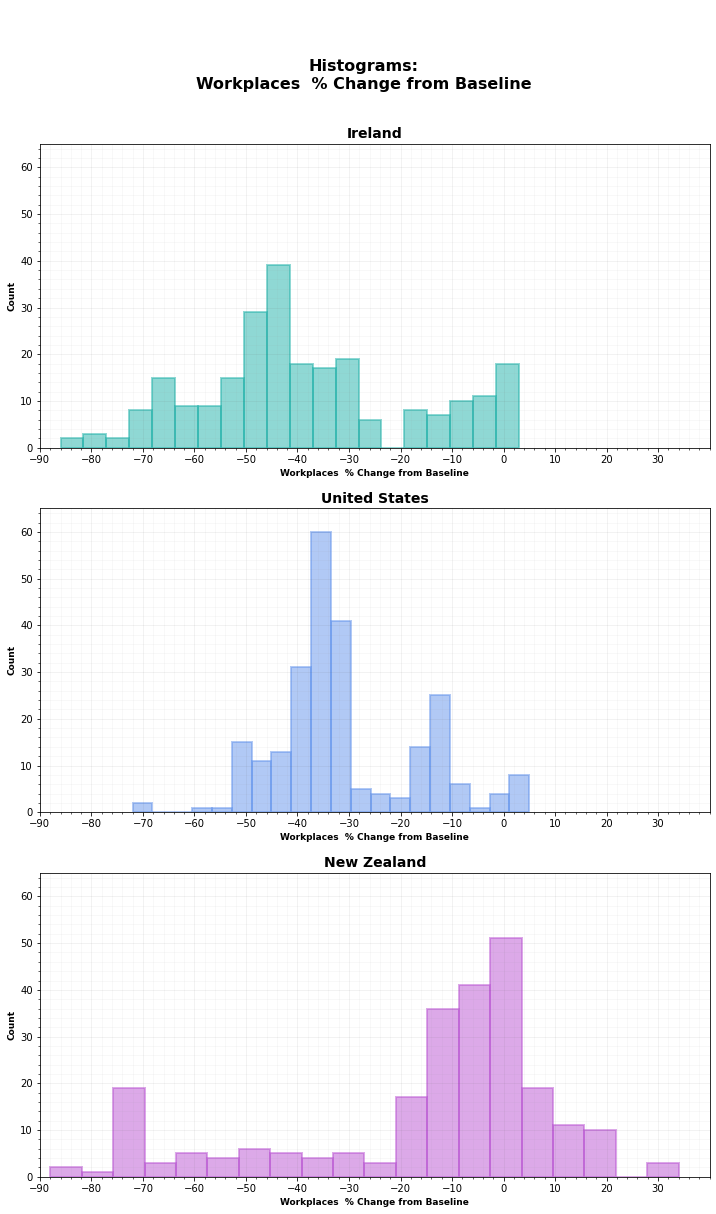

In [121]:
histogram(workplace, [-90, 40, 10], 65, 20)

For Ireland we can see an approximately bell shaped distribution with a peak at -42 to -46% making up 16% (39/245) pf the values. The values range from about -86 to 2%.

For the US we can see an approximately bell shaped distribution again, with a peak at -34 to -38% making up 24% (60/245) of the values. The values range from about -72 to 6%.

For the NZ we can see an approximately bimodal distribution, with a peak at -2 to -4% making up 20% (52/245) of the values, and a peak at -70 to -75^ making up 8% (19/245) of the values. NZ has the largest range, with values ranging from -88 to 34%.

## <font color='cadetblue'>Residential % Change from the Baseline</font>

Finally we will look at Residential for the three countries. Below are summary statistics for each country for Residential:

In [122]:
describe(residential)



Residential % Change from Baseline 

Ireland :
mean    14.559184
std      8.635229
max     34.000000
min     -1.000000
Name: residential_percent_change_from_baseline, dtype: float64
median   13.0


United States :
mean     9.946939
std      5.688034
max     24.000000
min     -1.000000
Name: residential_percent_change_from_baseline, dtype: float64
median   10.0


New Zealand :
mean     9.787755
std      9.902178
max     42.000000
min     -2.000000
Name: residential_percent_change_from_baseline, dtype: float64
median   6.0




We can see that Ireland has the highest mean at 15% with a standard deviation of 9%. This is followed by the US at 9.9% (std 6%) and NZ 9.7% (std 9.9%). 

NZ has the highest max value at 42%, followed by Ireland at 34% and the US at 24%.

NZ also has the lowest min value at -2%, followed by Ireland and the US at -1%.

__Lineplot of Residential__

Next we will look at the lineplot. The plot below shows the 7 day rolling means for each country for Residential.


Maximum  Residential % Change from Baseline 7  Day Rolling Means:

Ireland :  28.43 ,  April 5
United States :  19.43 ,  April 10
New Zealand :  32.0 ,  April 16


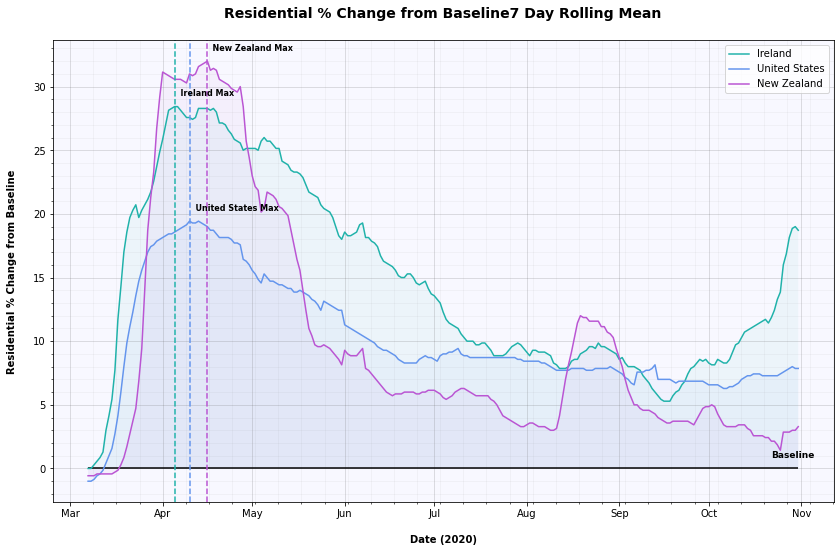

In [123]:
compareLinePlot(7, residential, combined, False, True)

We can see an increasing trend for each country in March and April, with each reaching a max in April. Ireland reached a max of 29% on April 5th, followed by the US with 19% on April 10 and NZ with 32% on April 16.

NZ had the largest increase but the steepest drop from this maximum value. By June the value for NZ was about 8%, and continuedto drop to about 3% in August. We can see in increase to about 12% again in August during the seconf lockdwon, followed by a drop to around 2% above the baseline by the end of October.

We can see a much more gradual drop for the US. The figure dropped from 32% in April to 8% by August and stayed within about 3% of this for the remainder of the year.

Ireland showed a decreasing trewnd from 29% in April to about 10% in August. It reached a minimum of 6% in September before increasing again to 18% in October during the second lockdown.


Overall, for most of the year we can see very similiar trends for each country, with an increase to a global max in April followed by a decrease tp August, and for NZ peak again in August, and in the case of Ireland a peak again in October.


Next we can comapre the distributions.

__Histogram: Residential__

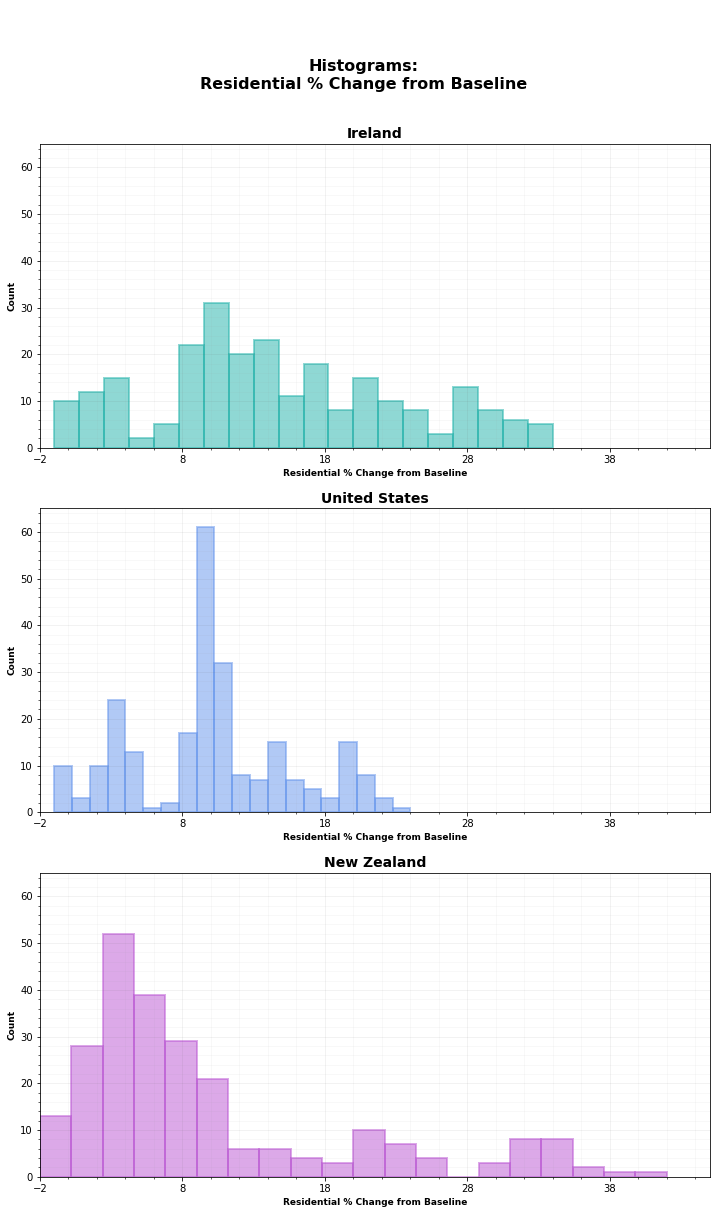

In [124]:
histogram(residential, [-2, 45, 10], 65, 20)

We can see a very flat bell shaped distribution for Ireland. There is a peak from about 9 to 11% making up about 13% (32/245).  

For the US we can see an approx bell shaped distribution again but with a very tall peak between 9 to 10% making up 25% (62/245) of the values.

The distribution for NZ is skewed to the right with a peak at 2-4% making up about 21% (52/245) of the values. About 75% of the values (14+28+52+39+29+21 / 245) are below 11%.

The range for NZ is quite large, with values ranging from 42 to -2%, a range of 44%. The range for Ireland is 35% (-1 to 34%), and for the US is 25% (-1 to 24%).





# <h3 align="center"> <font color='cadetblue'> Reflection </font> </h3>


I have now looked at each of the countries individually, as well as comparing each of the categories for the three countries, Ireland, the United States and New Zealand. 

Overall we can see for the majority of the categories that New Zealand had very steep drops/peaks (depending on the category, so drops for workplace, transit etc, peaks for residential) in March/April but which in most cases showed a rapid change by May. This reflects the very short but very strict lockdown in March/April for New Zealand. We can also see the affect of the August lockdown for New Zealand reflected in each of the categories by a peak/drop in August. We can see for many of the categories that the % was almost at the baseline, or close to where we would expect it to be from the baseline at that time of year, for a large portion of the year. New Zealand were praised during the year for their response to the Covid-19 pandemic and their ability to get the virus under control very rapidly so that they could resume almost normal, pre-covid life. This is reflected in the mobility data. 


For Ireland we can see steep drops/peaks in March/April similar to New Zealand, however Ireland showed a very gradual increase/decrease from these maxima/minima. This is a reflection on how slow Ireland was to ease the Covid-19 lockdown measures. The implementation of lockdown measures again in October is also reflected in the mobility percentages.

For the United States we can see much smaller drops and peaks in March/April for most of the categories. This is possibly a consequence of less serious lockdown measures being implemented, or possibly a reflection of people not adhering to the guidelines. We can see smaller drops/peaks in March /April but also very gradual increasing/decreasing trends from these drops / peaks, similar to Ireland. For most of the categories, the figure for the US was significantly higher/lower than the baseline for much of the year, in comparison to NZ in which it was very close to the baseline from May/June for many of the categories.

I have thoroughly enjoyed completing this project. I found it very interesting analysing the mobility trends for Ireland especially, given that I lived through the pandemic in Ireland. 

It was also very interesting to see the mobility for New Zealand, as I have heard a lot in the media about how well NZ got the Covid-19 cases under control and have now returned to almost "normal", pre-Covid19 life. This was very much reflectd in the trends for New Zealand which I found very interesting to see. We can very clearly see a spike in line with the lockdown in March/April followed by a very rapid ascent / descent towards the baseline for most of the categories.

I found it interesting that the % change from the baseline for the United States was so low in comparison to Ireland and New Zealand for many of the categories in March and April. This was surprising as the United States had such huge counts of daily Covid-19 cases and deaths. There was a lot of criticism in the media about Trump and his response to the pandemic. He was criticised for not taking the pandemic more seriously, and this is reflected in the low numbers for % change from the baseline. If strict lockdown measures were impemented we would have seen much steeper drops similar to Ireland and New Zealand in March/April.


Overall I found this project very interesting, and I have lots of ideas about ways in which I would like to further extend this project in the future. For example, I think it would be very interesting to collect data on Covid 19 case numbers for the 3 countries for March - October 2020, and explore the relationship between the Covid-19 cases and the mobility changes. I would also like to look more closely at the mobility changes for each state in the United States and compare the trends in mobility and the lockdown measures implemented in each state to see the affect of the various measures implemented.


To conclude, I have thoroughly enjoyed this project, and feel that it has really improved my analysis skills, as well as my skills of graphing and data visualisation in Python.

####  <font color='cadetblue'> Dervla Scully 18329511 </font>